In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
#libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import scipy.stats as stats
#sklearn libraries for imputation

from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
#Metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,precision_score,roc_auc_score

#Sklearn
import sklearn
from sklearn.impute import KNNImputer
from sklearn.preprocessing import power_transform,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


In [ ]:
#the original file was in Arff format
#converted to csv 
#then imported 

In [ ]:
#Year 1
df_1 = pd.read_csv('csv_result-1year.csv')
df_1.shape

(7027, 66)

In [ ]:
df_1.head()

,id,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,1,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,...,0.121960,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0
1,2,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,...,0.121300,0.42002,0.85300,0,4.1486,3.2732,107.350,3.4,60.987,0
2,3,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,...,0.241140,0.81774,0.76599,0.69484,4.9909,3.951,134.270,2.7185,5.2078,0
3,4,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,...,0.054015,0.14207,0.94598,0,4.5746,3.6147,86.435,4.2228,5.5497,0
4,5,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,...,0.134850,0.48431,0.86515,0.12444,6.3985,4.3158,127.210,2.8692,7.898,0


In [ ]:
#Year 2
df_2 = pd.read_csv('csv_result-2year.csv')
df_2.shape

(10173, 66)

In [ ]:
#Year 3
df_3 = pd.read_csv('csv_result-3year.csv')
df_3.shape

(10503, 66)

In [ ]:
#Year 4
df_4 = pd.read_csv('csv_result-4year.csv')
df_4.shape

(9792, 66)

In [ ]:
#Year 5
df_5 = pd.read_csv('csv_result-5year.csv')
df_5.shape

(5910, 66)

In [ ]:
#Here the null values are in the form of "?"
#Replacing "?" with np.NaN values

df_1.replace({"?":np.nan},inplace=True)
df_2.replace({"?":np.nan},inplace=True)
df_3.replace({"?":np.nan},inplace=True)
df_4.replace({"?":np.nan},inplace=True)
df_5.replace({"?":np.nan},inplace=True)

In [ ]:
#changing the datatypes from object to numeric for further operation
df_1 = df_1.astype(np.number)
df_2 = df_2.astype(np.number)
df_3 = df_3.astype(np.number)
df_4 = df_4.astype(np.number)
df_5 = df_5.astype(np.number)

In [ ]:
null_data_count = pd.DataFrame()
null_data_count['Attributes'] = df_1.columns
null_data_count['Year 1'] =  df_1.isnull().sum().values
null_data_count['Year 2'] =  df_2.isnull().sum().values
null_data_count['Year 3'] =  df_3.isnull().sum().values
null_data_count['Year 4'] =  df_4.isnull().sum().values
null_data_count['Year 5'] =  df_5.isnull().sum().values

#Row totals
null_data_count['Total Missing Values'] = null_data_count.iloc[:,1] + null_data_count.iloc[:,2] + null_data_count.iloc[:,3] + null_data_count.iloc[:,4] + null_data_count.iloc[:,5]

#Column totals
null_data_count.loc[66,'Attributes'] = 'Total Missing Values'
null_data_count.loc[66,null_data_count.drop('Attributes',axis=1).columns] = np.sum(null_data_count.iloc[:66,1:]).values
null_data_count.head()

,Attributes,Year 1,Year 2,Year 3,Year 4,Year 5,Total Missing Values
0,id,0.0,0.0,0.0,0.0,0.0,0.0
1,Attr1,3.0,1.0,0.0,1.0,3.0,8.0
2,Attr2,3.0,1.0,0.0,1.0,3.0,8.0
3,Attr3,3.0,1.0,0.0,1.0,3.0,8.0
4,Attr4,30.0,22.0,18.0,43.0,21.0,134.0


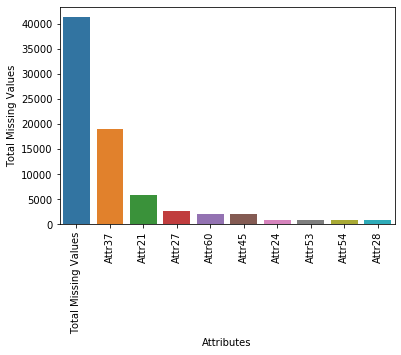

In [ ]:
a=null_data_count.sort_values('Total Missing Values',ascending=False).head(10)
sns.barplot(a['Attributes'],a['Total Missing Values'])
plt.xticks(rotation='90')
plt.show()

In [ ]:
null_data_count[null_data_count['Attributes']=='Attr37']

,Attributes,Year 1,Year 2,Year 3,Year 4,Year 5,Total Missing Values
37,Attr37,2740.0,4518.0,4736.0,4442.0,2548.0,18984.0


In [ ]:
null_data = pd.DataFrame()
null_data['Attributes'] = df_1.columns
null_data['Year 1'] =  df_1.isnull().sum().values / df_1.shape[0] * 100
null_data['Year 2'] =  df_2.isnull().sum().values / df_2.shape[0] * 100
null_data['Year 3'] =  df_3.isnull().sum().values / df_3.shape[0] * 100
null_data['Year 4'] =  df_4.isnull().sum().values / df_4.shape[0] * 100
null_data['Year 5'] =  df_5.isnull().sum().values / df_5.shape[0] * 100
null_data[(null_data['Attributes']=='Attr37') | (null_data['Attributes']=='Attr21')]

,Attributes,Year 1,Year 2,Year 3,Year 4,Year 5
21,Attr21,23.082396,31.101936,7.683519,1.613562,1.742809
37,Attr37,38.992458,44.411678,45.091879,45.363562,43.113367


In [ ]:
df_final=pd.concat([df_1,df_2,df_3,df_4,df_5])
df_final.shape

(43405, 66)

In [ ]:
df_null=df_final.isnull().sum()/len(df_final)*100
df_null.sort_values(ascending=False).head(15)

Attr37    43.736897
Attr21    13.486925
Attr27     6.367930
Attr60     4.957954
Attr45     4.946435
Attr24     2.124179
Attr54     1.870752
Attr53     1.870752
Attr64     1.870752
Attr28     1.870752
Attr41     1.737127
Attr32     0.847829
Attr52     0.693468
Attr47     0.684253
Attr46     0.311024
dtype: float64

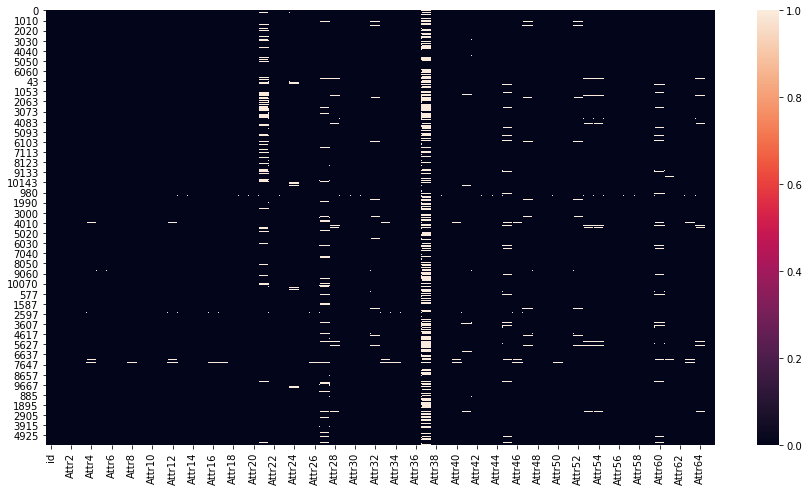

In [ ]:
plt.figure(figsize=[15,8])
sns.heatmap(df_final.isnull())
plt.show()

In [ ]:
#we observe that most of the null values are present in atr37(43.73%) and atr 21(13.48) (above 1000) null values
#we can drop these columns as percentage of null values is high
#numeric methods of imputation can be used for other columns here as all the columns are numeica in nature

In [ ]:
df_final.skew().head(10)

id         0.250482
Attr1   -114.345110
Attr2     56.897038
Attr3    -81.876253
Attr4    155.582218
Attr5   -171.775777
Attr6    -29.366975
Attr7     18.902518
Attr8     77.370579
Attr9    109.091241
dtype: float64

In [ ]:
b=df_final.iloc[:,[32,52]].head(5)
b.describe().T
# multiply short-term liabilities by 365, you will get same values as -(current liabilities * 365) / cost of products sold
# 0.346112*365=126.330000

,count,mean,std,min,25%,50%,75%,max
Attr32,5.0,126.330000,36.280048,91.37000,94.14000,122.17000,147.04000,176.93000
Attr52,5.0,0.346112,0.099397,0.25033,0.25792,0.33472,0.40285,0.48474


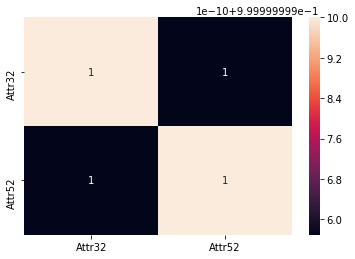

In [ ]:
b=df_final.iloc[:,[32,52]].head(5)
sns.heatmap(b.corr(),annot=True)

In [ ]:
#as correlation between attr32 and attr52 is 1, both are showing exactly same information, so we can drop any one column.

In [ ]:
for i in range(1,6):
    vars()["dfn_"+str(i)]=pd.DataFrame()
    vars()["dfn_"+str(i)] = vars()["df_"+str(i)].drop(['Attr21','Attr37','Attr52'],1)

In [ ]:
df_final=pd.concat([dfn_1,dfn_2,dfn_3,dfn_4,dfn_5])
df_final.shape

(43405, 63)

In [ ]:
pd.set_option('display.max_columns',None)
dfn_1.head()

,id,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,1.0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,0.249760,0.65980,0.166600,0.249760,497.42,0.73378,2.6349,0.249760,0.149420,43.370,0.21402,0.119980,0.47706,0.50494,0.60411,1.45820,1.7615,5.9443,0.11788,0.149420,94.14,3.8772,0.56393,0.21402,1.7410,0.50591,0.128040,0.662950,0.051402,0.128040,114.42,71.050,1.00970,1.52250,49.394,0.185300,0.110850,2.0420,0.37854,2.2437,2.2480,348690.0,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0.0
1,2.0,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,0.261140,0.51680,0.158350,0.258340,677.96,0.53838,2.0005,0.258340,0.152000,87.981,0.24806,0.123040,NaN,0.39542,0.43992,88.44400,16.9460,3.6884,0.26969,0.152000,122.17,2.9876,2.98760,0.20616,1.6996,0.49788,0.121300,0.086422,0.064371,0.145950,199.49,111.510,0.51045,1.12520,100.130,0.237270,0.139610,1.9447,0.49988,17.8660,17.8660,2304.6,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0.0
2,3.0,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,0.312580,0.64184,0.244350,0.309060,794.16,0.45961,1.4369,0.309060,0.236100,73.133,0.30260,0.189960,NaN,0.28932,0.37282,86.01100,1.0627,4.3749,0.41929,0.238150,176.93,2.0630,1.42740,0.31565,1.3090,0.51537,0.241140,0.322020,0.074020,0.231170,165.51,92.381,0.94807,1.01010,96.372,0.291810,0.222930,1.0758,0.48152,1.2098,2.0504,6332.7,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0.0
3,4.0,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,0.092704,0.30163,0.094257,0.092704,917.01,0.39803,3.2537,0.092704,0.071428,79.788,0.11550,0.062782,0.17193,0.57353,0.36152,0.94076,1.9618,4.6511,0.14343,0.071428,91.37,3.9948,0.37581,0.11550,1.3562,0.57353,0.088995,0.401390,0.069622,0.088995,180.77,100.980,0.28720,1.56960,84.344,0.085874,0.066165,2.4928,0.30734,2.4524,2.4524,20545.0,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0.0
4,5.0,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,0.187320,0.33147,0.121820,0.187320,1133.20,0.32211,1.6307,0.187320,0.115530,57.045,0.19832,0.115530,0.18732,0.38677,0.32211,1.41380,1.1184,4.1424,0.27884,0.115530,147.04,2.4823,0.32340,0.19832,1.6278,0.43489,0.122310,0.293040,0.096680,0.122310,141.62,84.574,0.73919,0.95787,65.936,0.188110,0.116010,1.2959,0.56511,1.8839,2.1184,3186.6,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0.0


In [ ]:
df_final.shape

(43405, 63)

In [ ]:
df_final.iloc[:,[1,6,7,18,22,35,48]].head(5)
a=df_final.iloc[:,[1,6,7,18,22,35,48]]
a.describe().T

,count,mean,std,min,25%,50%,75%,max
Attr1,43397.0,0.035160,2.994109,-463.890000,0.003429,0.049660,0.129580,94.28
Attr6,43397.0,-0.056107,7.201326,-508.410000,0.000000,0.000000,0.089446,543.25
Attr7,43397.0,0.093478,5.713075,-517.480000,0.005776,0.059634,0.150880,649.23
Attr18,43397.0,0.098565,5.737645,-517.480000,0.005783,0.059653,0.150910,649.23
Attr23,43278.0,0.138582,48.334974,-1578.700000,0.002269,0.029916,0.078038,9230.50
Attr36,43397.0,2.911241,62.984347,-0.000857,1.101100,1.643400,2.420900,9742.30
Attr50,43311.0,5.835373,307.382687,-0.045239,0.774935,1.222200,2.208600,53433.00


In [ ]:
#23-profit on operating activities / total assets
#36-profit on sales / total assets
#19-gross profit / total assets 
#8-EBIT / total 
#2-net profit / total assets
#49-EBITDA (profit on operating activities - depreciation) / total assets   # doubt, should have high values(>EBIT,net)
#7-retaind/total assets

# Missing Value Imputation

## Simple Imputer - Mean

In [ ]:
#Simple Imputer -MEAN IMPUTATION --- For all years separately
for i in range(1,6):
    si = SimpleImputer(strategy='mean')
    vars()["newMEAN_df"+str(i)] = pd.DataFrame(si.fit_transform(vars()["dfn_"+str(i)]))
    vars()["newMEAN_df"+str(i)].columns = vars()["dfn_"+str(i)].columns

In [ ]:
newMEAN_df1.to_csv('newMEAN_df1.csv')
newMEAN_df2.to_csv('newMEAN_df2.csv')
newMEAN_df3.to_csv('newMEAN_df3.csv')
newMEAN_df4.to_csv('newMEAN_df4.csv')
newMEAN_df5.to_csv('newMEAN_df5.csv')

#### Statistical Test to validate the use of mean Imputation to treat null values

In [ ]:

for i in range(1,6):
    for j in vars()["newMEAN_df"+str(i)].columns:
        t,p = stats.mannwhitneyu(vars()["dfn_"+str(i)][j],vars()["newMEAN_df"+str(i)][j])
        if p<0.05:
            print("Feature {} for data {} with p val {}: ".format(j,i,p.round(4)))
            print("data before imputation and after imputation is not the same for ",j)
        else:
            print("Feature {} for data {} with p val {}: ".format(j,i,p.round(4)))
            print("imputation didn't change data for ",j)

Feature id for data 1 with p val 0.5: 
imputation didn't change data for  id
Feature Attr1 for data 1 with p val 0.4762: 
imputation didn't change data for  Attr1
Feature Attr2 for data 1 with p val 0.4859: 
imputation didn't change data for  Attr2
Feature Attr3 for data 1 with p val 0.479: 
imputation didn't change data for  Attr3
Feature Attr4 for data 1 with p val 0.4216: 
imputation didn't change data for  Attr4
Feature Attr5 for data 1 with p val 0.412: 
imputation didn't change data for  Attr5
Feature Attr6 for data 1 with p val 0.4876: 
imputation didn't change data for  Attr6
Feature Attr7 for data 1 with p val 0.4962: 
imputation didn't change data for  Attr7
Feature Attr8 for data 1 with p val 0.4378: 
imputation didn't change data for  Attr8
Feature Attr9 for data 1 with p val 0.4997: 
imputation didn't change data for  Attr9
Feature Attr10 for data 1 with p val 0.4999: 
imputation didn't change data for  Attr10
Feature Attr11 for data 1 with p val 0.4584: 
imputation didn't

Feature Attr42 for data 2 with p val 0.0676: 
imputation didn't change data for  Attr42
Feature Attr43 for data 2 with p val 0.4876: 
imputation didn't change data for  Attr43
Feature Attr44 for data 2 with p val 0.4903: 
imputation didn't change data for  Attr44
Feature Attr45 for data 2 with p val 0.2721: 
imputation didn't change data for  Attr45
Feature Attr46 for data 2 with p val 0.4722: 
imputation didn't change data for  Attr46
Feature Attr47 for data 2 with p val 0.4939: 
imputation didn't change data for  Attr47
Feature Attr48 for data 2 with p val 0.4929: 
imputation didn't change data for  Attr48
Feature Attr49 for data 2 with p val 0.0704: 
imputation didn't change data for  Attr49
Feature Attr50 for data 2 with p val 0.4862: 
imputation didn't change data for  Attr50
Feature Attr51 for data 2 with p val 0.4973: 
imputation didn't change data for  Attr51
Feature Attr53 for data 2 with p val 0.4027: 
imputation didn't change data for  Attr53
Feature Attr54 for data 2 with p

imputation didn't change data for  Attr34
Feature Attr35 for data 4 with p val 0.4955: 
imputation didn't change data for  Attr35
Feature Attr36 for data 4 with p val 0.497: 
imputation didn't change data for  Attr36
Feature Attr38 for data 4 with p val 0.4933: 
imputation didn't change data for  Attr38
Feature Attr39 for data 4 with p val 0.3038: 
imputation didn't change data for  Attr39
Feature Attr40 for data 4 with p val 0.4689: 
imputation didn't change data for  Attr40
Feature Attr41 for data 4 with p val 0.385: 
imputation didn't change data for  Attr41
Feature Attr42 for data 4 with p val 0.306: 
imputation didn't change data for  Attr42
Feature Attr43 for data 4 with p val 0.4973: 
imputation didn't change data for  Attr43
Feature Attr44 for data 4 with p val 0.4979: 
imputation didn't change data for  Attr44
Feature Attr45 for data 4 with p val 0.1212: 
imputation didn't change data for  Attr45
Feature Attr46 for data 4 with p val 0.4762: 
imputation didn't change data for  

In [ ]:
a=newMEAN_df1.isnull().sum()/len(newMEAN_df1)
a[a>0]

Series([], dtype: float64)

In [ ]:
newMEAN_df1['class'].value_counts()

0.0    6756
1.0     271
Name: class, dtype: int64

In [ ]:
newMEAN_df1.head()

,id,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,1.0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,0.249760,0.65980,0.166600,0.249760,497.42,0.73378,2.6349,0.249760,0.149420,43.370,0.21402,0.119980,0.477060,0.50494,0.60411,1.45820,1.7615,5.9443,0.11788,0.149420,94.14,3.8772,0.56393,0.21402,1.7410,0.50591,0.128040,0.662950,0.051402,0.128040,114.42,71.050,1.00970,1.52250,49.394,0.185300,0.110850,2.0420,0.37854,2.2437,2.2480,348690.0,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0.0
1,2.0,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,0.261140,0.51680,0.158350,0.258340,677.96,0.53838,2.0005,0.258340,0.152000,87.981,0.24806,0.123040,0.540231,0.39542,0.43992,88.44400,16.9460,3.6884,0.26969,0.152000,122.17,2.9876,2.98760,0.20616,1.6996,0.49788,0.121300,0.086422,0.064371,0.145950,199.49,111.510,0.51045,1.12520,100.130,0.237270,0.139610,1.9447,0.49988,17.8660,17.8660,2304.6,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0.0
2,3.0,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,0.312580,0.64184,0.244350,0.309060,794.16,0.45961,1.4369,0.309060,0.236100,73.133,0.30260,0.189960,0.540231,0.28932,0.37282,86.01100,1.0627,4.3749,0.41929,0.238150,176.93,2.0630,1.42740,0.31565,1.3090,0.51537,0.241140,0.322020,0.074020,0.231170,165.51,92.381,0.94807,1.01010,96.372,0.291810,0.222930,1.0758,0.48152,1.2098,2.0504,6332.7,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0.0
3,4.0,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,0.092704,0.30163,0.094257,0.092704,917.01,0.39803,3.2537,0.092704,0.071428,79.788,0.11550,0.062782,0.171930,0.57353,0.36152,0.94076,1.9618,4.6511,0.14343,0.071428,91.37,3.9948,0.37581,0.11550,1.3562,0.57353,0.088995,0.401390,0.069622,0.088995,180.77,100.980,0.28720,1.56960,84.344,0.085874,0.066165,2.4928,0.30734,2.4524,2.4524,20545.0,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0.0
4,5.0,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,0.187320,0.33147,0.121820,0.187320,1133.20,0.32211,1.6307,0.187320,0.115530,57.045,0.19832,0.115530,0.187320,0.38677,0.32211,1.41380,1.1184,4.1424,0.27884,0.115530,147.04,2.4823,0.32340,0.19832,1.6278,0.43489,0.122310,0.293040,0.096680,0.122310,141.62,84.574,0.73919,0.95787,65.936,0.188110,0.116010,1.2959,0.56511,1.8839,2.1184,3186.6,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0.0


#### Class comparison using Parametric test

In [ ]:
impf=[]
imp_unique=[]
for i in range(1,6):
    imp=[]
    x=vars()['newMEAN_df'+str(i)].drop(['id'],1)
    for j in x.columns:
        if j!='class':
            a=x[x['class']==0.0][j]
            b=x[x['class']==1.0][j]
            sa,pa=stats.shapiro(a)
            sb,pb=stats.shapiro(b)
            print('a: ', pa)
            print('b: ', pb)
            l,lp=stats.levene(a,b)
            print('l: ', lp)
            t,p=stats.ttest_ind(a,b)
            if p<0.05:
                print('----------variable is contributing in prection of target--------------',p,i,j)
                imp.append(j)
            else:
                print('variable is not contributing in prection of target ',p)
    print(imp)
    impf.append(imp)
    imp_unique.extend(imp)
print('-------------------------------------------------------')
print(impf)
print('------------------------------------------------')
print(set(imp_unique))

a:  0.0
b:  1.8577961566382904e-34
l:  0.6348322860648286
variable is not contributing in prection of target  0.37235966396798037
a:  0.0
b:  1.2307277768371795e-34
l:  6.236438879021501e-07
----------variable is contributing in prection of target-------------- 4.59893064347831e-08 1 Attr2
a:  0.0
b:  1.2330975918155365e-34
l:  3.512613307099985e-07
----------variable is contributing in prection of target-------------- 4.7052667216433436e-08 1 Attr3
a:  0.0
b:  1.0436930569267963e-33
l:  0.30695677898395574
variable is not contributing in prection of target  0.4987885186235337
a:  0.0
b:  1.2861700138114608e-34
l:  0.8516938368630937
variable is not contributing in prection of target  0.8660078921679604
a:  0.0
b:  1.1737978048251388e-34
l:  0.00023382291469859813
----------variable is contributing in prection of target-------------- 1.1477948356891947e-05 1 Attr6
a:  0.0
b:  1.9860766842409506e-34
l:  0.8677694518696515
variable is not contributing in prection of target  0.30784314572

l:  0.0005094036246767691
----------variable is contributing in prection of target-------------- 0.00010912182437943761 2 Attr3
a:  0.0
b:  3.1069547512055914e-39
l:  0.9210748456018065
variable is not contributing in prection of target  0.8510887938234627
a:  0.0
b:  1.66736300374617e-40
l:  0.892181818173186
variable is not contributing in prection of target  0.444738356259774
a:  0.0
b:  1.6145901035796975e-40
l:  1.6870983695592857e-05
----------variable is contributing in prection of target-------------- 4.309398591504646e-05 2 Attr6
a:  0.0
b:  7.125615157042833e-36
l:  0.9155857782163543
variable is not contributing in prection of target  0.6746222374329387
a:  0.0
b:  2.6945988560041205e-40
l:  0.8442019104384012
variable is not contributing in prection of target  0.8592480467642983
a:  0.0
b:  1.6253299352699757e-38
l:  0.898210216887154
variable is not contributing in prection of target  0.8865255000801059
a:  0.0
b:  1.7092758408141254e-40
l:  5.8517259035153023e-05
--------

----------variable is contributing in prection of target-------------- 0.00024807761628450013 3 Attr10
a:  0.0
b:  3.738664302818612e-42
l:  0.05255562364652264
----------variable is contributing in prection of target-------------- 0.005730520108352034 3 Attr11
a:  0.0
b:  3.783505853677006e-44
l:  0.8886002441085193
variable is not contributing in prection of target  0.252444588566536
a:  0.0
b:  1.7376100957627732e-43
l:  0.7800281523988237
variable is not contributing in prection of target  0.8836925558441571
a:  0.0
b:  3.357511120522262e-42
l:  0.04161464600548328
----------variable is contributing in prection of target-------------- 0.003461143644791518 3 Attr14
a:  0.0
b:  2.0500996533072074e-42
l:  0.2529454897452037
variable is not contributing in prection of target  0.6451068751933888
a:  0.0
b:  1.8973581206958023e-42
l:  0.633261583553506
variable is not contributing in prection of target  0.5900168607022669
a:  0.0
b:  9.668959403841238e-44
l:  0.6325277099140056
variable 

a:  0.0
b:  1.1210387714598537e-44
l:  0.7198442935819457
variable is not contributing in prection of target  0.7099694424652682
a:  0.0
b:  5.5813717834057464e-42
l:  0.805774300610867
variable is not contributing in prection of target  0.9286793783736063
a:  0.0
b:  2.780176153220437e-42
l:  0.5368464010946954
variable is not contributing in prection of target  0.1467714184282527
a:  0.0
b:  1.4730452259579406e-38
l:  0.0018499364069684532
----------variable is contributing in prection of target-------------- 1.033333505688872e-05 4 Attr11
a:  0.0
b:  7.006492321624085e-45
l:  0.00043598854668904283
----------variable is contributing in prection of target-------------- 0.0001083095064415735 4 Attr12
a:  0.0
b:  7.006492321624085e-45
l:  0.673523335176377
variable is not contributing in prection of target  0.5398746608792468
a:  0.0
b:  1.6694861110494686e-38
l:  0.0009763405531113891
----------variable is contributing in prection of target-------------- 1.2031009143033232e-07 4 Attr1

a:  0.0
b:  6.468113451630491e-41
l:  0.00067088353919646
----------variable is contributing in prection of target-------------- 5.253001207114313e-05 5 Attr24
a:  0.0
b:  2.4628661289587255e-40
l:  5.347474792045919e-09
variable is not contributing in prection of target  0.17784003249128555
a:  0.0
b:  2.653694953830479e-40
l:  0.9615748596813037
variable is not contributing in prection of target  0.3829553503843244
a:  0.0
b:  3.4659884372425744e-38
l:  0.4620418339259703
variable is not contributing in prection of target  0.43957053951210734
a:  0.0
b:  2.122859273470345e-39
l:  0.7972911658288402
variable is not contributing in prection of target  0.665559031502138
a:  3.67957498121597e-17
b:  0.05631628260016441
l:  0.0002969760511311886
----------variable is contributing in prection of target-------------- 3.7659424205967503e-34 5 Attr29
a:  0.0
b:  9.21003415677486e-41
l:  8.561430023495131e-06
----------variable is contributing in prection of target-------------- 4.759643075913

In [ ]:
#we observe that the pre-requisite of parametric test (shapiro) is not satisfied
#this may be due to presence of outliers
#thus we will try class comparison using non parametric test (manwhitneyu)

#### Class comparison using Non-Parametric test

In [ ]:
impf=[]
imp_unique=[]
for i in range(1,6):
    imp=[]
    x=vars()['newMEAN_df'+str(i)].drop(['id'],1)
    for j in x.columns:
        if j!='class':
            a=x[x['class']==0.0][j]
            b=x[x['class']==1.0][j]
            sa,pa=stats.shapiro(a)
            sb,pb=stats.shapiro(b)
            print('a: ', pa)
            print('b: ', pb)
            l,lp=stats.levene(a,b)
            print('l: ', lp)
            t,p=stats.mannwhitneyu(a,b,alternative='two-sided')
            if (p/2)<0.05:
                print('----------variable is contributing in prection of target--------------',p,i,j)
                imp.append(j)
            else:
                print('variable {} is not contributing in prection of target {}'.format(j,p))
    print(imp)
    impf.append(imp)
    imp_unique.extend(imp)
print('-------------------------------------------------------')
print(impf)
print('------------------------------------------------')
print(set(imp_unique))
print(len(set(imp_unique)))

a:  0.0
b:  1.8577961566382904e-34
l:  0.6348322860648286
----------variable is contributing in prection of target-------------- 6.232147328867176e-23 1 Attr1
a:  0.0
b:  1.2307277768371795e-34
l:  6.236438879021501e-07
----------variable is contributing in prection of target-------------- 3.512079027655316e-18 1 Attr2
a:  0.0
b:  1.2330975918155365e-34
l:  3.512613307099985e-07
----------variable is contributing in prection of target-------------- 1.106931705310074e-16 1 Attr3
a:  0.0
b:  1.0436930569267963e-33
l:  0.30695677898395574
----------variable is contributing in prection of target-------------- 2.248769769220958e-19 1 Attr4
a:  0.0
b:  1.2861700138114608e-34
l:  0.8516938368630937
----------variable is contributing in prection of target-------------- 9.340960062906563e-14 1 Attr5
a:  0.0
b:  1.1737978048251388e-34
l:  0.00023382291469859813
----------variable is contributing in prection of target-------------- 2.1957171054658105e-13 1 Attr6
a:  0.0
b:  1.9860766842409506e-34

l:  0.8394913962313265
variable Attr60 is not contributing in prection of target 0.9174248879522919
a:  0.0
b:  1.7467136995026776e-30
l:  0.8327345623577418
variable Attr61 is not contributing in prection of target 0.37183164784416434
a:  0.0
b:  1.349587245272102e-34
l:  0.8217169084885213
----------variable is contributing in prection of target-------------- 2.599089733255213e-11 1 Attr62
a:  0.0
b:  1.7973797188912337e-33
l:  0.25028430977034927
----------variable is contributing in prection of target-------------- 3.3355463603560224e-11 1 Attr63
a:  0.0
b:  8.789926398669212e-31
l:  0.5509827332091546
variable Attr64 is not contributing in prection of target 0.8400393838279119
['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8', 'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15', 'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr22', 'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29', 'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34

a:  0.0
b:  1.5568777944822956e-37
l:  0.9114732666860529
variable Attr61 is not contributing in prection of target 0.5329004976852024
a:  0.0
b:  1.1002435022492734e-40
l:  0.3628051291982075
----------variable is contributing in prection of target-------------- 1.9485641403909483e-13 2 Attr62
a:  0.0
b:  5.951230500079639e-40
l:  0.8555528346566461
----------variable is contributing in prection of target-------------- 1.2134492035852753e-13 2 Attr63
a:  0.0
b:  1.1659083482875343e-40
l:  8.189570484615276e-05
variable Attr64 is not contributing in prection of target 0.7700738459111368
['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8', 'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15', 'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr22', 'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36', 'Attr38', 'Attr39', 'Attr40', 'Attr42', 'Attr45', 'Attr46', 'Attr48', 'Attr49', 'Att

a:  0.0
b:  2.8861283301080365e-40
l:  0.763400724304414
----------variable is contributing in prection of target-------------- 0.01694967359355382 3 Attr60
a:  0.0
b:  5.3797160180954325e-33
l:  0.6066688937403888
variable Attr61 is not contributing in prection of target 0.19765718815154498
a:  0.0
b:  3.5032461608120427e-44
l:  0.7550114192671188
----------variable is contributing in prection of target-------------- 1.2343503556564606e-24 3 Attr62
a:  0.0
b:  1.6255062186167878e-43
l:  0.5889556050054169
----------variable is contributing in prection of target-------------- 1.1220700825371822e-24 3 Attr63
a:  0.0
b:  1.9253840899822987e-42
l:  0.9530935439912384
variable Attr64 is not contributing in prection of target 0.5294298315452501
['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8', 'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr22', 'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28'

l:  0.9292023488547301
----------variable is contributing in prection of target-------------- 0.007580353299149639 4 Attr61
a:  0.0
b:  3.923635700109488e-44
l:  0.8550560105543579
----------variable is contributing in prection of target-------------- 1.8441445484182703e-28 4 Attr62
a:  0.0
b:  3.6490232400557534e-40
l:  0.8494496135619588
----------variable is contributing in prection of target-------------- 1.3099057674414868e-27 4 Attr63
a:  0.0
b:  4.90454462513686e-44
l:  0.9441156766879193
variable Attr64 is not contributing in prection of target 0.4293838486723043
['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8', 'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15', 'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr22', 'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29', 'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr44', 'Attr45', 'Attr46', 'Attr48', 'Attr49', 

l:  0.00019403026433478308
----------variable is contributing in prection of target-------------- 6.16262108984636e-45 5 Attr58
a:  0.0
b:  3.459765270762508e-39
l:  0.5776695835406906
----------variable is contributing in prection of target-------------- 1.1303797224844697e-06 5 Attr59
a:  0.0
b:  1.8760079372933494e-39
l:  0.8043687165320333
variable Attr60 is not contributing in prection of target 0.6747426448665983
a:  0.0
b:  1.481794653309492e-39
l:  0.07774115690707963
----------variable is contributing in prection of target-------------- 2.463069633770067e-05 5 Attr61
a:  0.0
b:  6.202287132948073e-41
l:  1.3815050873717786e-05
----------variable is contributing in prection of target-------------- 1.876132743634366e-40 5 Attr62
a:  0.0
b:  3.203382302431175e-40
l:  0.3625696461758886
----------variable is contributing in prection of target-------------- 7.760878684148831e-42 5 Attr63
a:  0.0
b:  6.234937387166841e-41
l:  0.732195941582475
variable Attr64 is not contributing in 

In [ ]:
MEAN_df_final=pd.concat([newMEAN_df1,newMEAN_df2,newMEAN_df3,newMEAN_df4,newMEAN_df5])
MEAN_df_final.shape
#final dataframe with mean imputation

(43405, 63)

In [ ]:
#Heatmap for correlation of Attributes

import sweetviz as sv
sweet_report = sv.analyze(LR_df_final)
sweet_report.show_html('sweet_report_allFeatures_.html')

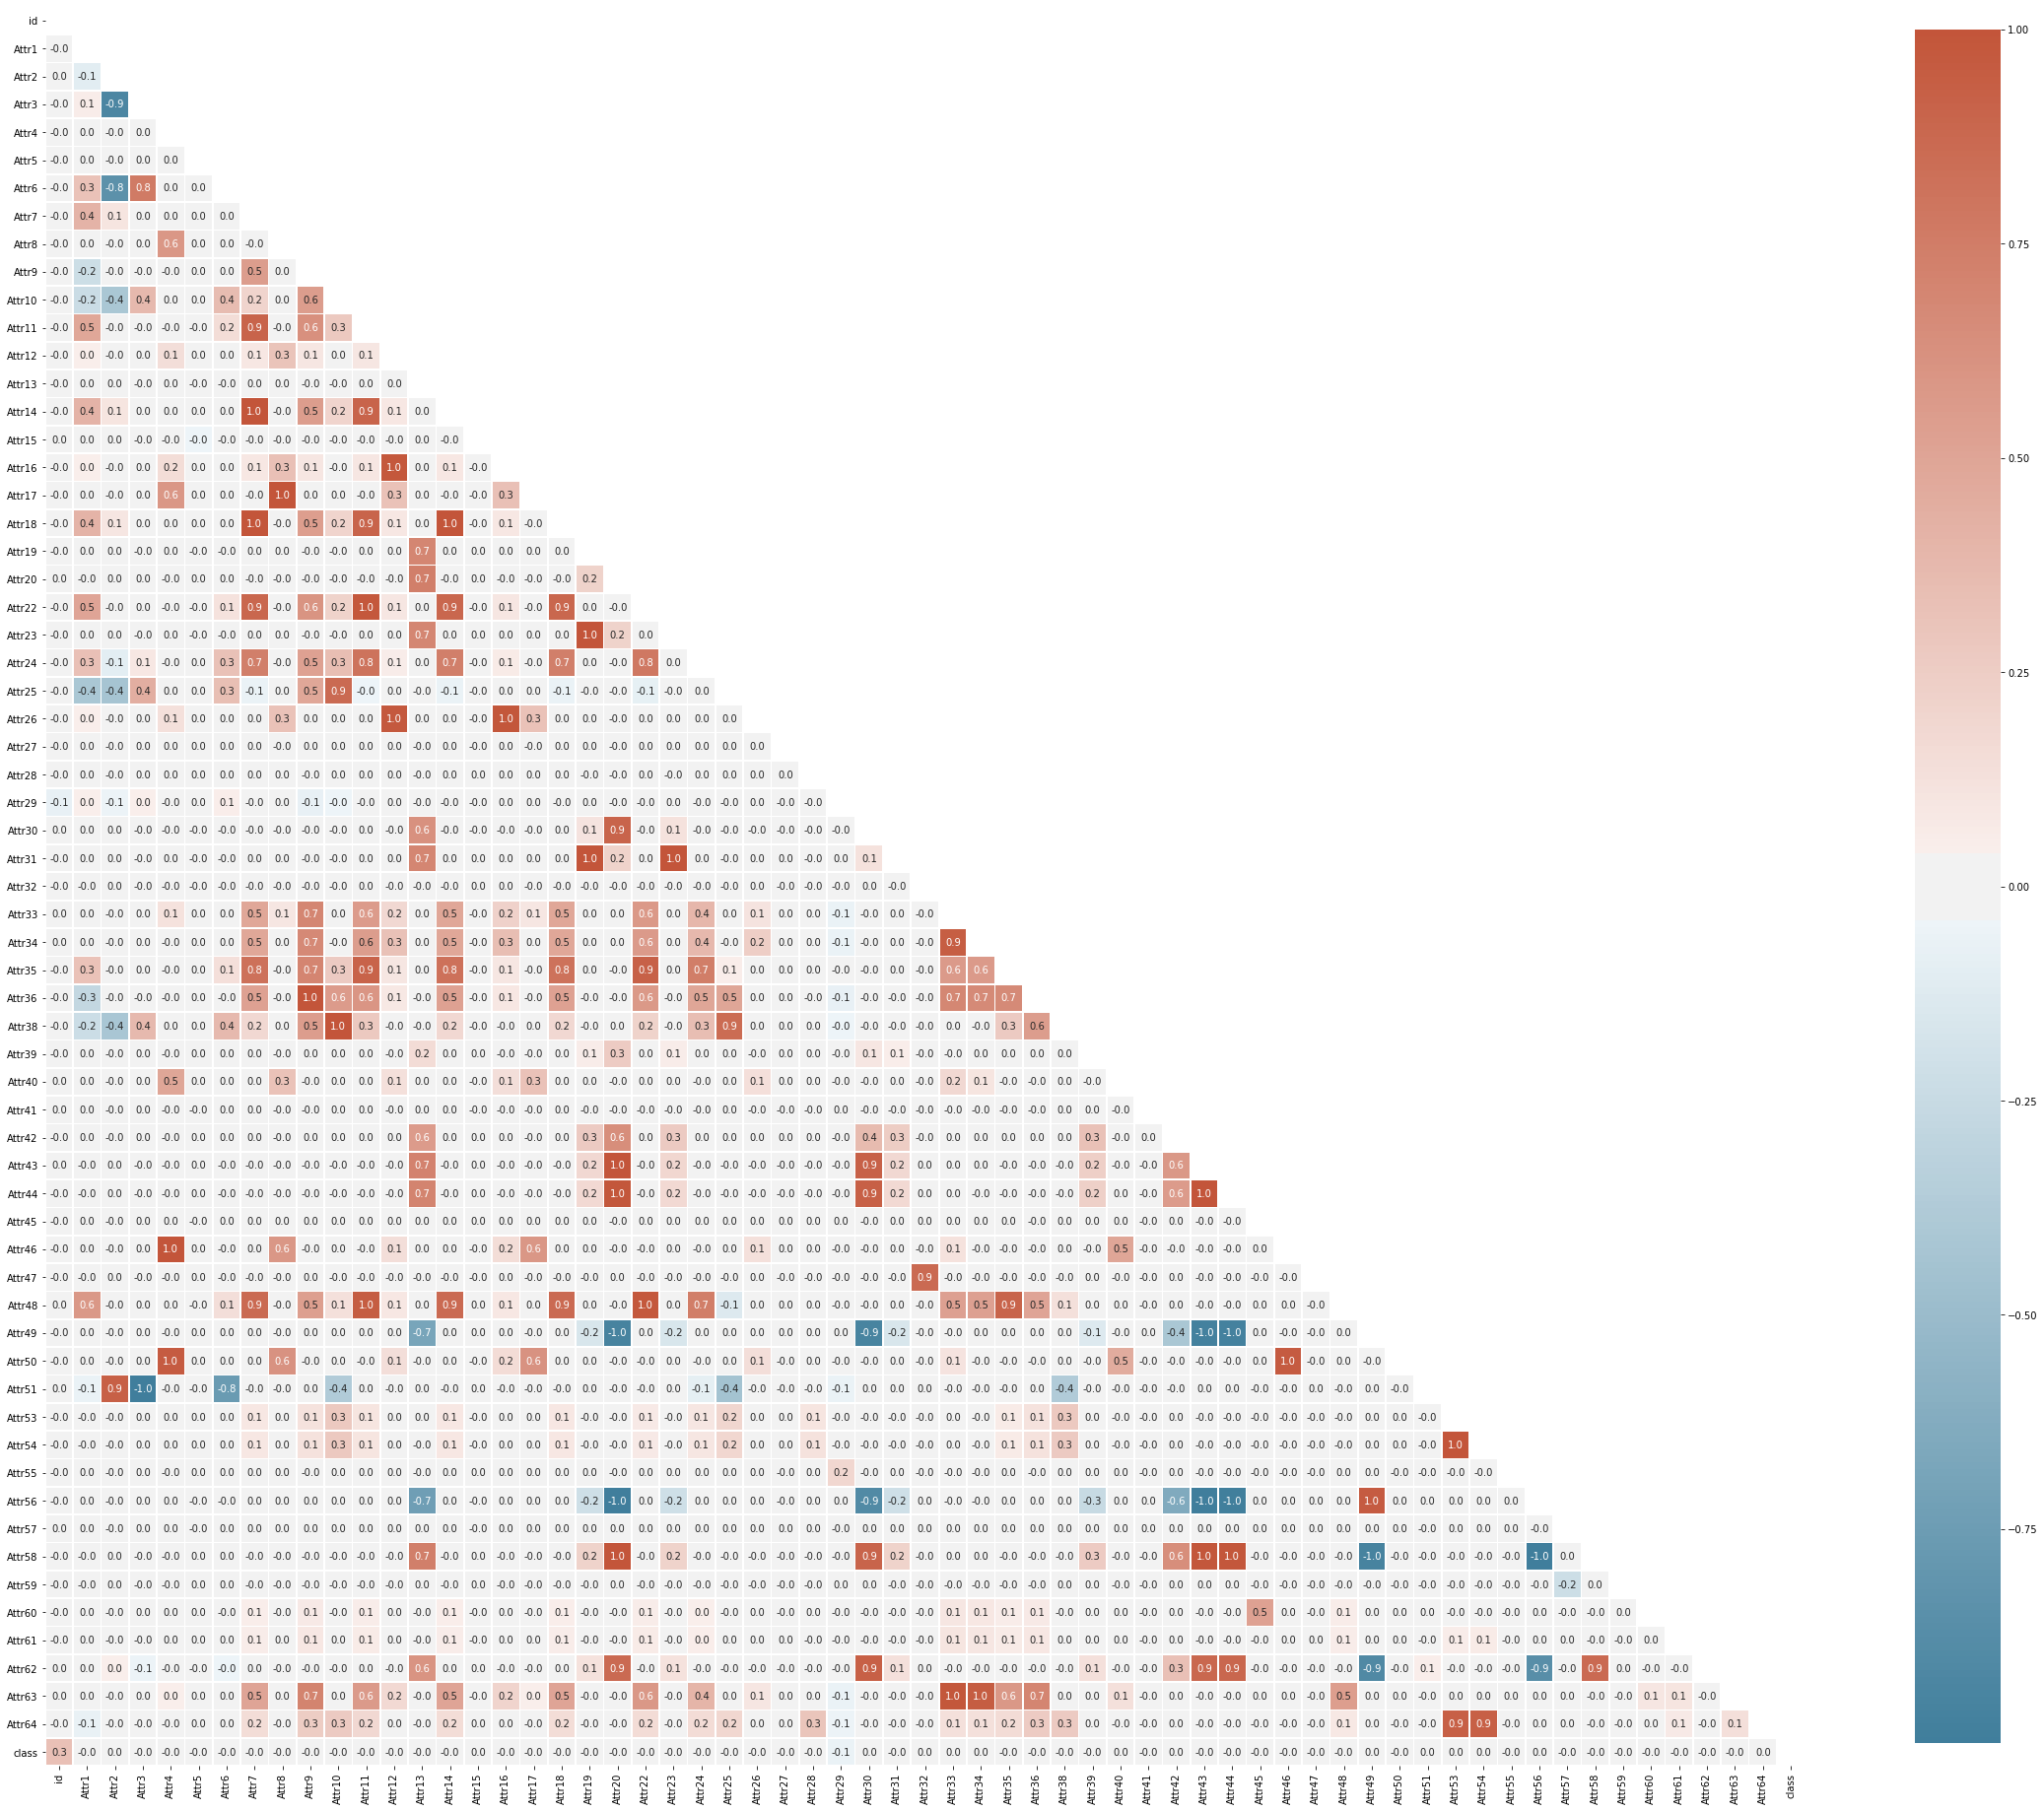

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.diverging_palette(240, 10, n=9)
# Compute the correlation matrix
corr = MEAN_df_final.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 40))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.7, cbar_kws={"shrink": .8},annot=True,fmt='.1f')

In [ ]:
#finding Attributes with coreelation >0.99
#this signifies presence of multicollinearity

In [ ]:
#Heat map inthe form of grid

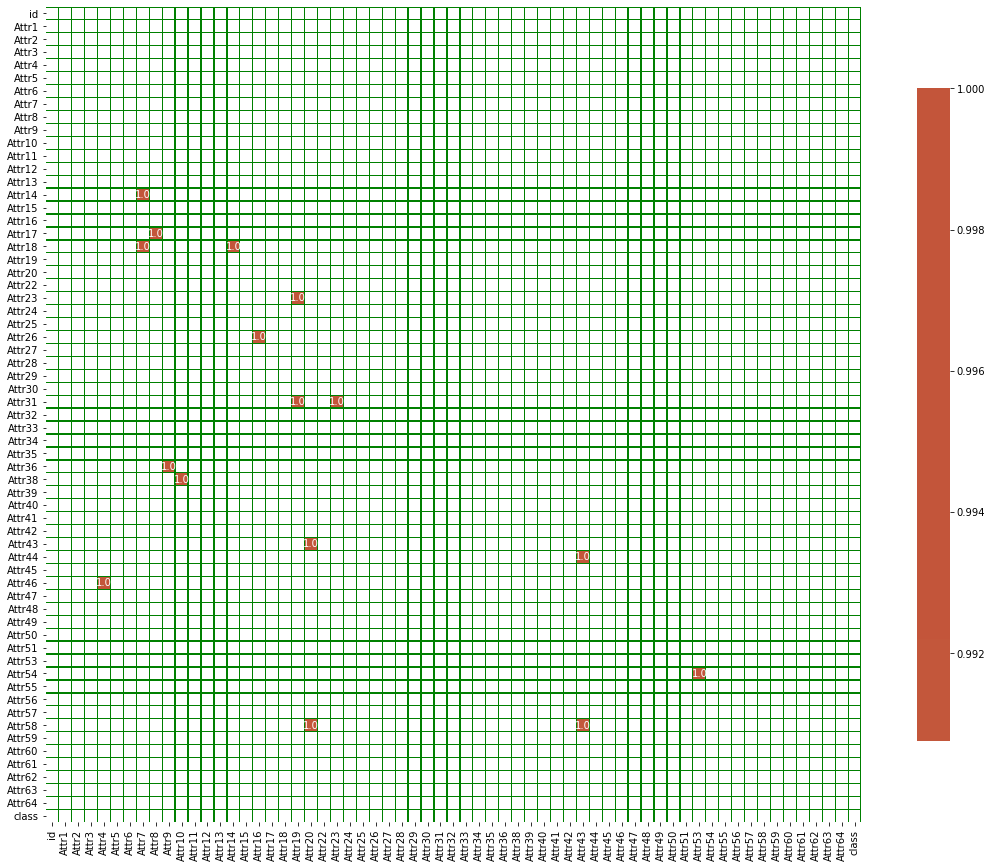

In [ ]:
sns.diverging_palette(240, 10, n=9)
# Compute the correlation matrix
a=MEAN_df_final.corr()
corr = a[a>0.99]
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,square=True, linewidths=.3, cbar_kws={"shrink": .8},annot=True,fmt='.1f',linecolor='green')

In [ ]:
imp_features =set(imp_unique)
len(list(imp_features))

60

In [ ]:
a={'Attr4','Attr7','Attr8','Attr9','Attr10','Attr16','Attr14','Attr19','Attr20','Attr22','Attr43','Attr53'}

In [ ]:
len(list(a))
#list of attributes with correlation >0.99

12

In [ ]:
imp_features =set(imp_unique)
b=imp_features.difference(a)

In [ ]:
#removing These attributes 

In [ ]:
len(list(b))

48

In [ ]:
final_features=list(b)

In [ ]:
MEAN_df_ML1=MEAN_df_final[final_features]
MEAN_df_ML1['class']=MEAN_df_final['class']

In [ ]:
MEAN_df_ML1.head()

,Attr11,Attr18,Attr62,Attr30,Attr36,Attr35,Attr45,Attr59,Attr32,Attr17,Attr38,Attr58,Attr15,Attr6,Attr27,Attr41,Attr40,Attr44,Attr61,Attr57,Attr33,Attr26,Attr2,Attr28,Attr1,Attr42,Attr13,Attr56,Attr5,Attr63,Attr23,Attr12,Attr3,Attr24,Attr46,Attr49,Attr48,Attr50,Attr54,Attr51,Attr29,Attr25,Attr60,Attr47,Attr31,Attr39,Attr55,Attr34,class
0,0.249760,0.249760,82.658,0.11788,1.7410,0.21402,1.00970,0.001924,94.14,2.6349,0.50591,0.87804,497.42,0.38825,1.45820,0.051402,0.662950,71.050,5.1372,0.39718,3.8772,0.60411,0.37951,1.7615,0.200550,0.128040,0.166600,0.121960,32.3510,4.4158,0.119980,0.65980,0.39641,0.477060,1.52250,0.110850,0.185300,2.0420,2.2480,0.37854,5.9443,0.50494,8.4160,49.394,0.149420,0.128040,348690.0,0.56393,0.0
1,0.261140,0.258340,107.350,0.26969,1.6996,0.20616,0.51045,0.000000,122.17,2.0005,0.49788,0.85300,677.96,0.00000,88.44400,0.064371,0.086422,111.510,3.2732,0.42002,2.9876,0.43992,0.49988,16.9460,0.209120,0.145950,0.158350,0.121300,14.7860,3.4000,0.123040,0.51680,0.47225,0.540231,1.12520,0.139610,0.237270,1.9447,17.8660,0.49988,3.6884,0.39542,4.1486,100.130,0.152000,0.121300,2304.6,2.98760,0.0
2,0.312580,0.309060,134.270,0.41929,1.3090,0.31565,0.94807,0.694840,176.93,1.4369,0.51537,0.76599,794.16,0.00000,86.01100,0.074020,0.322020,92.381,3.9510,0.81774,2.0630,0.37282,0.69592,1.0627,0.248660,0.231170,0.244350,0.241140,-1.1523,2.7185,0.189960,0.64184,0.26713,0.540231,1.01010,0.222930,0.291810,1.0758,2.0504,0.48152,4.3749,0.28932,4.9909,96.372,0.238150,0.241140,6332.7,1.42740,0.0
3,0.092704,0.092704,86.435,0.14343,1.3562,0.11550,0.28720,0.000000,91.37,3.2537,0.57353,0.94598,917.01,0.14988,0.94076,0.069622,0.401390,100.980,3.6147,0.14207,3.9948,0.36152,0.30734,1.9618,0.081483,0.088995,0.094257,0.054015,51.9520,4.2228,0.062782,0.30163,0.45879,0.171930,1.56960,0.066165,0.085874,2.4928,2.4524,0.30734,4.6511,0.57353,4.5746,84.344,0.071428,0.088995,20545.0,0.37581,0.0
4,0.187320,0.187320,127.210,0.27884,1.6278,0.19832,0.73919,0.124440,147.04,1.6307,0.43489,0.86515,1133.20,0.18732,1.41380,0.096680,0.293040,84.574,4.3158,0.48431,2.4823,0.32211,0.61323,1.1184,0.187320,0.122310,0.121820,0.134850,-7.3128,2.8692,0.115530,0.33147,0.22960,0.187320,0.95787,0.116010,0.188110,1.2959,2.1184,0.56511,4.1424,0.38677,6.3985,65.936,0.115530,0.122310,3186.6,0.32340,0.0


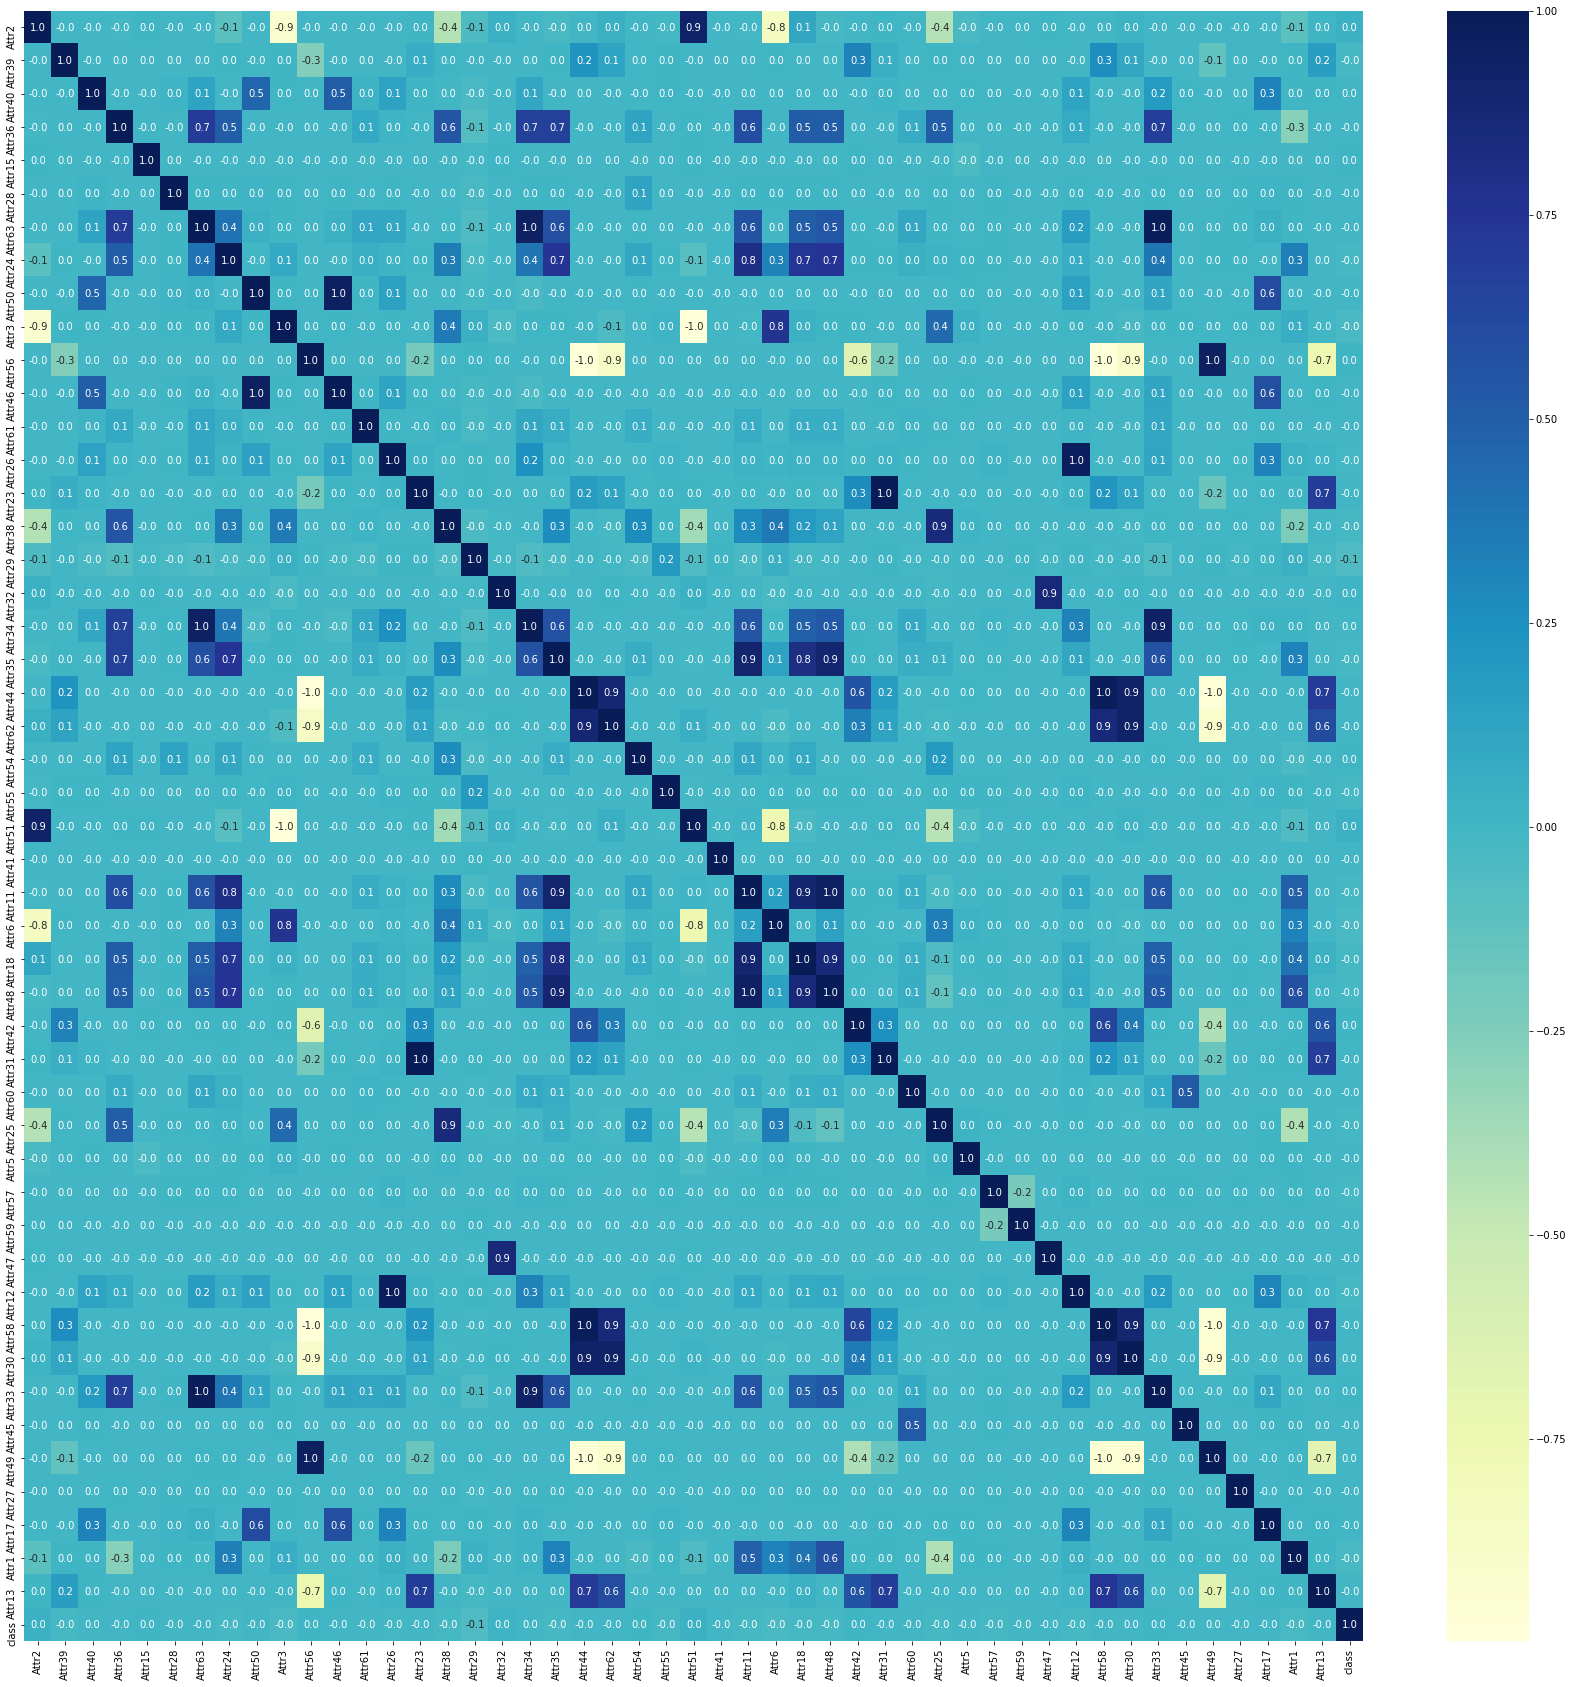

In [ ]:
#Correlation of important features
plt.figure(figsize=(30,30))
sns.heatmap(MEAN_df_ML1.corr(), annot=True,cmap="YlGnBu",fmt='.1f')

In [ ]:
c={'Attr63','Attr31','Attr48','Attr56','Attr34','Attr25','Attr58','Attr12','Attr3','Attr47','Attr11','Attr51','Attr50','Attr62','Attr44','Attr49'}

In [ ]:
len(list(c))

16

In [ ]:
len(list(b))

48

In [ ]:
final_features1=b.difference(c)

In [ ]:
final_features1

{'Attr1',
 'Attr13',
 'Attr15',
 'Attr17',
 'Attr18',
 'Attr2',
 'Attr23',
 'Attr24',
 'Attr26',
 'Attr27',
 'Attr28',
 'Attr29',
 'Attr30',
 'Attr32',
 'Attr33',
 'Attr35',
 'Attr36',
 'Attr38',
 'Attr39',
 'Attr40',
 'Attr41',
 'Attr42',
 'Attr45',
 'Attr46',
 'Attr5',
 'Attr54',
 'Attr55',
 'Attr57',
 'Attr59',
 'Attr6',
 'Attr60',
 'Attr61'}

In [ ]:
MEAN_df_ML2=MEAN_df_ML1[final_features1]
MEAN_df_ML2['class']=MEAN_df_ML1['class']
MEAN_df_ML2.head()

,Attr18,Attr30,Attr36,Attr45,Attr35,Attr59,Attr32,Attr17,Attr38,Attr6,Attr27,Attr15,Attr41,Attr40,Attr61,Attr57,Attr33,Attr26,Attr2,Attr28,Attr1,Attr42,Attr13,Attr5,Attr23,Attr46,Attr24,Attr54,Attr29,Attr60,Attr39,Attr55,class
0,0.249760,0.11788,1.7410,1.00970,0.21402,0.001924,94.14,2.6349,0.50591,0.38825,1.45820,497.42,0.051402,0.662950,5.1372,0.39718,3.8772,0.60411,0.37951,1.7615,0.200550,0.128040,0.166600,32.3510,0.119980,1.52250,0.477060,2.2480,5.9443,8.4160,0.128040,348690.0,0.0
1,0.258340,0.26969,1.6996,0.51045,0.20616,0.000000,122.17,2.0005,0.49788,0.00000,88.44400,677.96,0.064371,0.086422,3.2732,0.42002,2.9876,0.43992,0.49988,16.9460,0.209120,0.145950,0.158350,14.7860,0.123040,1.12520,0.540231,17.8660,3.6884,4.1486,0.121300,2304.6,0.0
2,0.309060,0.41929,1.3090,0.94807,0.31565,0.694840,176.93,1.4369,0.51537,0.00000,86.01100,794.16,0.074020,0.322020,3.9510,0.81774,2.0630,0.37282,0.69592,1.0627,0.248660,0.231170,0.244350,-1.1523,0.189960,1.01010,0.540231,2.0504,4.3749,4.9909,0.241140,6332.7,0.0
3,0.092704,0.14343,1.3562,0.28720,0.11550,0.000000,91.37,3.2537,0.57353,0.14988,0.94076,917.01,0.069622,0.401390,3.6147,0.14207,3.9948,0.36152,0.30734,1.9618,0.081483,0.088995,0.094257,51.9520,0.062782,1.56960,0.171930,2.4524,4.6511,4.5746,0.088995,20545.0,0.0
4,0.187320,0.27884,1.6278,0.73919,0.19832,0.124440,147.04,1.6307,0.43489,0.18732,1.41380,1133.20,0.096680,0.293040,4.3158,0.48431,2.4823,0.32211,0.61323,1.1184,0.187320,0.122310,0.121820,-7.3128,0.115530,0.95787,0.187320,2.1184,4.1424,6.3985,0.122310,3186.6,0.0


In [ ]:
MEAN_df_ML2.shape
#we have successfully done dimensionality reduction 

(43405, 33)

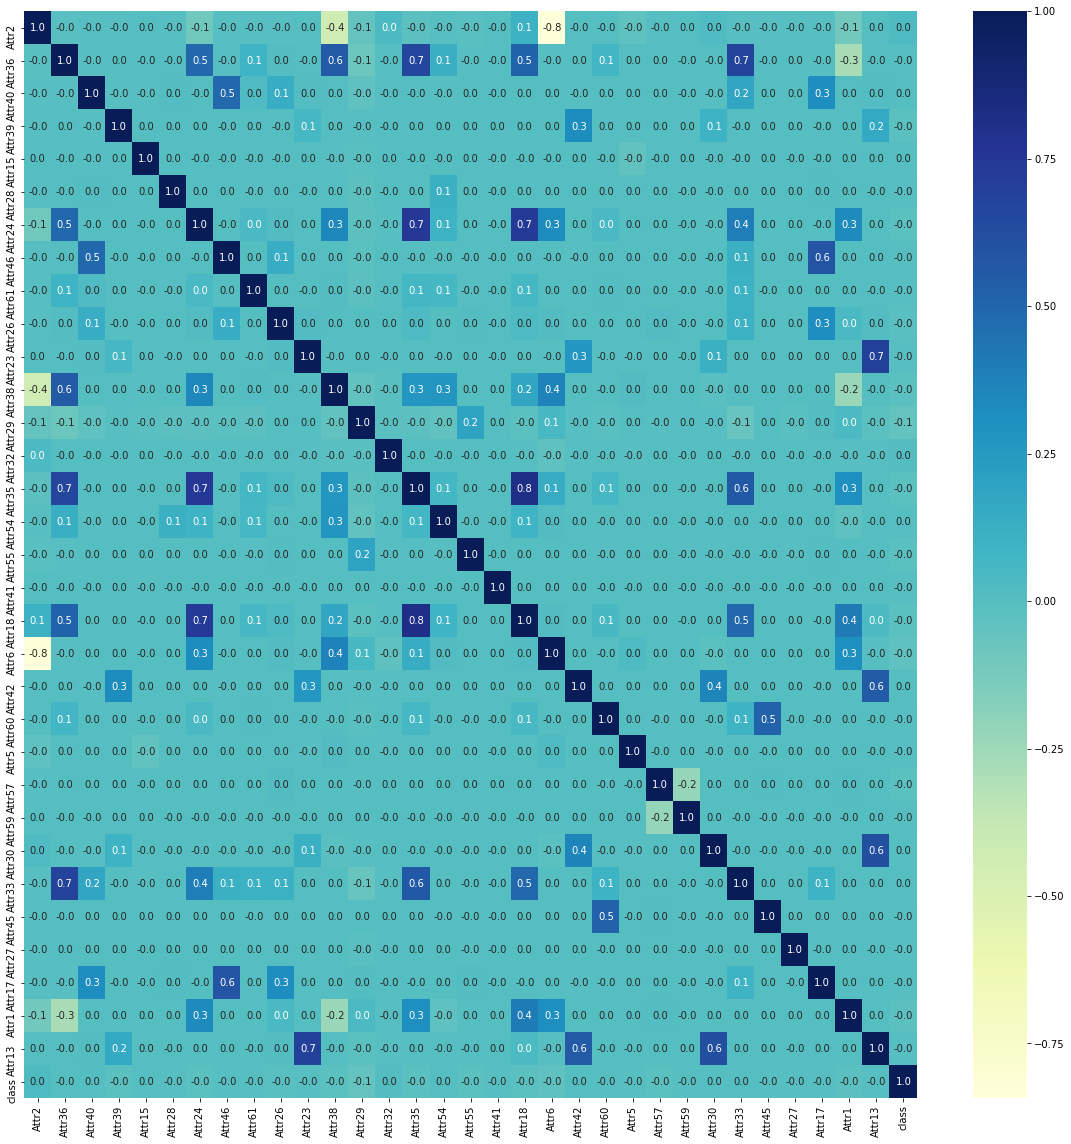

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(MEAN_df_ML2.corr(), annot=True,cmap="YlGnBu",fmt='.1f')
#we see that correlation has come in acceptable range

In [ ]:
# plt.figure(figsize=(10,10))
# sns.pairplot(MEAN_df_ML2, diag_kind ='kde',hue='class')
# plt.show()

In [ ]:
#Data is highly Skwed.
#we will have to perform Transformation.
#As we can see some features are negatively skwed we should Use PowerTransform(Later).

In [ ]:
MEAN_df_ML2.describe()

,Attr18,Attr30,Attr36,Attr45,Attr35,Attr59,Attr32,Attr17,Attr38,Attr6,Attr27,Attr15,Attr41,Attr40,Attr61,Attr57,Attr33,Attr26,Attr2,Attr28,Attr1,Attr42,Attr13,Attr5,Attr23,Attr46,Attr24,Attr54,Attr29,Attr60,Attr39,Attr55,class
count,43405.000000,43405.000000,43405.000000,43405.000000,43405.000000,43405.000000,4.340500e+04,43405.000000,43405.000000,43405.000000,4.340500e+04,4.340500e+04,43405.000000,43405.000000,43405.000000,43405.000000,43405.000000,43405.000000,43405.000000,43405.000000,43405.000000,43405.000000,43405.000000,4.340500e+04,43405.000000,43405.000000,43405.000000,43405.000000,43405.000000,4.340500e+04,43405.000000,4.340500e+04,43405.000000
mean,0.098566,7.365400,2.911374,15.010356,0.111913,1.333259,1.162764e+03,13.797974,0.724422,-0.056095,1.107231e+03,1.991752e+03,7.730193,2.147407,17.035141,-0.010524,8.635377,1.263533,0.590202,6.010807,0.035156,-0.142822,0.809233,-3.854251e+02,0.138847,5.427826,0.269809,24.446313,4.005040,4.470007e+02,-0.289314,7.672151e+03,0.048174
std,5.737117,813.297640,62.978548,2367.422795,4.782957,122.094600,9.518748e+04,506.772567,14.747915,7.200663,3.387929e+04,9.639193e+04,1386.635187,55.943341,552.399247,13.672969,118.807377,66.151619,5.842210,152.026505,2.993833,15.967578,86.816763,6.118021e+04,48.264212,294.896553,7.902870,1209.413556,0.826783,3.153360e+04,39.198891,7.005229e+04,0.214137
min,-517.480000,-6351.700000,-0.000857,-256230.000000,-431.590000,-327.970000,-9.295600e+03,-0.412920,-479.910000,-508.410000,-2.590100e+05,-9.632400e+06,-1234.400000,-101.270000,-12.656000,-1667.300000,-19.197000,-6331.800000,-430.870000,-3829.900000,-463.890000,-1395.800000,-1460.600000,-1.190300e+07,-1578.700000,-101.260000,-463.890000,-3828.900000,-0.886060,-1.244000e+01,-7522.000000,-1.805200e+06,0.000000
25%,0.005776,0.083115,1.101100,0.025622,0.006038,0.000000,4.664400e+01,1.452400,0.419840,0.000000,1.062800e-01,2.231800e+02,0.027543,0.052877,4.515600,0.014638,2.824800,0.067034,0.269010,0.044774,0.003423,0.000000,0.023998,-4.929400e+01,0.002203,0.608610,0.024308,0.963610,3.495300,5.729400e+00,0.003907,2.757300e+01,0.000000
50%,0.059656,0.218200,1.643400,0.317540,0.060655,0.006389,7.904200e+01,2.119000,0.612240,0.000000,1.278200e+00,8.463900e+02,0.088181,0.178130,6.649500,0.119650,4.641700,0.222550,0.471910,0.486640,0.049636,0.037770,0.068794,-1.069200e+00,0.029916,1.030000,0.159580,1.398000,4.014200,1.040000e+01,0.036652,1.088400e+03,0.000000
75%,0.150940,0.411340,2.421100,1.165300,0.150090,0.236280,1.300600e+02,3.717800,0.771860,0.089441,8.273500e+00,2.229000e+03,0.217020,0.662320,10.443000,0.284570,7.839900,0.601440,0.688270,1.618100,0.129560,0.091865,0.135830,5.063100e+01,0.078222,1.919400,0.353120,2.477700,4.520100,2.389000e+01,0.091532,4.993700e+03,0.000000
max,649.230000,152860.000000,9742.300000,366030.000000,626.920000,23853.000000,1.736400e+07,53433.000000,1099.500000,543.250000,4.208800e+06,1.023600e+07,288770.000000,8007.100000,108000.000000,552.640000,21944.000000,8262.300000,480.960000,21701.000000,94.280000,2156.800000,13315.000000,1.250100e+06,9230.500000,53433.000000,831.660000,180440.000000,9.698300,4.818700e+06,2156.500000,6.123700e+06,1.000000


In [ ]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
inp=MEAN_df_ML2.drop('class',1)
vif=pd.DataFrame()
vif['Feature']=inp.columns
vif['VIF']=[variance_inflation_factor(inp.values,i) for i in range(inp.shape[1])]

vif.sort_values('VIF',ascending=False).head(5)

,Feature,VIF
2,Attr36,11.733411
22,Attr13,5.784074
9,Attr6,5.699758
4,Attr35,5.663986
8,Attr38,5.385538


In [ ]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
inp=MEAN_df_ML2.drop(['class','Attr36'],1)
vif=pd.DataFrame()
vif['Feature']=inp.columns
vif['VIF']=[variance_inflation_factor(inp.values,i) for i in range(inp.shape[1])]

vif.sort_values('VIF',ascending=False).head(5)

,Feature,VIF
21,Attr13,5.783838
8,Attr6,5.698534
0,Attr18,4.750180
17,Attr2,4.733611
3,Attr35,4.172972


In [ ]:
# multicollinearity after removing attr36
# we observe that vif is now in acceptable range

In [ ]:
MEAN_df_ML2.skew()

Attr2      56.902283
Attr36    108.859853
Attr40     99.596958
Attr39   -160.702572
Attr15     15.897557
Attr28     90.142492
Attr24     46.267221
Attr46    155.959758
Attr61    176.418988
Attr26     58.801562
Attr23    162.013489
Attr38     48.540203
Attr29     -0.079036
Attr32    152.464467
Attr35     60.244447
Attr54    104.994294
Attr55     37.915400
Attr41    208.079381
Attr18     18.742795
Attr6     -29.369685
Attr42     26.634794
Attr60    126.094052
Attr5    -171.952093
Attr57    -71.737087
Attr59    177.776492
Attr30    164.498044
Attr33    154.493757
Attr45     61.968535
Attr27     74.279748
Attr17     76.973673
Attr1    -114.355641
Attr13    118.176103
class       4.220172
dtype: float64

In [ ]:
#Data is highly Skwed.
#we will have to perform Transformation.
#As we can see some features are negatively skwed we should Use PowerTransform(Later).

In [ ]:
MEAN_df_ML2.var()
#presence of high variance signifies that all these features can be used in model building

Attr2     3.413141e+01
Attr36    3.966297e+03
Attr40    3.129657e+03
Attr39    1.536553e+03
Attr15    9.291405e+09
Attr28    2.311206e+04
Attr24    6.245536e+01
Attr46    8.696398e+04
Attr61    3.051449e+05
Attr26    4.376037e+03
Attr23    2.329434e+03
Attr38    2.175010e+02
Attr29    6.835709e-01
Attr32    9.060656e+09
Attr35    2.287668e+01
Attr54    1.462681e+06
Attr55    4.907323e+09
Attr41    1.922757e+06
Attr18    3.291451e+01
Attr6     5.184954e+01
Attr42    2.549635e+02
Attr60    9.943678e+08
Attr5     3.743018e+09
Attr57    1.869501e+02
Attr59    1.490709e+04
Attr30    6.614531e+05
Attr33    1.411519e+04
Attr45    5.604691e+06
Attr27    1.147806e+09
Attr17    2.568184e+05
Attr1     8.963036e+00
Attr13    7.537150e+03
class     4.585448e-02
dtype: float64

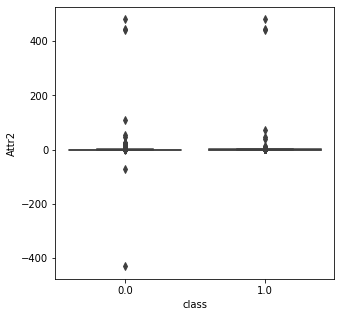

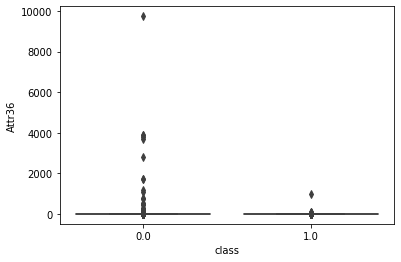

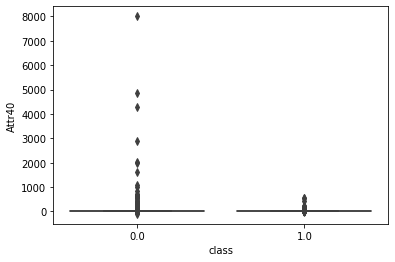

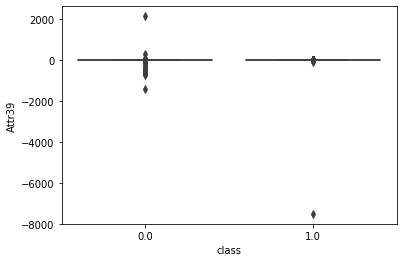

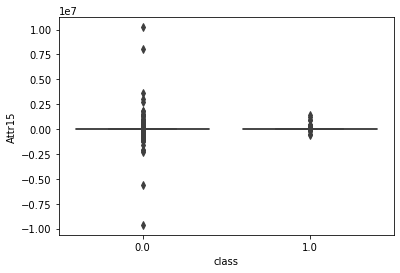

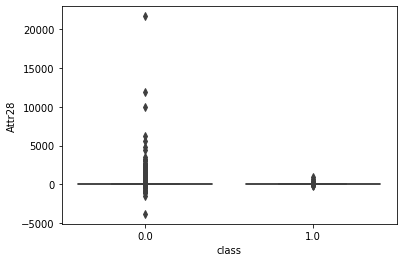

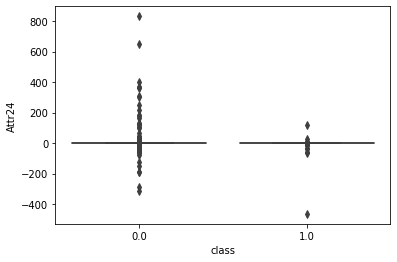

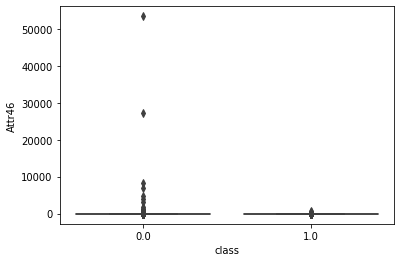

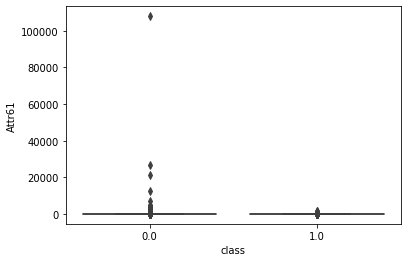

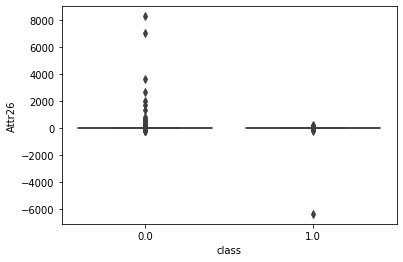

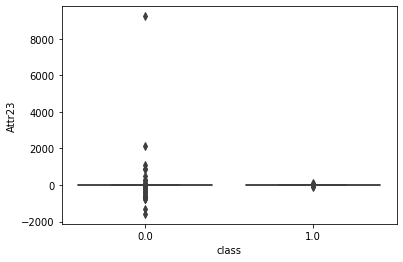

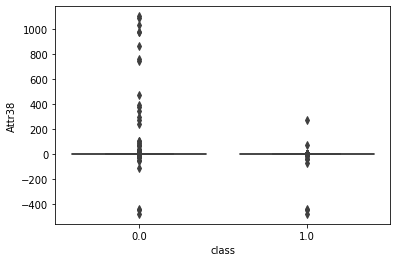

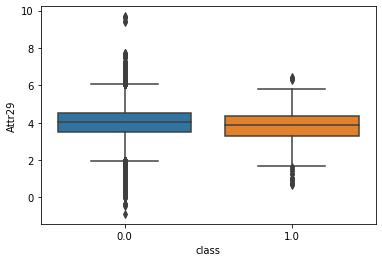

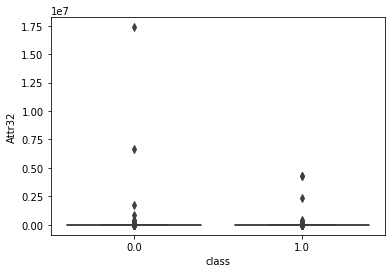

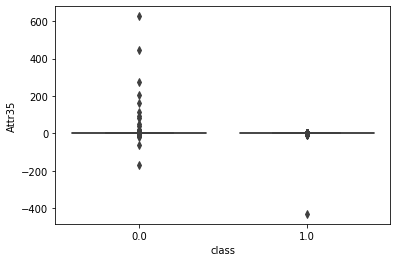

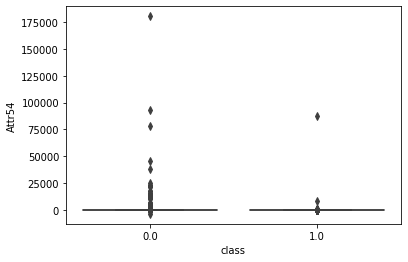

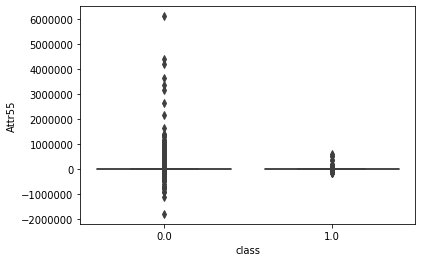

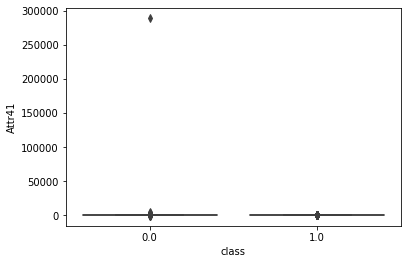

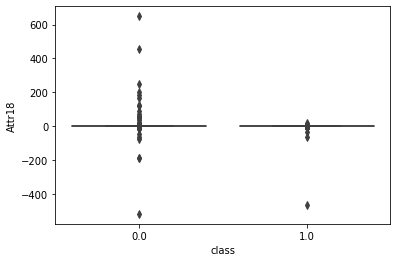

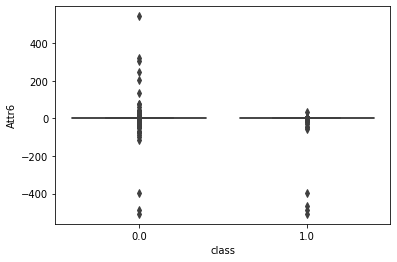

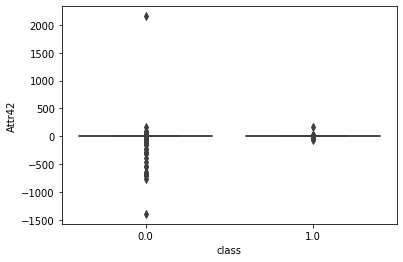

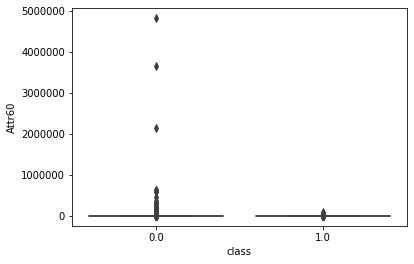

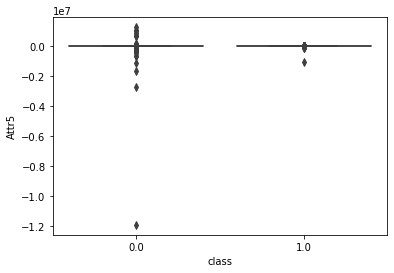

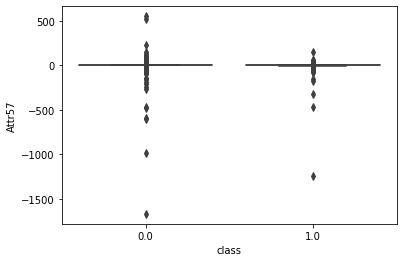

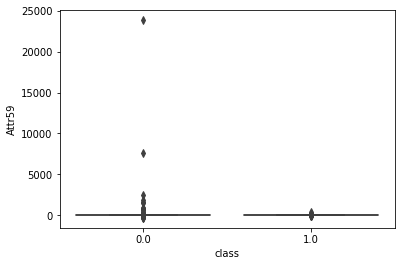

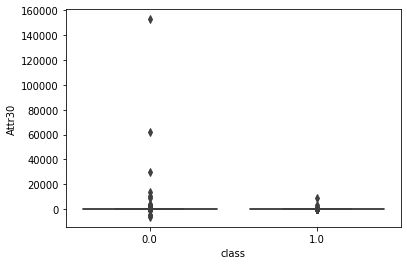

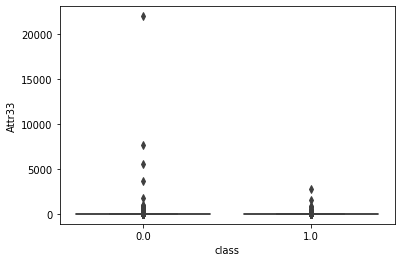

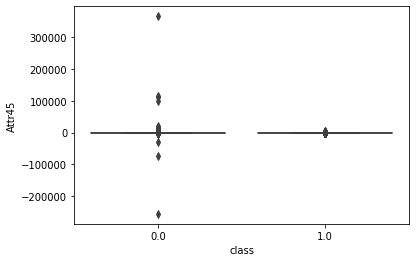

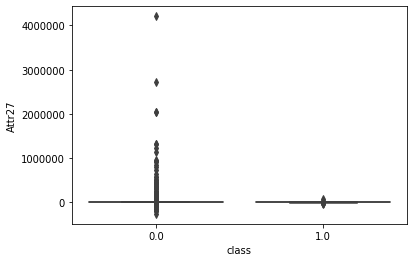

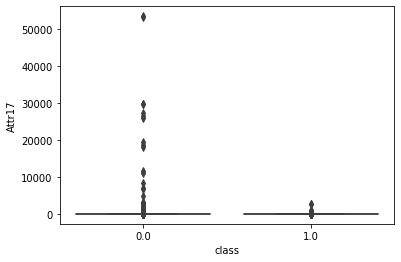

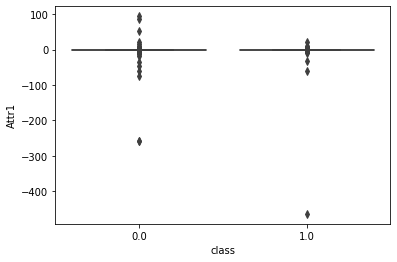

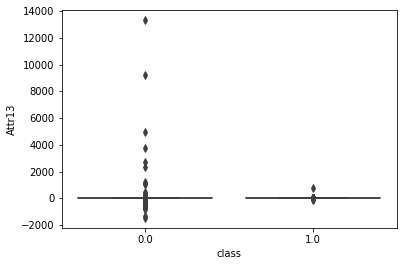

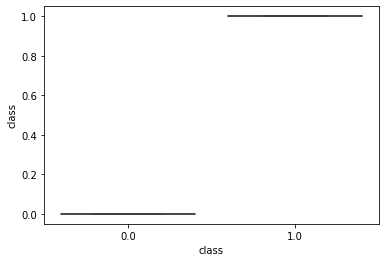

In [ ]:
plt.figure(figsize=[5,5])
j=1
for i in MEAN_df_ML2.columns:
    #plt.subplot(11,3,j)
    sns.boxplot(MEAN_df_ML2['class'],MEAN_df_ML2[i])
    plt.show()
    j=j+1

In [ ]:
# There are too many outliers are present in the data.
# Attr29 have less outliers as compared to other features.
# We will have to perform outlier treatment.

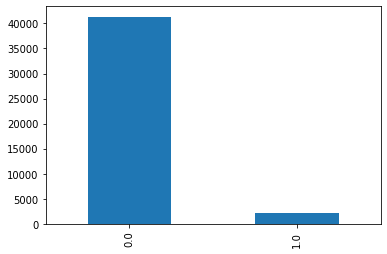

In [ ]:
MEAN_df_ML2['class'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
# Data is highly Imbalanced.
# Most machine learning algorithms work best when the number of samples in each class are near about equal. 
# This is because most algorithms are designed to maximize accuracy and reduce error.
# We can use SMOTE (Synthetic Minority Over-sampling Technique) to treate imbalanced data.

In [ ]:
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.over_sampling import SMOTE

In [ ]:
def plot_dataset(x,y):
    plt.figure(figsize=[8,6])
    n_classes = len(np.unique(y))
    for i in y.unique():
        row = np.where(y==i)[0]
        plt.scatter(x.iloc[row,1],x.iloc[row,2], label = str(i))
    plt.legend()
    plt.show()

In [ ]:
x=MEAN_df_ML2.drop('class',1)
y=MEAN_df_ML2['class']


smote = SMOTE(random_state = 100)
xsm, ysm = smote.fit_resample(x,y)

In [ ]:
print('Before SMOTE ' , Counter(y))
smote = SMOTE(random_state = 150)
x_sm, y_sm=smote.fit_resample(x,y)
print('After SMOTE ' , Counter(y_sm))

Before SMOTE  Counter({0.0: 41314, 1.0: 2091})
After SMOTE  Counter({0.0: 41314, 1.0: 41314})


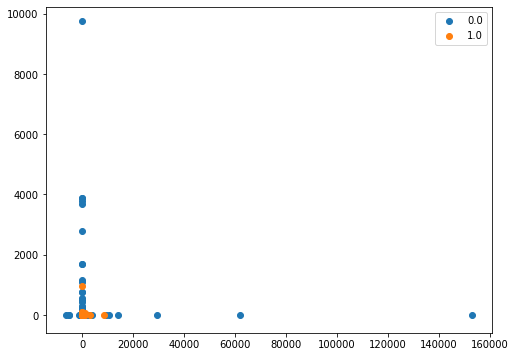

In [ ]:
plot_dataset(x, y)
plt.show()

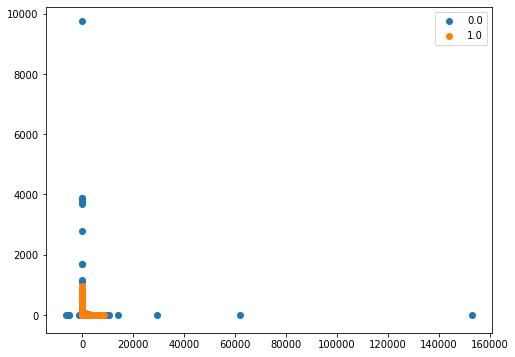

In [ ]:
plot_dataset(x_sm, y_sm)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold
xtrain, xtest, ytrain, ytest = train_test_split(xsm, ysm, test_size = .30, random_state=21)

In [ ]:
for j in xsm.columns:
    t,p = stats.mannwhitneyu(xtrain[j],xsm[j])
    t1,p1 = stats.mannwhitneyu(xtrain[j],xtest[j])
    if p<0.05:
        print(" ------ for Feature {} xtrain and xsm data is different p. values is {} ".format(j,p))
    if p1<0.05:
        print(" ------ for Feature {} xtrain and xtest data is different. p values is {}".format(j,p1))
    if (p>0.05 and p1>0.05):
        print("for Feature {}, no difference in train, test and original data. p values is {} {}".format(j,p1.round(3),p.round(3)))

for Feature Attr18, no difference in train, test and original data. p values is 0.284 0.405
for Feature Attr30, no difference in train, test and original data. p values is 0.122 0.312
for Feature Attr36, no difference in train, test and original data. p values is 0.382 0.45
for Feature Attr45, no difference in train, test and original data. p values is 0.377 0.448
for Feature Attr35, no difference in train, test and original data. p values is 0.455 0.481
for Feature Attr59, no difference in train, test and original data. p values is 0.444 0.477
for Feature Attr32, no difference in train, test and original data. p values is 0.221 0.373
for Feature Attr17, no difference in train, test and original data. p values is 0.206 0.365
for Feature Attr38, no difference in train, test and original data. p values is 0.157 0.336
for Feature Attr6, no difference in train, test and original data. p values is 0.32 0.422
for Feature Attr27, no difference in train, test and original data. p values is 0.2

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [ ]:
dt = DecisionTreeClassifier()
dt_model=dt.fit(xtrain, ytrain)
y_pred_lr_smote = dt_model.predict(xtest)

In [ ]:
print('confusion_matrix: ')
print(confusion_matrix(ytest,y_pred_lr_smote))
print('classification_report: ')
print(classification_report(ytest,y_pred_lr_smote))
print('accuracy_score: ')
print(accuracy_score(ytest,y_pred_lr_smote))

confusion_matrix: 
[[11229  1209]
 [  865 11486]]
classification_report: 
              precision    recall  f1-score   support

         0.0       0.93      0.90      0.92     12438
         1.0       0.90      0.93      0.92     12351

    accuracy                           0.92     24789
   macro avg       0.92      0.92      0.92     24789
weighted avg       0.92      0.92      0.92     24789

accuracy_score: 
0.9163338577594901


In [ ]:
kf = KFold(n_splits=5,shuffle=True, random_state=10)
score = cross_val_score(estimator=dt, X=xtrain, y=ytrain, scoring='accuracy', cv=kf)
print("Average Accuracy Score Test: ",np.mean(score))

Average Accuracy Score Test:  0.9082453947720067


## KNeighbors Regressor

In [ ]:
# #KNeighbors Imputation --- For all years separately
# for i in range(1,6):
#     it = IterativeImputer(estimator=KNeighborsRegressor())
#     vars()["newknn_df"+str(i)] = pd.DataFrame(it.fit_transform(vars()["dfn_"+str(i)]))
#     vars()["newknn_df"+str(i)].columns = vars()["dfn_"+str(i)].columns

In [ ]:
# newknn_df1.to_csv('newknn_df1.csv')
# newknn_df2.to_csv('newknn_df2.csv')
# newknn_df3.to_csv('newknn_df3.csv')
# newknn_df4.to_csv('newknn_df4.csv')
# newknn_df5.to_csv('newknn_df5.csv')

In [ ]:
newknn_df1=pd.read_csv('newknn_df1.csv')
newknn_df2=pd.read_csv('newknn_df2.csv')
newknn_df3=pd.read_csv('newknn_df3.csv')
newknn_df4=pd.read_csv('newknn_df4.csv')
newknn_df5=pd.read_csv('newknn_df5.csv')

In [ ]:
for i in range(1,6):
    vars()["newknn_df"+str(i)] = vars()["newknn_df"+str(i)].drop(['Unnamed: 0'],1)
    vars()["newknn_df"+str(i)].set_index('id',inplace=True)

In [ ]:
# with pd.option_context('display.max_rows',None,'display.max_columns', None): 
#     display(new_df2.describe().T)

In [ ]:
# with pd.option_context('display.max_rows',None,'display.max_columns', None): 
#     display(df_2.describe().T)

#### Statistical Test to validate the use of KNN Imputation to treat null values

In [ ]:

for i in range(1,6):
    for j in vars()["newknn_df"+str(i)].columns:
        t,p = stats.mannwhitneyu(vars()["dfn_"+str(i)][j],vars()["newknn_df"+str(i)][j])
        if p<0.05:
            print("Feature {} for data {} with p val {}: ".format(j,i,p.round(4)))
            print("data before imputation and after imputation is not the same for ",j)
        else:
            print("Feature {} for data {} with p val {}: ".format(j,i,p.round(4)))
            print("imputation didn't change data for ",j)

Feature Attr1 for data 1 with p val 0.4877: 
imputation didn't change data for  Attr1
Feature Attr2 for data 1 with p val 0.4735: 
imputation didn't change data for  Attr2
Feature Attr3 for data 1 with p val 0.484: 
imputation didn't change data for  Attr3
Feature Attr4 for data 1 with p val 0.4557: 
imputation didn't change data for  Attr4
Feature Attr5 for data 1 with p val 0.4603: 
imputation didn't change data for  Attr5
Feature Attr6 for data 1 with p val 0.4841: 
imputation didn't change data for  Attr6
Feature Attr7 for data 1 with p val 0.487: 
imputation didn't change data for  Attr7
Feature Attr8 for data 1 with p val 0.2905: 
imputation didn't change data for  Attr8
Feature Attr9 for data 1 with p val 0.4991: 
imputation didn't change data for  Attr9
Feature Attr10 for data 1 with p val 0.4958: 
imputation didn't change data for  Attr10
Feature Attr11 for data 1 with p val 0.2298: 
imputation didn't change data for  Attr11
Feature Attr12 for data 1 with p val 0.4576: 
imputa

Feature Attr59 for data 2 with p val 0.4897: 
imputation didn't change data for  Attr59
Feature Attr60 for data 2 with p val 0.0001: 
data before imputation and after imputation is not the same for  Attr60
Feature Attr61 for data 2 with p val 0.4639: 
imputation didn't change data for  Attr61
Feature Attr62 for data 2 with p val 0.2326: 
imputation didn't change data for  Attr62
Feature Attr63 for data 2 with p val 0.4305: 
imputation didn't change data for  Attr63
Feature Attr64 for data 2 with p val 0.0785: 
imputation didn't change data for  Attr64
Feature class for data 2 with p val 0.5: 
imputation didn't change data for  class
Feature Attr1 for data 3 with p val 0.4999: 
imputation didn't change data for  Attr1
Feature Attr2 for data 3 with p val 0.4998: 
imputation didn't change data for  Attr2
Feature Attr3 for data 3 with p val 0.4999: 
imputation didn't change data for  Attr3
Feature Attr4 for data 3 with p val 0.4605: 
imputation didn't change data for  Attr4
Feature Attr5 f

Feature Attr35 for data 4 with p val 0.5: 
imputation didn't change data for  Attr35
Feature Attr36 for data 4 with p val 0.5: 
imputation didn't change data for  Attr36
Feature Attr38 for data 4 with p val 0.5: 
imputation didn't change data for  Attr38
Feature Attr39 for data 4 with p val 0.3758: 
imputation didn't change data for  Attr39
Feature Attr40 for data 4 with p val 0.3997: 
imputation didn't change data for  Attr40
Feature Attr41 for data 4 with p val 0.0144: 
data before imputation and after imputation is not the same for  Attr41
Feature Attr42 for data 4 with p val 0.3864: 
imputation didn't change data for  Attr42
Feature Attr43 for data 4 with p val 0.4282: 
imputation didn't change data for  Attr43
Feature Attr44 for data 4 with p val 0.4365: 
imputation didn't change data for  Attr44
Feature Attr45 for data 4 with p val 0.0: 
data before imputation and after imputation is not the same for  Attr45
Feature Attr46 for data 4 with p val 0.4053: 
imputation didn't change d

In [ ]:
#we observe that Knn imputation does change the central tendency of data
#hence we can use Knn impted data for further processing

In [ ]:
#same operations that are done on mean imputed data will be done on knn imputed data

## Linear Regression

In [ ]:
# #Linear regression Imputation --- For all years separately
# for i in range(1,6):
#     it = IterativeImputer(estimator=LinearRegression())
#     vars()["newLR_df"+str(i)] = pd.DataFrame(it.fit_transform(vars()["dfn_"+str(i)]))
#     vars()["newLR_df"+str(i)].columns = vars()["dfn_"+str(i)].columns

In [ ]:
# newLR_df1.to_csv('newLR_df1.csv')
# newLR_df2.to_csv('newLR_df2.csv')
# newLR_df3.to_csv('newLR_df3.csv')
# newLR_df4.to_csv('newLR_df4.csv')
# newLR_df5.to_csv('newLR_df5.csv')

In [ ]:
newLR_df1=pd.read_csv('newLR_df1.csv')
newLR_df2=pd.read_csv('newLR_df2.csv')
newLR_df3=pd.read_csv('newLR_df3.csv')
newLR_df4=pd.read_csv('newLR_df4.csv')
newLR_df5=pd.read_csv('newLR_df5.csv')


In [ ]:
for i in range(1,6):
    vars()["newLR_df"+str(i)] = vars()["newLR_df"+str(i)].drop(['Unnamed: 0'],1)

In [ ]:
# with pd.option_context('display.max_rows',None,'display.max_columns', None): 
#     display(newLR_df2.describe().T)

In [ ]:
# with pd.option_context('display.max_rows',None,'display.max_columns', None): 
#     display(df_2.describe().T)

#### Statistical test to check the central tendency of Data due to impuatation

In [ ]:
#Hypothesis testing between xtrain and population(parkinsons) dataset
for i in range(1,6):
    for j in vars()["newLR_df"+str(i)].columns:
        t,p = stats.mannwhitneyu(vars()["dfn_"+str(i)][j],vars()["newLR_df"+str(i)][j])
        if p<0.05:
            print("Feature {} for data {} with p val {}: ".format(j,i,p.round(4)))
            print("data before imputation and after imputation is not the same for ",j)
        else:
            print("Feature {} for data {} with p val {}: ".format(j,i,p.round(4)))
            print("imputation didn't change data for ",j)

Feature id for data 1 with p val 0.5: 
imputation didn't change data for  id
Feature Attr1 for data 1 with p val 0.4821: 
imputation didn't change data for  Attr1
Feature Attr2 for data 1 with p val 0.4878: 
imputation didn't change data for  Attr2
Feature Attr3 for data 1 with p val 0.4774: 
imputation didn't change data for  Attr3
Feature Attr4 for data 1 with p val 0.3063: 
imputation didn't change data for  Attr4
Feature Attr5 for data 1 with p val 0.4538: 
imputation didn't change data for  Attr5
Feature Attr6 for data 1 with p val 0.4851: 
imputation didn't change data for  Attr6
Feature Attr7 for data 1 with p val 0.4962: 
imputation didn't change data for  Attr7
Feature Attr8 for data 1 with p val 0.3132: 
imputation didn't change data for  Attr8
Feature Attr9 for data 1 with p val 0.4985: 
imputation didn't change data for  Attr9
Feature Attr10 for data 1 with p val 0.4999: 
imputation didn't change data for  Attr10
Feature Attr11 for data 1 with p val 0.2451: 
imputation didn

Feature Attr59 for data 2 with p val 0.4999: 
imputation didn't change data for  Attr59
Feature Attr60 for data 2 with p val 0.0015: 
data before imputation and after imputation is not the same for  Attr60
Feature Attr61 for data 2 with p val 0.4454: 
imputation didn't change data for  Attr61
Feature Attr62 for data 2 with p val 0.0912: 
imputation didn't change data for  Attr62
Feature Attr63 for data 2 with p val 0.412: 
imputation didn't change data for  Attr63
Feature Attr64 for data 2 with p val 0.2985: 
imputation didn't change data for  Attr64
Feature class for data 2 with p val 0.5: 
imputation didn't change data for  class
Feature id for data 3 with p val 0.5: 
imputation didn't change data for  id
Feature Attr1 for data 3 with p val 0.4999: 
imputation didn't change data for  Attr1
Feature Attr2 for data 3 with p val 0.4998: 
imputation didn't change data for  Attr2
Feature Attr3 for data 3 with p val 0.4999: 
imputation didn't change data for  Attr3
Feature Attr4 for data 3 

Feature Attr40 for data 4 with p val 0.4257: 
imputation didn't change data for  Attr40
Feature Attr41 for data 4 with p val 0.0474: 
data before imputation and after imputation is not the same for  Attr41
Feature Attr42 for data 4 with p val 0.3067: 
imputation didn't change data for  Attr42
Feature Attr43 for data 4 with p val 0.4973: 
imputation didn't change data for  Attr43
Feature Attr44 for data 4 with p val 0.4979: 
imputation didn't change data for  Attr44
Feature Attr45 for data 4 with p val 0.0: 
data before imputation and after imputation is not the same for  Attr45
Feature Attr46 for data 4 with p val 0.4575: 
imputation didn't change data for  Attr46
Feature Attr47 for data 4 with p val 0.3884: 
imputation didn't change data for  Attr47
Feature Attr48 for data 4 with p val 0.4908: 
imputation didn't change data for  Attr48
Feature Attr49 for data 4 with p val 0.3073: 
imputation didn't change data for  Attr49
Feature Attr50 for data 4 with p val 0.4482: 
imputation didn't

In [ ]:
#we observe that for Attr4,Attr16,Attr33, Attr40, Attr46,Attr63(df1)
#we observe that for Attr30,Attr56,Attr58,Attr62 (df2)
#due to linear regression based iterativre imputation the distribution changes and there is effect on central tendency

#Thus we CANNOT use linear regression based imputation for further operation

# MICE Imputation (Multivariate Imputation by Chained Equations)

In [ ]:
#dropping id column so that it does not affect the calculation of mice imputation
# dfn_1=dfn_1.drop(['id'],1)
# dfn_2=dfn_2.rop(['id'],1)
# dfn_3=dfn_3.rop(['id'],1)
# dfn_4=dfn_4.rop(['id'],1)
# dfn_5=dfn_5.op(['id'],1)

In [ ]:
# from impyute.imputation.cs import mice
# mice_df1=pd.DataFrame(mice(dfn_1.values),columns=dfn_1.columns)
# mice_df1.to_csv('mice1.csv')
# mice_df2=pd.DataFrame(mice(dfn_2.values),columns=dfn_2.columns)
# mice_df2.to_csv('mice2.csv')
# mice_df3=pd.DataFrame(mice(dfn_3.values),columns=dfn_3.columns)
# mice_df3.to_csv('mice3.csv')
# mice_df4=pd.DataFrame(mice(dfn_4.values),columns=dfn_4.columns)
# mice_df4.to_csv('mice4.csv')
# mice_df5=pd.DataFrame(mice(dfn_5.values),columns=dfn_5.columns)
# mice_df5.to_csv('mice5.csv')

In [ ]:
mice_df1=pd.read_csv('mice1.csv')
mice_df2=pd.read_csv('mice2.csv')
mice_df3=pd.read_csv('mice3.csv')
mice_df4=pd.read_csv('mice4.csv')
mice_df5=pd.read_csv('mice5.csv')

In [ ]:
mice_df1.head()

,Unnamed: 0,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,0.249760,0.65980,0.166600,0.249760,497.42,0.73378,2.6349,0.249760,0.149420,43.370,0.21402,0.119980,0.477060,0.50494,0.60411,1.45820,1.7615,5.9443,0.11788,0.149420,94.14,3.8772,0.56393,0.21402,1.7410,0.50591,0.128040,0.662950,0.051402,0.128040,114.42,71.050,1.00970,1.52250,49.394,0.185300,0.110850,2.0420,0.37854,2.2437,2.2480,348690.0,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0.0
1,1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,0.261140,0.51680,0.158350,0.258340,677.96,0.53838,2.0005,0.258340,0.152000,87.981,0.24806,0.123040,0.460415,0.39542,0.43992,88.44400,16.9460,3.6884,0.26969,0.152000,122.17,2.9876,2.98760,0.20616,1.6996,0.49788,0.121300,0.086422,0.064371,0.145950,199.49,111.510,0.51045,1.12520,100.130,0.237270,0.139610,1.9447,0.49988,17.8660,17.8660,2304.6,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0.0
2,2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,0.312580,0.64184,0.244350,0.309060,794.16,0.45961,1.4369,0.309060,0.236100,73.133,0.30260,0.189960,0.484241,0.28932,0.37282,86.01100,1.0627,4.3749,0.41929,0.238150,176.93,2.0630,1.42740,0.31565,1.3090,0.51537,0.241140,0.322020,0.074020,0.231170,165.51,92.381,0.94807,1.01010,96.372,0.291810,0.222930,1.0758,0.48152,1.2098,2.0504,6332.7,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0.0
3,3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,0.092704,0.30163,0.094257,0.092704,917.01,0.39803,3.2537,0.092704,0.071428,79.788,0.11550,0.062782,0.171930,0.57353,0.36152,0.94076,1.9618,4.6511,0.14343,0.071428,91.37,3.9948,0.37581,0.11550,1.3562,0.57353,0.088995,0.401390,0.069622,0.088995,180.77,100.980,0.28720,1.56960,84.344,0.085874,0.066165,2.4928,0.30734,2.4524,2.4524,20545.0,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0.0
4,4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,0.187320,0.33147,0.121820,0.187320,1133.20,0.32211,1.6307,0.187320,0.115530,57.045,0.19832,0.115530,0.187320,0.38677,0.32211,1.41380,1.1184,4.1424,0.27884,0.115530,147.04,2.4823,0.32340,0.19832,1.6278,0.43489,0.122310,0.293040,0.096680,0.122310,141.62,84.574,0.73919,0.95787,65.936,0.188110,0.116010,1.2959,0.56511,1.8839,2.1184,3186.6,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0.0


In [ ]:
for i in range(1,6):
    vars()["mice_df"+str(i)] = vars()["mice_df"+str(i)].drop(['Unnamed: 0'],1)

In [ ]:
mice_df1.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,0.249760,0.65980,0.166600,0.249760,497.42,0.73378,2.6349,0.249760,0.149420,43.370,0.21402,0.119980,0.477060,0.50494,0.60411,1.45820,1.7615,5.9443,0.11788,0.149420,94.14,3.8772,0.56393,0.21402,1.7410,0.50591,0.128040,0.662950,0.051402,0.128040,114.42,71.050,1.00970,1.52250,49.394,0.185300,0.110850,2.0420,0.37854,2.2437,2.2480,348690.0,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0.0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,0.261140,0.51680,0.158350,0.258340,677.96,0.53838,2.0005,0.258340,0.152000,87.981,0.24806,0.123040,0.460415,0.39542,0.43992,88.44400,16.9460,3.6884,0.26969,0.152000,122.17,2.9876,2.98760,0.20616,1.6996,0.49788,0.121300,0.086422,0.064371,0.145950,199.49,111.510,0.51045,1.12520,100.130,0.237270,0.139610,1.9447,0.49988,17.8660,17.8660,2304.6,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0.0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,0.312580,0.64184,0.244350,0.309060,794.16,0.45961,1.4369,0.309060,0.236100,73.133,0.30260,0.189960,0.484241,0.28932,0.37282,86.01100,1.0627,4.3749,0.41929,0.238150,176.93,2.0630,1.42740,0.31565,1.3090,0.51537,0.241140,0.322020,0.074020,0.231170,165.51,92.381,0.94807,1.01010,96.372,0.291810,0.222930,1.0758,0.48152,1.2098,2.0504,6332.7,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0.0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,0.092704,0.30163,0.094257,0.092704,917.01,0.39803,3.2537,0.092704,0.071428,79.788,0.11550,0.062782,0.171930,0.57353,0.36152,0.94076,1.9618,4.6511,0.14343,0.071428,91.37,3.9948,0.37581,0.11550,1.3562,0.57353,0.088995,0.401390,0.069622,0.088995,180.77,100.980,0.28720,1.56960,84.344,0.085874,0.066165,2.4928,0.30734,2.4524,2.4524,20545.0,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0.0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,0.187320,0.33147,0.121820,0.187320,1133.20,0.32211,1.6307,0.187320,0.115530,57.045,0.19832,0.115530,0.187320,0.38677,0.32211,1.41380,1.1184,4.1424,0.27884,0.115530,147.04,2.4823,0.32340,0.19832,1.6278,0.43489,0.122310,0.293040,0.096680,0.122310,141.62,84.574,0.73919,0.95787,65.936,0.188110,0.116010,1.2959,0.56511,1.8839,2.1184,3186.6,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0.0


In [ ]:
for i in range(1,6):
    for j in vars()["newknn_df"+str(i)].columns:
        t,p = stats.mannwhitneyu(vars()["dfn_"+str(i)][j],vars()["mice_df"+str(i)][j])
        if p<0.05:
            print("Feature {} for data {} with p val {}: ".format(j,i,p.round(4)))
            print("data before imputation and after imputation is not the same for ",j)
        else:
            print("Feature {} for data {} with p val {}: ".format(j,i,p.round(4)))
            print("imputation didn't change data for ",j)

Feature Attr1 for data 1 with p val 0.4809: 
imputation didn't change data for  Attr1
Feature Attr2 for data 1 with p val 0.4837: 
imputation didn't change data for  Attr2
Feature Attr3 for data 1 with p val 0.486: 
imputation didn't change data for  Attr3
Feature Attr4 for data 1 with p val 0.2689: 
imputation didn't change data for  Attr4
Feature Attr5 for data 1 with p val 0.4664: 
imputation didn't change data for  Attr5
Feature Attr6 for data 1 with p val 0.4854: 
imputation didn't change data for  Attr6
Feature Attr7 for data 1 with p val 0.4962: 
imputation didn't change data for  Attr7
Feature Attr8 for data 1 with p val 0.3549: 
imputation didn't change data for  Attr8
Feature Attr9 for data 1 with p val 0.4884: 
imputation didn't change data for  Attr9
Feature Attr10 for data 1 with p val 0.4999: 
imputation didn't change data for  Attr10
Feature Attr11 for data 1 with p val 0.2408: 
imputation didn't change data for  Attr11
Feature Attr12 for data 1 with p val 0.3337: 
imput

Feature Attr57 for data 2 with p val 0.4867: 
imputation didn't change data for  Attr57
Feature Attr58 for data 2 with p val 0.4788: 
imputation didn't change data for  Attr58
Feature Attr59 for data 2 with p val 0.4999: 
imputation didn't change data for  Attr59
Feature Attr60 for data 2 with p val 0.0008: 
data before imputation and after imputation is not the same for  Attr60
Feature Attr61 for data 2 with p val 0.4472: 
imputation didn't change data for  Attr61
Feature Attr62 for data 2 with p val 0.2248: 
imputation didn't change data for  Attr62
Feature Attr63 for data 2 with p val 0.4125: 
imputation didn't change data for  Attr63
Feature Attr64 for data 2 with p val 0.2857: 
imputation didn't change data for  Attr64
Feature class for data 2 with p val 0.5: 
imputation didn't change data for  class
Feature Attr1 for data 3 with p val 0.4999: 
imputation didn't change data for  Attr1
Feature Attr2 for data 3 with p val 0.4998: 
imputation didn't change data for  Attr2
Feature Att

Feature Attr32 for data 4 with p val 0.1612: 
imputation didn't change data for  Attr32
Feature Attr33 for data 4 with p val 0.398: 
imputation didn't change data for  Attr33
Feature Attr34 for data 4 with p val 0.4881: 
imputation didn't change data for  Attr34
Feature Attr35 for data 4 with p val 0.4947: 
imputation didn't change data for  Attr35
Feature Attr36 for data 4 with p val 0.4901: 
imputation didn't change data for  Attr36
Feature Attr38 for data 4 with p val 0.4985: 
imputation didn't change data for  Attr38
Feature Attr39 for data 4 with p val 0.3742: 
imputation didn't change data for  Attr39
Feature Attr40 for data 4 with p val 0.3785: 
imputation didn't change data for  Attr40
Feature Attr41 for data 4 with p val 0.0444: 
data before imputation and after imputation is not the same for  Attr41
Feature Attr42 for data 4 with p val 0.3195: 
imputation didn't change data for  Attr42
Feature Attr43 for data 4 with p val 0.4973: 
imputation didn't change data for  Attr43
Fea

In [ ]:
#central tendency of Attr24,27,45,60,63 changes on appplying the mice imputation

# Expectation Maximization imputation

In [ ]:
# from impyute.imputation.cs import em
# em_df1=pd.DataFrame(em(dfn_1.values),columns=dfn_1.columns)
# # em_df1.to_csv('em1.csv')
# em_df2=pd.DataFrame(em(dfn_2.values),columns=dfn_2.columns)
# # em_df2.to_csv('em2.csv')
# em_df3=pd.DataFrame(em(dfn_3.values),columns=dfn_3.columns)
# # em_df3.to_csv('em3.csv')
# em_df4=pd.DataFrame(em(dfn_4.values),columns=dfn_4.columns)
# # em_df4.to_csv('em4.csv')
# em_df5=pd.DataFrame(em(dfn_5.values),columns=dfn_5.columns)
# # em_df5.to_csv('em5.csv')



In [ ]:
em_df1=pd.read_csv('em_df1.csv')
em_df2=pd.read_csv('em_df2.csv')
em_df3=pd.read_csv('em_df3.csv')
em_df4=pd.read_csv('em_df4.csv')
em_df5=pd.read_csv('em_df5.csv')

In [ ]:
for i in range(1,6):
    vars()["em_df"+str(i)] = vars()["em_df"+str(i)].drop(['Unnamed: 0'],1)

In [ ]:
for i in range(1,6):
    for j in vars()["newknn_df"+str(i)].columns:
        t,p = stats.mannwhitneyu(vars()["dfn_"+str(i)][j],vars()["em_df"+str(i)][j])
        if p<0.05:
            print("Feature {} for data {} with p val {}: ".format(j,i,p.round(4)))
            print("data before imputation and after imputation is not the same for ",j)
        else:
            print("Feature {} for data {} with p val {}: ".format(j,i,p.round(4)))
            print("imputation didn't change data for ",j)

Feature Attr1 for data 1 with p val 0.4882: 
imputation didn't change data for  Attr1
Feature Attr2 for data 1 with p val 0.4767: 
imputation didn't change data for  Attr2
Feature Attr3 for data 1 with p val 0.4768: 
imputation didn't change data for  Attr3
Feature Attr4 for data 1 with p val 0.3222: 
imputation didn't change data for  Attr4
Feature Attr5 for data 1 with p val 0.4311: 
imputation didn't change data for  Attr5
Feature Attr6 for data 1 with p val 0.4876: 
imputation didn't change data for  Attr6
Feature Attr7 for data 1 with p val 0.4767: 
imputation didn't change data for  Attr7
Feature Attr8 for data 1 with p val 0.3474: 
imputation didn't change data for  Attr8
Feature Attr9 for data 1 with p val 0.5: 
imputation didn't change data for  Attr9
Feature Attr10 for data 1 with p val 0.4767: 
imputation didn't change data for  Attr10
Feature Attr11 for data 1 with p val 0.3384: 
imputation didn't change data for  Attr11
Feature Attr12 for data 1 with p val 0.3611: 
imputat

Feature Attr55 for data 2 with p val 0.4905: 
imputation didn't change data for  Attr55
Feature Attr56 for data 2 with p val 0.2188: 
imputation didn't change data for  Attr56
Feature Attr57 for data 2 with p val 0.4904: 
imputation didn't change data for  Attr57
Feature Attr58 for data 2 with p val 0.3049: 
imputation didn't change data for  Attr58
Feature Attr59 for data 2 with p val 0.4899: 
imputation didn't change data for  Attr59
Feature Attr60 for data 2 with p val 0.0: 
data before imputation and after imputation is not the same for  Attr60
Feature Attr61 for data 2 with p val 0.4397: 
imputation didn't change data for  Attr61
Feature Attr62 for data 2 with p val 0.2181: 
imputation didn't change data for  Attr62
Feature Attr63 for data 2 with p val 0.4213: 
imputation didn't change data for  Attr63
Feature Attr64 for data 2 with p val 0.0026: 
data before imputation and after imputation is not the same for  Attr64
Feature class for data 2 with p val 0.5: 
imputation didn't cha

Feature Attr22 for data 4 with p val 0.5: 
imputation didn't change data for  Attr22
Feature Attr23 for data 4 with p val 0.4213: 
imputation didn't change data for  Attr23
Feature Attr24 for data 4 with p val 0.0044: 
data before imputation and after imputation is not the same for  Attr24
Feature Attr25 for data 4 with p val 0.4945: 
imputation didn't change data for  Attr25
Feature Attr26 for data 4 with p val 0.3808: 
imputation didn't change data for  Attr26
Feature Attr27 for data 4 with p val 0.0: 
data before imputation and after imputation is not the same for  Attr27
Feature Attr28 for data 4 with p val 0.0039: 
data before imputation and after imputation is not the same for  Attr28
Feature Attr29 for data 4 with p val 0.494: 
imputation didn't change data for  Attr29
Feature Attr30 for data 4 with p val 0.3926: 
imputation didn't change data for  Attr30
Feature Attr31 for data 4 with p val 0.3838: 
imputation didn't change data for  Attr31
Feature Attr32 for data 4 with p val 

#  ANALYSIS 

# SMOTE and Base Model

In [ ]:
import imblearn
from imblearn import under_sampling, over_sampling
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

### Mean Imputed Dataset

In [ ]:
full_newMEAN_df = pd.concat([newMEAN_df1,newMEAN_df2,newMEAN_df3,newMEAN_df4,newMEAN_df5])
full_newMEAN_df.shape

(43405, 63)

In [ ]:
X = full_newMEAN_df.drop(['id','class'],axis=1)
y = full_newMEAN_df['class']
meanxtrain, meanxtest, meanytrain, meanytest = train_test_split(X,y ,test_size=0.2, random_state=10)
print(meanxtrain.shape, meanytrain.shape, meanxtest.shape, meanytest.shape)

(34724, 61) (34724,) (8681, 61) (8681,)


In [ ]:
smote =SMOTE(random_state=10)
meanxtrain_sm, meanytrain_sm = smote.fit_resample(meanxtrain, meanytrain)
meanxtest_sm, meanytest_sm = smote.fit_resample(meanxtest, meanytest)

In [ ]:
meanxtrain_sm = pd.DataFrame(meanxtrain_sm,columns=meanxtrain.columns)
meanxtest_sm = pd.DataFrame(meanxtest_sm,columns=meanxtest.columns)


In [ ]:
print("Train")
print("Before SMOTE ",Counter(meanytrain))
print("After SMOTE ",Counter(meanytrain_sm))
print("---------------------------------")

print("Test")
print("Before SMOTE ",Counter(meanytest))
print("After SMOTE ",Counter(meanytest_sm))

Train
Before SMOTE  Counter({0.0: 33047, 1.0: 1677})
After SMOTE  Counter({0.0: 33047, 1.0: 33047})
---------------------------------
Test
Before SMOTE  Counter({0.0: 8267, 1.0: 414})
After SMOTE  Counter({0.0: 8267, 1.0: 8267})


In [ ]:
def plot_dataset(x,y):
    n_classes = len(np.unique(y))
    for i in range(n_classes):
        row = np.where(y==i)[0]
        plt.scatter(x.iloc[row,15],x.iloc[row,28], label = str(i))
    plt.legend()
    plt.show()

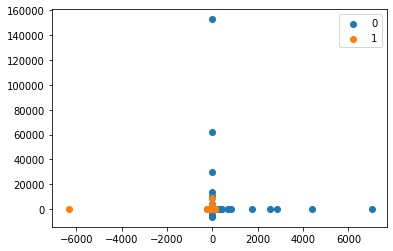

In [ ]:
#Before SMOTE
plot_dataset(meanxtrain, meanytrain)

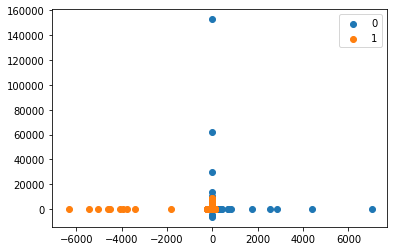

In [ ]:
#After SMOTE
plot_dataset(meanxtrain_sm, meanytrain_sm)

### Base Model -- With Mean Imputed Data Frame and SMOTE

In [ ]:
# Using Decision Tree
dtmean = DecisionTreeClassifier()


kf = KFold(n_splits=5,shuffle=True, random_state=33)
scoreTrain_dt = cross_val_score(estimator=dtmean, X=meanxtrain_sm, y=meanytrain_sm, scoring='accuracy', cv=kf)
print("Average Accuracy Score Train: ",np.mean(scoreTrain_dt))

kf = KFold(n_splits=3,shuffle=True, random_state=33)
scoreTest_dt = cross_val_score(estimator=dtmean, X=meanxtest_sm, y=meanytest_sm, scoring='accuracy', cv=kf)
print("Average Accuracy Score Test: ",np.mean(scoreTest_dt))

#The base model Accuracy itself is  high. With further feature engineering we can achieve even better results

Average Accuracy Score Train:  0.9419312181621498
Average Accuracy Score Test:  0.9184104632359067


In [ ]:
dtmean_model = dtmean.fit(meanxtrain_sm,meanytrain_sm)
dtmean_ypredtrain_sm = dtmean_model.predict(meanxtrain_sm)
print(confusion_matrix(meanytrain_sm, dtmean_ypredtrain_sm))
print("----------------")

print(classification_report(meanytrain_sm, dtmean_ypredtrain_sm))

[[33047     0]
 [    0 33047]]
----------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     33047
         1.0       1.00      1.00      1.00     33047

    accuracy                           1.00     66094
   macro avg       1.00      1.00      1.00     66094
weighted avg       1.00      1.00      1.00     66094



In [ ]:
#Using random Forest
RFmean = RandomForestClassifier()

kf = KFold(n_splits=5,shuffle=True, random_state=33)
scoreTrain_rf = cross_val_score(estimator=RFmean, X=meanxtrain_sm, y=meanytrain_sm, scoring='accuracy', cv=kf)
print("Average Accuracy Score Train: ",np.mean(scoreTrain_rf))

kf = KFold(n_splits=3,shuffle=True, random_state=33)
scoreTest_rf = cross_val_score(estimator=RFmean, X=meanxtest_sm, y=meanytest_sm, scoring='accuracy', cv=kf)
print("Average Accuracy Score Test: ",np.mean(scoreTest_rf))
#The base model Accuracy itself is very high. With further feature engineering we can achieve even better results

Average Accuracy Score Train:  0.9824038508787524
Average Accuracy Score Test:  0.9779846780468179


In [ ]:
rfmean_model = RFmean.fit(meanxtrain,meanytrain)
rfmean_ypredtrain = rfmean_model.predict(meanxtrain)
print(confusion_matrix(meanytrain, rfmean_ypredtrain))
print("----------------")

print(classification_report(meanytrain, rfmean_ypredtrain))

[[33047     0]
 [    0  1677]]
----------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     33047
         1.0       1.00      1.00      1.00      1677

    accuracy                           1.00     34724
   macro avg       1.00      1.00      1.00     34724
weighted avg       1.00      1.00      1.00     34724



In [ ]:
# Logistic Regression
lrmean = LogisticRegression() 

kf = KFold(n_splits=5,shuffle=True, random_state=33)
scoreTrain_lr = cross_val_score(estimator=lrmean, X=meanxtrain_sm, y=meanytrain_sm, scoring='accuracy', cv=kf)
print("Average Accuracy Score Train: ",np.mean(scoreTrain_lr))

kf = KFold(n_splits=3,shuffle=True, random_state=33)
scoreTest_lr = cross_val_score(estimator=lrmean, X=meanxtest_sm, y=meanytest_sm, scoring='accuracy', cv=kf)
print("Average Accuracy Score Test: ",np.mean(scoreTest_lr))

Average Accuracy Score Train:  0.6041699676404698
Average Accuracy Score Test:  0.6078986417366262


In [ ]:
lrmean_model = lrmean.fit(meanxtrain_sm,meanytrain_sm)
lrmean_ypredtrain_sm = lrmean_model.predict(meanxtrain_sm)
print(confusion_matrix(meanytrain_sm, lrmean_ypredtrain_sm))
print("----------------")

print(classification_report(meanytrain_sm, lrmean_ypredtrain_sm))

[[25803  7244]
 [18731 14316]]
----------------
              precision    recall  f1-score   support

         0.0       0.58      0.78      0.67     33047
         1.0       0.66      0.43      0.52     33047

    accuracy                           0.61     66094
   macro avg       0.62      0.61      0.59     66094
weighted avg       0.62      0.61      0.59     66094



## Base Model with MICE Imputed Dataframe and SMOTE

In [ ]:
newMICE_df1 =pd.read_csv("mice1.csv")
newMICE_df2 =pd.read_csv("mice2.csv")
newMICE_df3 =pd.read_csv("mice3.csv")
newMICE_df4 =pd.read_csv("mice4.csv")
newMICE_df5 =pd.read_csv("mice5.csv")
full_newMICE_df = pd.concat([newMICE_df1,newMICE_df2,newMICE_df3,newMICE_df4,newMICE_df5])
full_newMICE_df.shape

(43405, 63)

In [ ]:
X = full_newMICE_df.drop(['Unnamed: 0','class'],axis=1)
y = full_newMICE_df['class']
MICExtrain, MICExtest, MICEytrain, MICEytest = train_test_split(X,y ,test_size=0.2, random_state=10)
print(MICExtrain.shape, MICEytrain.shape, MICExtest.shape,MICEytest.shape)

(34724, 61) (34724,) (8681, 61) (8681,)


## SMOTE

# WITHOUT SMOTE ENTIRE DATA

In [ ]:
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
#REFER TO BELOW VARIABLES. 
#MEAN DF CSV HAS INDEX COLUMN : Unnamed: 0

In [ ]:
newMEAN_df1 = pd.read_csv("newMEAN_df1.csv")
newMEAN_df2 = pd.read_csv("newMEAN_df2.csv")
newMEAN_df3 = pd.read_csv("newMEAN_df3.csv")
newMEAN_df4 = pd.read_csv("newMEAN_df4.csv")
newMEAN_df5 = pd.read_csv("newMEAN_df5.csv")

MEAN_df_final=pd.concat([newMEAN_df1,newMEAN_df2,newMEAN_df3,newMEAN_df4,newMEAN_df5])
MEAN_df_final.drop(['Unnamed: 0', 'id'],axis=1,inplace=True)
MEAN_df_final.shape
X = MEAN_df_final.drop('class',axis=1)
y = MEAN_df_final['class']

In [ ]:
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
#REFER TO BELOW VARIABLES. 
#MEAN DF CSV HAS INDEX COLUMN : Unnamed: 0

In [ ]:
X = MEAN_df_final.drop('class',axis=1)
y = MEAN_df_final['class']
meanxtrain , meanxtest, meanytrain, meanytest = train_test_split(X,y, test_size=0.3, random_state=10)

lr = LogisticRegression()
mean_lrm = lr.fit(meanxtrain, meanytrain)

#Cross Val on Train Data
kf = KFold(n_splits=5,shuffle=True, random_state=33)
Mean_scoreTrain_lr = cross_val_score(estimator=lr, X=meanxtrain, y=meanytrain, scoring='accuracy', cv=kf)
print("Average Accuracy Score Train: ",np.mean(Mean_scoreTrain_lr))

# TEST DATA
ypredmean_test_lr = mean_lrm.predict(meanxtest)

print("Accuracy Score Test: ",accuracy_score(meanytest, ypredmean_test_lr))
print("Confusion matrix :\n",confusion_matrix(meanytest, ypredmean_test_lr))
print("Classification Report: \n",classification_report(meanytest, ypredmean_test_lr))

#Logistic Regression -Base Model Without SMOTE

Average Accuracy Score Train:  0.9491163922983983
Accuracy Score Test:  0.9510059898633082
Confusion matrix :
 [[12379    28]
 [  610     5]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     12407
         1.0       0.15      0.01      0.02       615

    accuracy                           0.95     13022
   macro avg       0.55      0.50      0.50     13022
weighted avg       0.92      0.95      0.93     13022



In [ ]:
X = MEAN_df_final.drop('class',axis=1)
y = MEAN_df_final['class']
meanxtrain , meanxtest, meanytrain, meanytest = train_test_split(X,y, test_size=0.3, random_state=10)

dt = DecisionTreeClassifier()
mean_dtm = dt.fit(meanxtrain, meanytrain)

#Cross Val on Train Data
kf = KFold(n_splits=5,shuffle=True, random_state=33)
Mean_scoreTrain_dt = cross_val_score(estimator=dt, X=meanxtrain, y=meanytrain, scoring='accuracy', cv=kf)
print("Average Accuracy Score Train: ",np.mean(Mean_scoreTrain_dt))

# TEST DATA
ypredmean_test_dt = mean_dtm.predict(meanxtest)

print("Accuracy Score Test: ",accuracy_score(meanytest, ypredmean_test_dt))
print("Confusion matrix :\n",confusion_matrix(meanytest, ypredmean_test_dt))
print("Classification Report: \n",classification_report(meanytest, ypredmean_test_dt))

#Decision -Base Model Without SMOTE

Average Accuracy Score Train:  0.9525392366971897
Accuracy Score Test:  0.9513131623406543
Confusion matrix :
 [[12064   343]
 [  291   324]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.98      0.97      0.97     12407
         1.0       0.49      0.53      0.51       615

    accuracy                           0.95     13022
   macro avg       0.73      0.75      0.74     13022
weighted avg       0.95      0.95      0.95     13022



In [ ]:
X = MEAN_df_final.drop('class',axis=1)
y = MEAN_df_final['class']
meanxtrain , meanxtest, meanytrain, meanytest = train_test_split(X,y, test_size=0.3,random_state=10)

rf = RandomForestClassifier()
mean_rfm = rf.fit(meanxtrain, meanytrain)

#Cross Val on Train Data
kf = KFold(n_splits=5,shuffle=True, random_state=33)
Mean_scoreTrain_rf = cross_val_score(estimator=rf, X=meanxtrain, y=meanytrain, scoring='accuracy', cv=kf)
print("Average Accuracy Score Train: ",np.mean(Mean_scoreTrain_rf))

# TEST DATA
ypredmean_test_rf = mean_rfm.predict(meanxtest)

print("Accuracy Score Test: ",accuracy_score(meanytest, ypredmean_test_rf))
print("Confusion matrix :\n",confusion_matrix(meanytest, ypredmean_test_rf))
print("Classification Report: \n",classification_report(meanytest, ypredmean_test_rf))

#random Forest -Base Model Without SMOTE

Average Accuracy Score Train:  0.9646184368846458
Accuracy Score Test:  0.9662878206112733
Confusion matrix :
 [[12373    34]
 [  405   210]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     12407
         1.0       0.86      0.34      0.49       615

    accuracy                           0.97     13022
   macro avg       0.91      0.67      0.74     13022
weighted avg       0.96      0.97      0.96     13022



In [ ]:
X = MEAN_df_final.drop('class',axis=1)
y = MEAN_df_final['class']
meanxtrain , meanxtest, meanytrain, meanytest = train_test_split(X,y, test_size=0.3,random_state=10)

gb = GradientBoostingClassifier()
mean_gbm = gb.fit(meanxtrain, meanytrain)

#Cross Val on Train Data
kf = KFold(n_splits=5,shuffle=True, random_state=33)
Mean_scoreTrain_gb = cross_val_score(estimator=gb, X=meanxtrain, y=meanytrain, scoring='accuracy', cv=kf)
print("Average Accuracy Score Train: ",np.mean(Mean_scoreTrain_gb))

# TEST DATA
ypredmean_test_gb = mean_gbm.predict(meanxtest)

print("Accuracy Score Test: ",accuracy_score(meanytest, ypredmean_test_gb))
print("Confusion matrix :\n",confusion_matrix(meanytest, ypredmean_test_gb))
print("Classification Report: \n",classification_report(meanytest, ypredmean_test_gb))

#A good Classification but can be improved. recall and F1 score to be improved. Better model needed

Average Accuracy Score Train:  0.9689630052682479
Accuracy Score Test:  0.9685916141913684
Confusion matrix :
 [[12370    37]
 [  372   243]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     12407
         1.0       0.87      0.40      0.54       615

    accuracy                           0.97     13022
   macro avg       0.92      0.70      0.76     13022
weighted avg       0.97      0.97      0.96     13022



In [ ]:
X = MEAN_df_final.drop('class',axis=1)
y = MEAN_df_final['class']
meanxtrain , meanxtest, meanytrain, meanytest = train_test_split(X,y, test_size=0.3,random_state=10)

ab = AdaBoostClassifier()
mean_abm = ab.fit(meanxtrain, meanytrain)

#Cross Val on Train Data
kf = KFold(n_splits=5,shuffle=True, random_state=33)
Mean_scoreTrain_ab = cross_val_score(estimator=ab, X=meanxtrain, y=meanytrain, scoring='accuracy', cv=kf)
print("Average Accuracy Score Train: ",np.mean(Mean_scoreTrain_ab))

# TEST DATA
ypredmean_test_ab = mean_abm.predict(meanxtest)

print("Accuracy Score Test: ",accuracy_score(meanytest, ypredmean_test_ab))
print("Confusion matrix :\n",confusion_matrix(meanytest, ypredmean_test_ab))
print("Classification Report: \n",classification_report(meanytest, ypredmean_test_ab))

#Slightly better than Random forest. but Classification eval metrics show poor results

Average Accuracy Score Train:  0.9539547174005572
Accuracy Score Test:  0.9553064045461527
Confusion matrix :
 [[12336    71]
 [  511   104]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     12407
         1.0       0.59      0.17      0.26       615

    accuracy                           0.96     13022
   macro avg       0.78      0.58      0.62     13022
weighted avg       0.94      0.96      0.94     13022



In [ ]:
X = MEAN_df_final.drop('class',axis=1)
y = MEAN_df_final['class']
meanxtrain , meanxtest, meanytrain, meanytest = train_test_split(X,y, test_size=0.3,random_state=10)

xb = XGBClassifier()
mean_xbm = xb.fit(meanxtrain, meanytrain)

#Cross Val on Train Data
kf = KFold(n_splits=5,shuffle=True, random_state=33)
Mean_scoreTrain_xb = cross_val_score(estimator=xb, X=meanxtrain, y=meanytrain, scoring='accuracy', cv=kf)
print("Average Accuracy Score Train: ",np.mean(Mean_scoreTrain_xb))

# TEST DATA
ypredmean_test_xb = mean_xbm.predict(meanxtest)

print("Accuracy Score Test: ",accuracy_score(meanytest, ypredmean_test_xb))
print("Confusion matrix :\n",confusion_matrix(meanytest, ypredmean_test_xb))
print("Classification Report: \n",classification_report(meanytest, ypredmean_test_xb))

#XGBoost  -Base Model Without SMOTE

Average Accuracy Score Train:  0.9697858392455911
Accuracy Score Test:  0.9710489940101367
Confusion matrix :
 [[12397    10]
 [  367   248]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     12407
         1.0       0.96      0.40      0.57       615

    accuracy                           0.97     13022
   macro avg       0.97      0.70      0.78     13022
weighted avg       0.97      0.97      0.97     13022



In [ ]:
#@title Default title text
# WITH SMOTE 

In [ ]:
sm = SMOTE()
X_sm , y_sm = sm.fit_resample(X,y)
meanxtrain_sm , meanxtest_sm, meanytrain_sm, meanytest_sm = train_test_split(X_sm,y_sm, test_size=0.3, random_state=10)

lr_sm = LogisticRegression()
mean_lrm_sm = lr_sm.fit(meanxtrain_sm, meanytrain_sm)

#Cross Val on Train Data
kf = KFold(n_splits=5,shuffle=True, random_state=33)
Mean_scoreTrain_lr_sm = cross_val_score(estimator=lr_sm, X=meanxtrain_sm, y=meanytrain_sm, scoring='accuracy', cv=kf)
print("Average Accuracy Score Train: ",np.mean(Mean_scoreTrain_lr_sm))

# TEST DATA
ypredmean_test_lr_sm = mean_lrm_sm.predict(meanxtest_sm)

print("Accuracy Score Test: ",accuracy_score(meanytest_sm, ypredmean_test_lr_sm))
print("Confusion matrix :\n",confusion_matrix(meanytest_sm, ypredmean_test_lr_sm))
print("Classification Report: \n",classification_report(meanytest_sm, ypredmean_test_lr_sm))

#Logistic regression  -Base Model With SMOTE

Average Accuracy Score Train:  0.6092080525260193
Accuracy Score Test:  0.6058332324821494
Confusion matrix :
 [[9550 2806]
 [6965 5468]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.58      0.77      0.66     12356
         1.0       0.66      0.44      0.53     12433

    accuracy                           0.61     24789
   macro avg       0.62      0.61      0.59     24789
weighted avg       0.62      0.61      0.59     24789



In [ ]:
sm = SMOTE()
X_sm , y_sm = sm.fit_resample(X,y)
meanxtrain_sm , meanxtest_sm, meanytrain_sm, meanytest_sm = train_test_split(X_sm,y_sm, test_size=0.3, random_state=10)

dt_sm = DecisionTreeClassifier()
mean_dtm_sm = dt_sm.fit(meanxtrain_sm, meanytrain_sm)

#Cross Val on Train Data
kf = KFold(n_splits=5,shuffle=True, random_state=33)
Mean_scoreTrain_dt_sm = cross_val_score(estimator=dt_sm, X=meanxtrain_sm, y=meanytrain_sm, scoring='accuracy', cv=kf)
print("Average Accuracy Score Train: ",np.mean(Mean_scoreTrain_dt_sm))

# TEST DATA
ypredmean_test_dt_sm = mean_dtm_sm.predict(meanxtest_sm)

print("Accuracy Score Test: ",accuracy_score(meanytest_sm, ypredmean_test_dt_sm))
print("Confusion matrix :\n",confusion_matrix(meanytest_sm, ypredmean_test_dt_sm))
print("Classification Report: \n",classification_report(meanytest_sm, ypredmean_test_dt_sm))

#Decision Tree  -Base Model With SMOTE

Average Accuracy Score Train:  0.9249295283800281
Accuracy Score Test:  0.9291217878897898
Confusion matrix :
 [[11354  1002]
 [  755 11678]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.94      0.92      0.93     12356
         1.0       0.92      0.94      0.93     12433

    accuracy                           0.93     24789
   macro avg       0.93      0.93      0.93     24789
weighted avg       0.93      0.93      0.93     24789



In [ ]:
sm = SMOTE()
X_sm , y_sm = sm.fit_resample(X,y)
meanxtrain_sm , meanxtest_sm, meanytrain_sm, meanytest_sm = train_test_split(X_sm,y_sm, test_size=0.3, random_state=10)

rf_sm = RandomForestClassifier()
mean_rfm_sm = rf_sm.fit(meanxtrain_sm, meanytrain_sm)

#Cross Val on Train Data
kf = KFold(n_splits=5,shuffle=True, random_state=33)
Mean_scoreTrain_rf_sm = cross_val_score(estimator=rf_sm, X=meanxtrain_sm, y=meanytrain_sm, scoring='accuracy', cv=kf)
print("Average Accuracy Score Train: ",np.mean(Mean_scoreTrain_rf_sm))

# TEST DATA
ypredmean_test_rf_sm = mean_rfm_sm.predict(meanxtest_sm)

print("Accuracy Score Test: ",accuracy_score(meanytest_sm, ypredmean_test_rf_sm))
print("Confusion matrix :\n",confusion_matrix(meanytest_sm, ypredmean_test_rf_sm))
print("Classification Report: \n",classification_report(meanytest_sm, ypredmean_test_rf_sm))

#Random Forest  -Base Model With SMOTE

Average Accuracy Score Train:  0.9762444261534309
Accuracy Score Test:  0.9787002299406995
Confusion matrix :
 [[11984   372]
 [  156 12277]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     12356
         1.0       0.97      0.99      0.98     12433

    accuracy                           0.98     24789
   macro avg       0.98      0.98      0.98     24789
weighted avg       0.98      0.98      0.98     24789



In [ ]:
sm = SMOTE()
X_sm , y_sm = sm.fit_resample(X,y)
meanxtrain_sm , meanxtest_sm, meanytrain_sm, meanytest_sm = train_test_split(X_sm,y_sm, test_size=0.3, random_state=10)

gb_sm = GradientBoostingClassifier()
mean_gbm_sm = gb_sm.fit(meanxtrain_sm, meanytrain_sm)

#Cross Val on Train Data
kf = KFold(n_splits=5,shuffle=True, random_state=33)
Mean_scoreTrain_gb_sm = cross_val_score(estimator=gb_sm, X=meanxtrain_sm, y=meanytrain_sm, scoring='accuracy', cv=kf)
print("Average Accuracy Score Train: ",np.mean(Mean_scoreTrain_gb_sm))

# TEST DATA
ypredmean_test_gb_sm = mean_gbm_sm.predict(meanxtest_sm)

print("Accuracy Score Test: ",accuracy_score(meanytest_sm, ypredmean_test_gb_sm))
print("Confusion matrix :\n",confusion_matrix(meanytest_sm, ypredmean_test_gb_sm))
print("Classification Report: \n",classification_report(meanytest_sm, ypredmean_test_gb_sm))

Average Accuracy Score Train:  0.9071388313034852
Accuracy Score Test:  0.9028197991044414
Confusion matrix :
 [[11118  1238]
 [ 1171 11262]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.90      0.90      0.90     12356
         1.0       0.90      0.91      0.90     12433

    accuracy                           0.90     24789
   macro avg       0.90      0.90      0.90     24789
weighted avg       0.90      0.90      0.90     24789



In [ ]:
sm = SMOTE()
X_sm , y_sm = sm.fit_resample(X,y)
meanxtrain_sm , meanxtest_sm, meanytrain_sm, meanytest_sm = train_test_split(X_sm,y_sm, test_size=0.3, random_state=10)

ab_sm = AdaBoostClassifier()
mean_abm_sm = ab_sm.fit(meanxtrain_sm, meanytrain_sm)

#Cross Val on Train Data
kf = KFold(n_splits=5,shuffle=True, random_state=33)
Mean_scoreTrain_ab_sm = cross_val_score(estimator=ab_sm, X=meanxtrain_sm, y=meanytrain_sm, scoring='accuracy', cv=kf)
print("Average Accuracy Score Train: ",np.mean(Mean_scoreTrain_ab_sm))

# TEST DATA
ypredmean_test_ab_sm = mean_abm_sm.predict(meanxtest_sm)

print("Accuracy Score Test: ",accuracy_score(meanytest_sm, ypredmean_test_ab_sm))
print("Confusion matrix :\n",confusion_matrix(meanytest_sm, ypredmean_test_ab_sm))
print("Classification Report: \n",classification_report(meanytest_sm, ypredmean_test_ab_sm))

Average Accuracy Score Train:  0.8478708581705886
Accuracy Score Test:  0.84218806728791
Confusion matrix :
 [[10433  1923]
 [ 1989 10444]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.84      0.84      0.84     12356
         1.0       0.84      0.84      0.84     12433

    accuracy                           0.84     24789
   macro avg       0.84      0.84      0.84     24789
weighted avg       0.84      0.84      0.84     24789



In [ ]:
sm = SMOTE()
X_sm , y_sm = sm.fit_resample(X,y)
meanxtrain_sm , meanxtest_sm, meanytrain_sm, meanytest_sm = train_test_split(X_sm,y_sm, test_size=0.3, random_state=10)

xg_sm = XGBClassifier()
mean_xgm_sm = xg_sm.fit(meanxtrain_sm, meanytrain_sm)

#Cross Val on Train Data
kf = KFold(n_splits=5,shuffle=True, random_state=33)
Mean_scoreTrain_xg_sm = cross_val_score(estimator=xg_sm, X=meanxtrain_sm, y=meanytrain_sm, scoring='accuracy', cv=kf)
print("Average Accuracy Score Train: ",np.mean(Mean_scoreTrain_xg_sm))

# TEST DATA
ypredmean_test_xg_sm = mean_xgm_sm.predict(meanxtest_sm)

print("Accuracy Score Test: ",accuracy_score(meanytest_sm, ypredmean_test_xg_sm))
print("Confusion matrix :\n",confusion_matrix(meanytest_sm, ypredmean_test_xg_sm))
print("Classification Report: \n",classification_report(meanytest_sm, ypredmean_test_xg_sm))

#XGBoost  -Base Model With SMOTE

Average Accuracy Score Train:  0.9065163290043537
Accuracy Score Test:  0.903182863366816
Confusion matrix :
 [[11183  1173]
 [ 1227 11206]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.90      0.91      0.90     12356
         1.0       0.91      0.90      0.90     12433

    accuracy                           0.90     24789
   macro avg       0.90      0.90      0.90     24789
weighted avg       0.90      0.90      0.90     24789



In [ ]:
#@title Default title text
#GridSearchCV

In [ ]:
# #Random Forest
# rf_sm_be=[]
# rf_sm_ve=[]
# for n in np.arange(1,300):
# rf_sm=RandomForestClassifier(n_estimators=n)
# kf = KFold(shuffle=True,n_splits=5,random_state=0)
# scores=cross_val_score(rf_sm,meanxtrain_sm, meanytrain_sm,cv=kf,scoring='f1')
# rf_sm_be.append(np.mean(1-scores))
# rf_sm_ve.append(np.std(scores,ddof=1))


In [ ]:
# xg = XGBClassifier()

# params = {'eval_metric':['error'],'eta':np.arange(0.18,0.23,0.01),'max_depth':[4,5,6,7,8,9,10,11,12],'n_estimators':np.arange(100,200,2)}
# grid_xg = GridSearchCV(estimator=xg,param_grid=params,scoring='f1')
# grid_model_xg = grid_xg.fit(meanxtrain_sm,meanytrain_sm)
# grid_model_xg.best_params_

# Approx. 45 minutes runtime.


# #Best parameters
# #{'eta': 0.21000000000000002, 'eval_metric': 'error','max_depth': 9,'n_estimators': 150}

In [ ]:
# rf = RandomForestClassifier()
# params = {'criterion':['gini','entropy'],'n_estimators':np.arange(90,200,5),'max_depth':[1,2,3,4,5,6,7]}
# grid_rf = GridSearchCV(estimator=rf,param_grid=params,scoring='recall')
# grid_model_rf = grid_rf.fit(meanxtrain_sm,meanytrain_sm)

# #Best parameters
# #{'criterion': 'gini', 'max_depth': 1, 'n_estimators': 100}

# USE THE ABOVE CODE FOR TUNNING. MORE PARAMETERS CAN BE ADDED FOR BETTER MODEL PERFORMANCE.

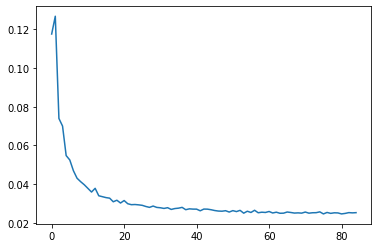

In [ ]:
#From the above manual gridsearch
x_axis=np.arange(len(rf_sm_be))
plt.plot(x_axis,rf_sm_be)

#Bias error with respect to estimators

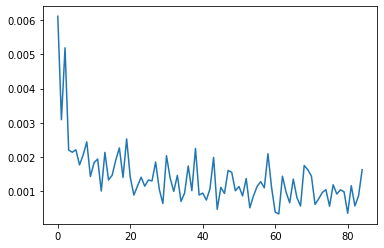

In [ ]:
x_axis=np.arange(len(rf_sm_ve))
plt.plot(x_axis,rf_sm_ve)

#Variance error with respect to estimators

In [ ]:
#bias , variance
(np.argmin(rf_sm_be),np.min(rf_sm_be)),(np.argmin(rf_sm_ve),np.min(rf_sm_ve))

((75, 0.024681228583598714), (61, 0.00033244785508940606))

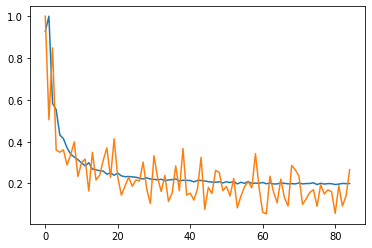

In [ ]:
#Partial  Scaling
rf_sm_be_sc =rf_sm_be/np.max(rf_sm_be)
rf_sm_ve_sc =rf_sm_ve/np.max(rf_sm_ve)
x_axis=np.arange(len(rf_sm_ve[:]))
plt.plot(x_axis,rf_sm_be_sc[:])
plt.plot(x_axis,rf_sm_ve_sc[:])

#Bias and Variance Error  -61 estimators

In [ ]:
# A tuned Random Forest Model ---- SMOTE DONE. and ALL FEATURES INCLUDED


MEAN_df_final=pd.concat([newMEAN_df1,newMEAN_df2,newMEAN_df3,newMEAN_df4,newMEAN_df5])
MEAN_df_final.drop(['Unnamed: 0', 'id'],axis=1,inplace=True)
MEAN_df_final.shape
X = MEAN_df_final.drop('class',axis=1)
y = MEAN_df_final['class']


sm = SMOTE()
X_sm, y_sm = sm.fit_resample(X,y)
meanxtrain_sm , meanxtest_sm, meanytrain_sm, meanytest_sm = train_test_split(X_sm,y_sm, test_size=0.3)

rf_sm_best = RandomForestClassifier(criterion='gini',n_estimators=61,bootstrap=True,max_features='auto')
rf_best_model = rf_sm_best.fit(meanxtrain_sm, meanytrain_sm)


ypredmean_train =rf_best_model.predict(meanxtrain_sm)
ypredmean_test = rf_best_model.predict(meanxtest_sm)
print("="*100)
#Train data
print(accuracy_score(meanytrain_sm, ypredmean_train))
print(confusion_matrix(meanytrain_sm, ypredmean_train))
print(classification_report(meanytrain_sm, ypredmean_train))

print("="*100)

#Test data
print(accuracy_score(meanytest_sm, ypredmean_test))
print(confusion_matrix(meanytest_sm, ypredmean_test))
print(classification_report(meanytest_sm, ypredmean_test))

print("="*100)


1.0
[[28806     0]
 [    0 29033]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     28806
         1.0       1.00      1.00      1.00     29033

    accuracy                           1.00     57839
   macro avg       1.00      1.00      1.00     57839
weighted avg       1.00      1.00      1.00     57839

0.9783371656783251
[[12131   377]
 [  160 12121]]
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     12508
         1.0       0.97      0.99      0.98     12281

    accuracy                           0.98     24789
   macro avg       0.98      0.98      0.98     24789
weighted avg       0.98      0.98      0.98     24789



In [ ]:
# A Tuned XGBOOST MODEL -- SMOTE Done and ALL  FEATURES USED. ---- 100% SMOTE

MEAN_df_final=pd.concat([newMEAN_df1,newMEAN_df2,newMEAN_df3,newMEAN_df4,newMEAN_df5])
MEAN_df_final.drop(['Unnamed: 0', 'id'],axis=1,inplace=True)
MEAN_df_final.shape
X = MEAN_df_final.drop('class',axis=1)
y = MEAN_df_final['class']

sm_xg = SMOTE()
X_sm, y_sm_xb = sm_xg.fit_resample(X,y)


X_sm_xb = pd.DataFrame(X_sm, columns=X.columns)


meanxtrain_sm_xg, meanxtest_sm_xg, meanytrain_sm_xg , meanytest_sm_xg = train_test_split(X_sm_xb, y_sm_xb, test_size=0.3)

xg_sm_best = XGBClassifier(n_estimators=150, eval_metric='error',eta=0.21000000000000002, max_depth=9)
xg_best_model = xg_sm_best.fit(meanxtrain_sm_xg, meanytrain_sm_xg)


ypredmean_train =xg_best_model.predict(meanxtrain_sm_xg)
ypredmean_test = xg_best_model.predict(meanxtest_sm_xg)
print("="*100)
#Train data
print(accuracy_score(meanytrain_sm_xg, ypredmean_train))
print(confusion_matrix(meanytrain_sm_xg, ypredmean_train))
print(classification_report(meanytrain_sm_xg, ypredmean_train))

print("="*100)

#Test data
print(accuracy_score(meanytest_sm_xg, ypredmean_test))
print(confusion_matrix(meanytest_sm_xg, ypredmean_test))
print(classification_report(meanytest_sm_xg, ypredmean_test))

print("="*100)


# A Tuned XGBOOST MODEL -- SMOTE Done and ALL  FEATURES USED. ---- 100% SMOTE

0.9998616850222168
[[28935     2]
 [    6 28896]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     28937
         1.0       1.00      1.00      1.00     28902

    accuracy                           1.00     57839
   macro avg       1.00      1.00      1.00     57839
weighted avg       1.00      1.00      1.00     57839

0.9912057767558191
[[12237   140]
 [   78 12334]]
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     12377
         1.0       0.99      0.99      0.99     12412

    accuracy                           0.99     24789
   macro avg       0.99      0.99      0.99     24789
weighted avg       0.99      0.99      0.99     24789



# Feature Engineering

## PCA

In [ ]:
#before feeding data to pca we need to do standard scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_sc=pd.DataFrame(sc.fit_transform(X),columns=X.columns)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA()
X_pca=pca.fit_transform(X_sc)
exp_var_pca = pca.explained_variance_ratio_


cum_sum_eigenvalues = np.cumsum(exp_var_pca)

In [ ]:
cum_sum_eigenvalues

array([0.16054899, 0.30501146, 0.38426055, 0.4609218 , 0.51463653,
       0.56527636, 0.61077116, 0.65163397, 0.68222989, 0.71137467,
       0.73614892, 0.75619915, 0.77560036, 0.79412511, 0.81114263,
       0.82756898, 0.84396228, 0.86032286, 0.87606511, 0.89167866,
       0.90676164, 0.91990009, 0.93262736, 0.94350671, 0.95411039,
       0.96428367, 0.97200723, 0.97835772, 0.98258282, 0.98537358,
       0.98776283, 0.9899412 , 0.9920273 , 0.99356742, 0.99480751,
       0.99580709, 0.99676503, 0.9974787 , 0.99817755, 0.99874545,
       0.99910942, 0.99937847, 0.99954267, 0.99965284, 0.99974242,
       0.99980491, 0.9998561 , 0.99990057, 0.99992674, 0.99994622,
       0.99996382, 0.99997737, 0.99998477, 0.99999073, 0.99999351,
       0.99999607, 0.99999751, 0.99999878, 1.        , 1.        ,
       1.        ])

In [ ]:
#30 features cover 98.5 % variance

In [ ]:
#therefor with pca=30
pca=PCA(n_components=30)
X_pca=pca.fit_transform(X_sc)

In [ ]:
y = full_newMEAN_df['class']
x_pca_train, x_pca_test, y_train, y_test = train_test_split(X_pca,y ,test_size=0.2, random_state=10)
print(x_pca_train.shape, x_pca_test.shape, y_train.shape, y_test.shape)

(34724, 30) (8681, 30) (34724,) (8681,)


In [ ]:
smote =SMOTETomek(random_state=10)
x_pca_train_sm, y_train_sm = smote.fit_resample(x_pca_train, y_train)
x_pca_test_sm, y_test_sm = smote.fit_resample(x_pca_test, y_test)

In [ ]:
# Using Decision Tree
dt_pca = DecisionTreeClassifier()


kf = KFold(n_splits=5,shuffle=True, random_state=33)
scoreTrain_dt_pca = cross_val_score(estimator=dt_pca, X=x_pca_train_sm, y=y_train_sm, scoring='accuracy', cv=kf)
print("Average Accuracy Score Train: ",np.mean(scoreTrain_dt_pca))

Average Accuracy Score Train:  0.9004201325645486


In [ ]:
dt_pca_model=dt_pca.fit(x_pca_train_sm,y_train_sm)
y_test_pred=dt_pca_model.predict(x_pca_test_sm)
accuracy_score(y_test_sm,y_test_pred)
print(confusion_matrix(y_test_sm,y_test_pred))
print(classification_report(y_test_sm,y_test_pred))

[[7269  930]
 [4412 3787]]
              precision    recall  f1-score   support

         0.0       0.62      0.89      0.73      8199
         1.0       0.80      0.46      0.59      8199

    accuracy                           0.67     16398
   macro avg       0.71      0.67      0.66     16398
weighted avg       0.71      0.67      0.66     16398



In [ ]:
#random forest

In [ ]:
rf_pca = RandomForestClassifier()


kf = KFold(n_splits=5,shuffle=True, random_state=33)
scoreTrain_rf_pca = cross_val_score(estimator=rf_pca, X=x_pca_train_sm, y=y_train_sm, scoring='accuracy', cv=kf)
print("Average Accuracy Score Train: ",np.mean(scoreTrain_rf_pca))

Average Accuracy Score Train:  0.9708810212500157


In [ ]:
rf_pca_model=rf_pca.fit(x_pca_train_sm,y_train_sm)
y_test_pred=rf_pca_model.predict(x_pca_test_sm)
accuracy_score(y_test_sm,y_test_pred)
print(confusion_matrix(y_test_sm,y_test_pred))
print(classification_report(y_test_sm,y_test_pred))

[[7917  282]
 [4744 3455]]
              precision    recall  f1-score   support

         0.0       0.63      0.97      0.76      8199
         1.0       0.92      0.42      0.58      8199

    accuracy                           0.69     16398
   macro avg       0.77      0.69      0.67     16398
weighted avg       0.77      0.69      0.67     16398



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_pca = LogisticRegression()


kf = KFold(n_splits=5,shuffle=True, random_state=33)
scoreTrain_lr_pca = cross_val_score(estimator=lr_pca, X=x_pca_train_sm, y=y_train_sm, scoring='accuracy', cv=kf)
print("Average Accuracy Score Train: ",np.mean(scoreTrain_lr_pca))

C:\Users\saksh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\saksh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Average Accuracy Score Train:  0.6654590543009107


C:\Users\saksh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
lr_pca_model=lr_pca.fit(x_pca_train_sm,y_train_sm)
y_test_pred=lr_pca_model.predict(x_pca_test_sm)
accuracy_score(y_test_sm,y_test_pred)
print(confusion_matrix(y_test_sm,y_test_pred))
print(classification_report(y_test_sm,y_test_pred))

[[5832 2367]
 [3429 4770]]
              precision    recall  f1-score   support

         0.0       0.63      0.71      0.67      8199
         1.0       0.67      0.58      0.62      8199

    accuracy                           0.65     16398
   macro avg       0.65      0.65      0.65     16398
weighted avg       0.65      0.65      0.65     16398



C:\Users\saksh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#no overfiitng but underfitting

In [ ]:
gb_pca = GradientBoostingClassifier()
kf = KFold(n_splits=5,shuffle=True, random_state=33)
scoreTrain_gb_pca = cross_val_score(estimator=gb_pca, X=x_pca_train_sm, y=y_train_sm, scoring='accuracy', cv=kf)
print("Average Accuracy Score Train: ",np.mean(scoreTrain_gb_pca))

Average Accuracy Score Train:  0.7947059777536127


In [ ]:
gb_pca_model=gb_pca.fit(x_pca_train_sm,y_train_sm)
y_test_pred=gb_pca_model.predict(x_pca_test_sm)
accuracy_score(y_test_sm,y_test_pred)
print(confusion_matrix(y_test_sm,y_test_pred))
print(classification_report(y_test_sm,y_test_pred))

[[6249 1950]
 [2268 5931]]
              precision    recall  f1-score   support

         0.0       0.73      0.76      0.75      8199
         1.0       0.75      0.72      0.74      8199

    accuracy                           0.74     16398
   macro avg       0.74      0.74      0.74     16398
weighted avg       0.74      0.74      0.74     16398



In [ ]:
ab_pca = AdaBoostClassifier()
kf = KFold(n_splits=5,shuffle=True, random_state=33)
scoreTrain_ab_pca = cross_val_score(estimator=ab_pca, X=x_pca_train_sm, y=y_train_sm, scoring='accuracy', cv=kf)
print("Average Accuracy Score Train: ",np.mean(scoreTrain_ab_pca))

Average Accuracy Score Train:  0.7455400220774872


In [ ]:
ab_pca_model=ab_pca.fit(x_pca_train_sm,y_train_sm)
y_test_pred=ab_pca_model.predict(x_pca_test_sm)
accuracy_score(y_test_sm,y_test_pred)
print(confusion_matrix(y_test_sm,y_test_pred))
print(classification_report(y_test_sm,y_test_pred))

[[6024 2175]
 [2489 5710]]
              precision    recall  f1-score   support

         0.0       0.71      0.73      0.72      8199
         1.0       0.72      0.70      0.71      8199

    accuracy                           0.72     16398
   macro avg       0.72      0.72      0.72     16398
weighted avg       0.72      0.72      0.72     16398



In [ ]:
xg_pca = XGBClassifier()
kf = KFold(n_splits=5,shuffle=True, random_state=33)
scoreTrain_xg_pca = cross_val_score(estimator=xg_pca, X=x_pca_train_sm, y=y_train_sm, scoring='accuracy', cv=kf)
print("Average Accuracy Score Train: ",np.mean(scoreTrain_xg_pca))

C:\Users\saksh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:50:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\saksh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:50:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\saksh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:50:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\saksh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:51:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\saksh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:51:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Average Accuracy Score Train:  0.9400420049157103


In [ ]:
xg_pca_model=xg_pca.fit(x_pca_train_sm,y_train_sm)
y_test_pred=xg_pca_model.predict(x_pca_test_sm)
accuracy_score(y_test_sm,y_test_pred)
print(confusion_matrix(y_test_sm,y_test_pred))
print(classification_report(y_test_sm,y_test_pred))

C:\Users\saksh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:51:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[7529  670]
 [3342 4857]]
              precision    recall  f1-score   support

         0.0       0.69      0.92      0.79      8199
         1.0       0.88      0.59      0.71      8199

    accuracy                           0.76     16398
   macro avg       0.79      0.76      0.75     16398
weighted avg       0.79      0.76      0.75     16398



In [ ]:
X=full_newMEAN_df.drop(['id','class'],1)

In [ ]:
pca=PCA()
X_pca=pca.fit_transform(X)
exp_var_pca = pca.explained_variance_ratio_


cum_sum_eigenvalues = np.cumsum(exp_var_pca)

In [ ]:
cum_sum_eigenvalues

array([0.60810852, 0.72497567, 0.83473255, 0.89264472, 0.93670999,
       0.97112464, 0.98466967, 0.99642216, 0.99935867, 0.99981377,
       0.99990978, 0.99995776, 0.99998045, 0.99998805, 0.99999171,
       0.9999951 , 0.99999668, 0.99999792, 0.99999864, 0.99999913,
       0.99999931, 0.99999949, 0.99999962, 0.99999973, 0.9999998 ,
       0.99999987, 0.99999991, 0.99999994, 0.99999996, 0.99999997,
       0.99999998, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

In [ ]:
#therefor with pca=30
pca=PCA(n_components=10)
X_pca=pca.fit_transform(X)

In [ ]:
y = full_newMEAN_df['class']
x_pca_train, x_pca_test, y_train, y_test = train_test_split(X_pca,y ,test_size=0.2, random_state=10)
print(x_pca_train.shape, x_pca_test.shape, y_train.shape, y_test.shape)

(34724, 10) (8681, 10) (34724,) (8681,)


In [ ]:
smote =SMOTETomek(random_state=10)
x_pca_train_sm, y_train_sm = smote.fit_resample(x_pca_train, y_train)
x_pca_test_sm, y_test_sm = smote.fit_resample(x_pca_test, y_test)

In [ ]:
# Using Decision Tree
dt_pca = DecisionTreeClassifier()


kf = KFold(n_splits=5,shuffle=True, random_state=33)
scoreTrain_dt_pca = cross_val_score(estimator=dt_pca, X=x_pca_train_sm, y=y_train_sm, scoring='accuracy', cv=kf)
print("Average Accuracy Score Train: ",np.mean(scoreTrain_dt_pca))

Average Accuracy Score Train:  0.9031939515506867


In [ ]:
dt_pca_model=dt_pca.fit(x_pca_train_sm,y_train_sm)
y_test_pred=dt_pca_model.predict(x_pca_test_sm)
accuracy_score(y_test_sm,y_test_pred)
print(confusion_matrix(y_test_sm,y_test_pred))
print(classification_report(y_test_sm,y_test_pred))

[[7214  881]
 [3282 4813]]
              precision    recall  f1-score   support

         0.0       0.69      0.89      0.78      8095
         1.0       0.85      0.59      0.70      8095

    accuracy                           0.74     16190
   macro avg       0.77      0.74      0.74     16190
weighted avg       0.77      0.74      0.74     16190



In [ ]:
rf_pca = RandomForestClassifier()


kf = KFold(n_splits=5,shuffle=True, random_state=33)
scoreTrain_rf_pca = cross_val_score(estimator=rf_pca, X=x_pca_train_sm, y=y_train_sm, scoring='accuracy', cv=kf)
print("Average Accuracy Score Train: ",np.mean(scoreTrain_rf_pca))

Average Accuracy Score Train:  0.9563184693720105


In [ ]:
rf_pca_model=rf_pca.fit(x_pca_train_sm,y_train_sm)
y_test_pred=rf_pca_model.predict(x_pca_test_sm)
accuracy_score(y_test_sm,y_test_pred)
print(confusion_matrix(y_test_sm,y_test_pred))
print(classification_report(y_test_sm,y_test_pred))

[[7661  434]
 [3128 4967]]
              precision    recall  f1-score   support

         0.0       0.71      0.95      0.81      8095
         1.0       0.92      0.61      0.74      8095

    accuracy                           0.78     16190
   macro avg       0.81      0.78      0.77     16190
weighted avg       0.81      0.78      0.77     16190



In [ ]:
lr_pca = LogisticRegression()


kf = KFold(n_splits=5,shuffle=True, random_state=33)
scoreTrain_lr_pca = cross_val_score(estimator=lr_pca, X=x_pca_train_sm, y=y_train_sm, scoring='accuracy', cv=kf)
print("Average Accuracy Score Train: ",np.mean(scoreTrain_lr_pca))

Average Accuracy Score Train:  0.559774726122512


In [ ]:
lr_pca_model=lr_pca.fit(x_pca_train_sm,y_train_sm)
y_test_pred=lr_pca_model.predict(x_pca_test_sm)
accuracy_score(y_test_sm,y_test_pred)
print(confusion_matrix(y_test_sm,y_test_pred))
print(classification_report(y_test_sm,y_test_pred))

[[1527 6568]
 [ 520 7575]]
              precision    recall  f1-score   support

         0.0       0.75      0.19      0.30      8095
         1.0       0.54      0.94      0.68      8095

    accuracy                           0.56     16190
   macro avg       0.64      0.56      0.49     16190
weighted avg       0.64      0.56      0.49     16190



In [ ]:
gb_pca = GradientBoostingClassifier()
kf = KFold(n_splits=5,shuffle=True, random_state=33)
scoreTrain_gb_pca = cross_val_score(estimator=gb_pca, X=x_pca_train_sm, y=y_train_sm, scoring='accuracy', cv=kf)
print("Average Accuracy Score Train: ",np.mean(scoreTrain_gb_pca))

Average Accuracy Score Train:  0.8069433729362754


In [ ]:
gb_pca_model=gb_pca.fit(x_pca_train_sm,y_train_sm)
y_test_pred=gb_pca_model.predict(x_pca_test_sm)
accuracy_score(y_test_sm,y_test_pred)
print(confusion_matrix(y_test_sm,y_test_pred))
print(classification_report(y_test_sm,y_test_pred))

[[6464 1631]
 [1798 6297]]
              precision    recall  f1-score   support

         0.0       0.78      0.80      0.79      8095
         1.0       0.79      0.78      0.79      8095

    accuracy                           0.79     16190
   macro avg       0.79      0.79      0.79     16190
weighted avg       0.79      0.79      0.79     16190



In [ ]:
ab_pca = AdaBoostClassifier()
kf = KFold(n_splits=5,shuffle=True, random_state=33)
scoreTrain_ab_pca = cross_val_score(estimator=ab_pca, X=x_pca_train_sm, y=y_train_sm, scoring='accuracy', cv=kf)
print("Average Accuracy Score Train: ",np.mean(scoreTrain_ab_pca))

Average Accuracy Score Train:  0.7717173275729055


In [ ]:
ab_pca_model=ab_pca.fit(x_pca_train_sm,y_train_sm)
y_test_pred=ab_pca_model.predict(x_pca_test_sm)
accuracy_score(y_test_sm,y_test_pred)
print(confusion_matrix(y_test_sm,y_test_pred))
print(classification_report(y_test_sm,y_test_pred))

[[6351 1744]
 [2017 6078]]
              precision    recall  f1-score   support

         0.0       0.76      0.78      0.77      8095
         1.0       0.78      0.75      0.76      8095

    accuracy                           0.77     16190
   macro avg       0.77      0.77      0.77     16190
weighted avg       0.77      0.77      0.77     16190



In [ ]:
xg_pca = XGBClassifier()
kf = KFold(n_splits=5,shuffle=True, random_state=33)
scoreTrain_xg_pca = cross_val_score(estimator=xg_pca, X=x_pca_train_sm, y=y_train_sm, scoring='accuracy', cv=kf)
print("Average Accuracy Score Train: ",np.mean(scoreTrain_xg_pca))

C:\Users\saksh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:58:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\saksh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:59:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\saksh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:59:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\saksh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:59:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\saksh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:59:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Average Accuracy Score Train:  0.9229285604073445


In [ ]:
xg_pca_model=xg_pca.fit(x_pca_train_sm,y_train_sm)
y_test_pred=xg_pca_model.predict(x_pca_test_sm)
accuracy_score(y_test_sm,y_test_pred)
print(confusion_matrix(y_test_sm,y_test_pred))
print(classification_report(y_test_sm,y_test_pred))

C:\Users\saksh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:59:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[7385  710]
 [2079 6016]]
              precision    recall  f1-score   support

         0.0       0.78      0.91      0.84      8095
         1.0       0.89      0.74      0.81      8095

    accuracy                           0.83     16190
   macro avg       0.84      0.83      0.83     16190
weighted avg       0.84      0.83      0.83     16190



In [ ]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=26)
dt_model=dt.fit(xtrain, ytrain)
y_pred_dt_smote_test = dt_model.predict(xtest)
y_pred_dt_smote_train = dt_model.predict(xtrain)

In [ ]:
print('confusion_matrix: ')
print(confusion_matrix(ytrain,y_pred_dt_smote_train))
print('classification_report: ')
print(classification_report(ytrain,y_pred_dt_smote_train))
print('accuracy_score: ')
print(accuracy_score(ytrain,y_pred_dt_smote_train))

confusion_matrix: 
[[28388     3]
 [    0 28115]]
classification_report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     28391
         1.0       1.00      1.00      1.00     28115

    accuracy                           1.00     56506
   macro avg       1.00      1.00      1.00     56506
weighted avg       1.00      1.00      1.00     56506

accuracy_score: 
0.9999469082929247


In [ ]:
print('confusion_matrix: ')
print(confusion_matrix(ytest,y_pred_dt_smote_test))
print('classification_report: ')
print(classification_report(ytest,y_pred_dt_smote_test))
print('accuracy_score: ')
print(accuracy_score(ytest,y_pred_dt_smote_test))

confusion_matrix: 
[[10951  1020]
 [  735 11512]]
classification_report: 
              precision    recall  f1-score   support

         0.0       0.94      0.91      0.93     11971
         1.0       0.92      0.94      0.93     12247

    accuracy                           0.93     24218
   macro avg       0.93      0.93      0.93     24218
weighted avg       0.93      0.93      0.93     24218

accuracy_score: 
0.9275332397390371


In [ ]:
rf = RandomForestClassifier()
rf_model=rf.fit(xtrain, ytrain)
y_pred_rf_smote_test = rf_model.predict(xtest)
y_pred_rf_smote_train = rf_model.predict(xtrain)

In [ ]:
a=pd.DataFrame()
a['feature']=xtrain.columns
a['importance']=rf_model.feature_importances_
a.sort_values('importance',ascending=False).head()

,feature,importance
19,Attr27,0.158134
18,Attr6,0.080104
9,Attr26,0.049556
17,Attr24,0.046985
29,Attr46,0.039965


In [ ]:
print('confusion_matrix: ')
print(confusion_matrix(ytrain,y_pred_rf_smote_train))
print('classification_report: ')
print(classification_report(ytrain,y_pred_rf_smote_train))
print('accuracy_score: ')
print(accuracy_score(ytrain,y_pred_rf_smote_train))

confusion_matrix: 
[[28391     0]
 [    1 28114]]
classification_report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     28391
         1.0       1.00      1.00      1.00     28115

    accuracy                           1.00     56506
   macro avg       1.00      1.00      1.00     56506
weighted avg       1.00      1.00      1.00     56506

accuracy_score: 
0.9999823027643082


In [ ]:
print('confusion_matrix: ')
print(confusion_matrix(ytest,y_pred_rf_smote_test))
print('classification_report: ')
print(classification_report(ytest,y_pred_rf_smote_test))
print('accuracy_score: ')
print(accuracy_score(ytest,y_pred_rf_smote_test))

confusion_matrix: 
[[11561   410]
 [  184 12063]]
classification_report: 
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97     11971
         1.0       0.97      0.98      0.98     12247

    accuracy                           0.98     24218
   macro avg       0.98      0.98      0.98     24218
weighted avg       0.98      0.98      0.98     24218

accuracy_score: 
0.975472788834751


In [ ]:
score=cross_val_score(estimator=rf,X=xtrain,y=ytrain,cv=5,scoring='accuracy')
print(np.mean(score))
print(np.std(score))

0.9709765099409505
0.00210921502212009


In [ ]:
# grid={'criterion':['entropy', 'gini'],
# 'n_estimators':[50, 75, 100],
# 'max_depth':[10, 20, 30]}

# rf=RandomForestClassifier(random_state=10)
# grid_cv=GridSearchCV(estimator=rf,param_grid=grid,cv=5,scoring='accuracy')
# grid_model=grid_cv.fit(xtrain,ytrain)
# grid_model.best_params_

In [ ]:
rf = RandomForestClassifier(criterion='entropy',max_depth=30,n_estimators=100)
rf_model=rf.fit(xtrain, ytrain)
y_pred_rf_smote_test = rf_model.predict(xtest)
y_pred_rf_smote_train = rf_model.predict(xtrain)

In [ ]:
print('confusion_matrix: ')
print(confusion_matrix(ytrain,y_pred_rf_smote_train))
print('classification_report: ')
print(classification_report(ytrain,y_pred_rf_smote_train))
print('accuracy_score: ')
print(accuracy_score(ytrain,y_pred_rf_smote_train))

confusion_matrix: 
[[28391     0]
 [    0 28115]]
classification_report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     28391
         1.0       1.00      1.00      1.00     28115

    accuracy                           1.00     56506
   macro avg       1.00      1.00      1.00     56506
weighted avg       1.00      1.00      1.00     56506

accuracy_score: 
1.0


In [ ]:
print('confusion_matrix: ')
print(confusion_matrix(ytest,y_pred_rf_smote_test))
print('classification_report: ')
print(classification_report(ytest,y_pred_rf_smote_test))
print('accuracy_score: ')
print(accuracy_score(ytest,y_pred_rf_smote_test))

confusion_matrix: 
[[11569   402]
 [  158 12089]]
classification_report: 
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     11971
         1.0       0.97      0.99      0.98     12247

    accuracy                           0.98     24218
   macro avg       0.98      0.98      0.98     24218
weighted avg       0.98      0.98      0.98     24218

accuracy_score: 
0.9768767032785531


In [ ]:
lr=LogisticRegression()
lr_model=lr.fit(xtrain, ytrain)
y_pred_lr_smote_test = lr_model.predict(xtest)
y_pred_lr_smote_train = lr_model.predict(xtrain)

In [ ]:
# a=pd.DataFrame()
# a['feature']=xtrain.columns
# a['importance']=lr_model.get_params
# a.sort_values('importance',ascending=False).head()

In [ ]:
print('confusion_matrix: ')
print(confusion_matrix(ytrain,y_pred_lr_smote_train))
print('classification_report: ')
print(classification_report(ytrain,y_pred_lr_smote_train))
print('accuracy_score: ')
print(accuracy_score(ytrain,y_pred_lr_smote_train))

confusion_matrix: 
[[20941  7450]
 [14628 13487]]
classification_report: 
              precision    recall  f1-score   support

         0.0       0.59      0.74      0.65     28391
         1.0       0.64      0.48      0.55     28115

    accuracy                           0.61     56506
   macro avg       0.62      0.61      0.60     56506
weighted avg       0.62      0.61      0.60     56506

accuracy_score: 
0.609280430396772


In [ ]:
print('confusion_matrix: ')
print(confusion_matrix(ytest,y_pred_lr_smote_test))
print('classification_report: ')
print(classification_report(ytest,y_pred_lr_smote_test))
print('accuracy_score: ')
print(accuracy_score(ytest,y_pred_lr_smote_test))

confusion_matrix: 
[[8907 3064]
 [6263 5984]]
classification_report: 
              precision    recall  f1-score   support

         0.0       0.59      0.74      0.66     11971
         1.0       0.66      0.49      0.56     12247

    accuracy                           0.61     24218
   macro avg       0.62      0.62      0.61     24218
weighted avg       0.62      0.61      0.61     24218

accuracy_score: 
0.6148732347840449


In [ ]:
score=cross_val_score(estimator=LogisticRegression(),X=xtrain,y=ytrain,cv=5,scoring='accuracy')
print(np.mean(score))
print(score)
print(np.std(score))

0.6117225983277585
[0.61458149 0.59976993 0.60516768 0.61056544 0.62852845]
0.009775295687655998


In [ ]:
ada=AdaBoostClassifier()
ada_model=ada.fit(xtrain,ytrain)
y_pred_ada_smote_test = ada_model.predict(xtest)
y_pred_ada_smote_train = ada_model.predict(xtrain)

In [ ]:
print('confusion_matrix: ')
print(confusion_matrix(ytrain,y_pred_ada_smote_train))
print('classification_report: ')
print(classification_report(ytrain,y_pred_ada_smote_train))
print('accuracy_score: ')
print(accuracy_score(ytrain,y_pred_ada_smote_train))

confusion_matrix: 
[[23915  4476]
 [ 4692 23423]]
classification_report: 
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84     28391
         1.0       0.84      0.83      0.84     28115

    accuracy                           0.84     56506
   macro avg       0.84      0.84      0.84     56506
weighted avg       0.84      0.84      0.84     56506

accuracy_score: 
0.8377517431777156


In [ ]:
print('confusion_matrix: ')
print(confusion_matrix(ytest,y_pred_ada_smote_test))
print('classification_report: ')
print(classification_report(ytest,y_pred_ada_smote_test))
print('accuracy_score: ')
print(accuracy_score(ytest,y_pred_ada_smote_test))

confusion_matrix: 
[[10105  1866]
 [ 2084 10163]]
classification_report: 
              precision    recall  f1-score   support

         0.0       0.83      0.84      0.84     11971
         1.0       0.84      0.83      0.84     12247

    accuracy                           0.84     24218
   macro avg       0.84      0.84      0.84     24218
weighted avg       0.84      0.84      0.84     24218

accuracy_score: 
0.8368981749112231


In [ ]:
score=cross_val_score(estimator=ada,X=xtrain,y=ytrain,cv=5,scoring='accuracy')
print(np.mean(score))

0.8358758378678409


In [ ]:
gradi=GradientBoostingClassifier()
gboost_model=gradi.fit(xtrain,ytrain)
y_pred_gb_smote_test = gboost_model.predict(xtest)
y_pred_gb_smote_train = gboost_model.predict(xtrain)

In [ ]:
print('confusion_matrix: ')
print(confusion_matrix(ytrain,y_pred_gb_smote_train))
print('classification_report: ')
print(classification_report(ytrain,y_pred_gb_smote_train))
print('accuracy_score: ')
print(accuracy_score(ytrain,y_pred_gb_smote_train))

confusion_matrix: 
[[25524  2867]
 [ 2801 25314]]
classification_report: 
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90     28391
         1.0       0.90      0.90      0.90     28115

    accuracy                           0.90     56506
   macro avg       0.90      0.90      0.90     56506
weighted avg       0.90      0.90      0.90     56506

accuracy_score: 
0.899692068098963


In [ ]:
print('confusion_matrix: ')
print(confusion_matrix(ytest,y_pred_gb_smote_test))
print('classification_report: ')
print(classification_report(ytest,y_pred_gb_smote_test))
print('accuracy_score: ')
print(accuracy_score(ytest,y_pred_gb_smote_test))

confusion_matrix: 
[[10723  1248]
 [ 1266 10981]]
classification_report: 
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90     11971
         1.0       0.90      0.90      0.90     12247

    accuracy                           0.90     24218
   macro avg       0.90      0.90      0.90     24218
weighted avg       0.90      0.90      0.90     24218

accuracy_score: 
0.896192914361219


In [ ]:
score=cross_val_score(estimator=gradi,X=xtrain,y=ytrain,cv=5,scoring='accuracy')
print(np.mean(score))

0.8930909314060888


In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb_model=xgb.fit(xtrain,ytrain)
y_pred_xgb_smote_test = xgb_model.predict(xtest)
y_pred_xgb_smote_train = xgb_model.predict(xtrain)

[11:13:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
a=pd.DataFrame()
a['feature']=xtrain.columns
a['importance']=xgb_model.feature_importances_
a.sort_values('importance',ascending=False).head()

,feature,importance
18,Attr6,0.154635
19,Attr27,0.108566
9,Attr26,0.100955
22,Attr39,0.049659
21,Attr38,0.037503


In [ ]:
print('confusion_matrix: ')
print(confusion_matrix(ytrain,y_pred_xgb_smote_train))
print('classification_report: ')
print(classification_report(ytrain,y_pred_xgb_smote_train))
print('accuracy_score: ')
print(accuracy_score(ytrain,y_pred_xgb_smote_train))

confusion_matrix: 
[[28323    68]
 [   94 28021]]
classification_report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     28391
         1.0       1.00      1.00      1.00     28115

    accuracy                           1.00     56506
   macro avg       1.00      1.00      1.00     56506
weighted avg       1.00      1.00      1.00     56506

accuracy_score: 
0.9971330478179309


In [ ]:
print('confusion_matrix: ')
print(confusion_matrix(ytest,y_pred_xgb_smote_test))
print('classification_report: ')
print(classification_report(ytest,y_pred_xgb_smote_test))
print('accuracy_score: ')
print(accuracy_score(ytest,y_pred_xgb_smote_test))

confusion_matrix: 
[[11718   253]
 [  182 12065]]
classification_report: 
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     11971
         1.0       0.98      0.99      0.98     12247

    accuracy                           0.98     24218
   macro avg       0.98      0.98      0.98     24218
weighted avg       0.98      0.98      0.98     24218

accuracy_score: 
0.9820381534395903


In [ ]:
score=cross_val_score(estimator=xgb,X=xtrain,y=ytrain,cv=5,scoring='accuracy')
print(np.mean(score))
print(score)
print(np.std(score))

[11:13:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:14:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:14:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:14:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier(gamma=2,learning_rate=0.15,max_depth=6,n_estimators=150)
xgb_model=xgb.fit(xtrain,ytrain)
y_pred_xgb_smote_test = xgb_model.predict(xtest)
y_pred_xgb_smote_train = xgb_model.predict(xtrain)

[11:14:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
print('confusion_matrix: ')
print(confusion_matrix(ytrain,y_pred_xgb_smote_train))
print('classification_report: ')
print(classification_report(ytrain,y_pred_xgb_smote_train))
print('accuracy_score: ')
print(accuracy_score(ytrain,y_pred_xgb_smote_train))

confusion_matrix: 
[[28246   145]
 [  142 27973]]
classification_report: 
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     28391
         1.0       0.99      0.99      0.99     28115

    accuracy                           0.99     56506
   macro avg       0.99      0.99      0.99     56506
weighted avg       0.99      0.99      0.99     56506

accuracy_score: 
0.9949208933564577


In [ ]:
print('confusion_matrix: ')
print(confusion_matrix(ytest,y_pred_xgb_smote_test))
print('classification_report: ')
print(classification_report(ytest,y_pred_xgb_smote_test))
print('accuracy_score: ')
print(accuracy_score(ytest,y_pred_xgb_smote_test))

confusion_matrix: 
[[11685   286]
 [  209 12038]]
classification_report: 
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     11971
         1.0       0.98      0.98      0.98     12247

    accuracy                           0.98     24218
   macro avg       0.98      0.98      0.98     24218
weighted avg       0.98      0.98      0.98     24218

accuracy_score: 
0.9795606573622925


# smote tomek 32 features

In [ ]:
x=MEAN_df_ML2.drop(['class','Attr36'],1)
y=MEAN_df_ML2['class']

smote = SMOTETomek(random_state = 100)
xsmt, ysmt = smote.fit_resample(x,y)

In [ ]:
print('Before SMOTE ' , Counter(y))
print('After SMOTE ' , Counter(ysmt))

Before SMOTE  Counter({0.0: 41314, 1.0: 2091})
After SMOTE  Counter({0.0: 40362, 1.0: 40362})


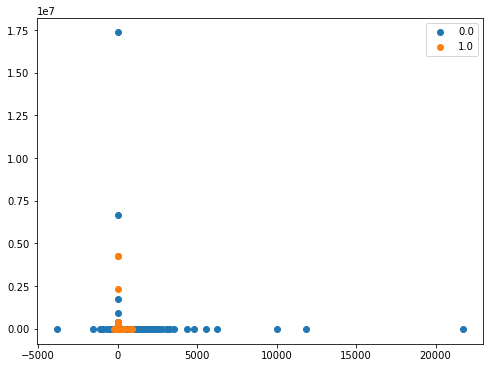

In [ ]:
plot_dataset(x, y)
plt.show()

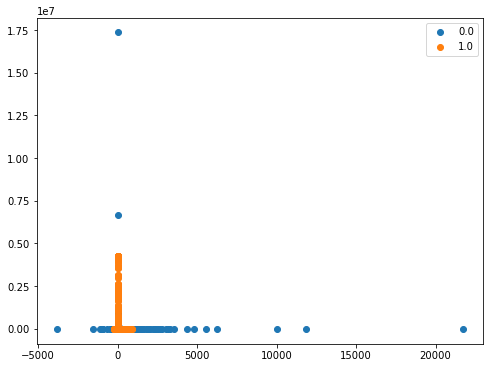

In [ ]:
plot_dataset(xsmt, ysmt)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold
xtrain, xtest, ytrain, ytest = train_test_split(xsmt, ysmt, test_size = .30, random_state=14)

In [ ]:
xtrain.columns

Index(['Attr13', 'Attr33', 'Attr28', 'Attr32', 'Attr45', 'Attr35', 'Attr54',
       'Attr17', 'Attr55', 'Attr26', 'Attr15', 'Attr40', 'Attr23', 'Attr1',
       'Attr61', 'Attr2', 'Attr57', 'Attr24', 'Attr6', 'Attr27', 'Attr59',
       'Attr38', 'Attr39', 'Attr42', 'Attr5', 'Attr30', 'Attr41', 'Attr60',
       'Attr29', 'Attr46', 'Attr18'],
      dtype='object')

In [ ]:
for j in xsm.columns:
    t,p = stats.mannwhitneyu(xtrain[j],xsm[j])
    t1,p1 = stats.mannwhitneyu(xtrain[j],xtest[j])
    if p<0.05:
        print(" ------ for Feature {} xtrain and xsm data is different p. values is {} ".format(j,p))
    if p1<0.05:
        print(" ------ for Feature {} xtrain and xtest data is different. p values is {}".format(j,p1))
    if (p>0.05 and p1>0.05):
        print("for Feature {}, no difference in train, test and original data. p values is {} {}".format(j,p1.round(3),p.round(3)))

for Feature Attr13, no difference in train, test and original data. p values is 0.255 0.136
for Feature Attr33, no difference in train, test and original data. p values is 0.449 0.236
for Feature Attr28, no difference in train, test and original data. p values is 0.328 0.472
for Feature Attr32, no difference in train, test and original data. p values is 0.487 0.229
for Feature Attr45, no difference in train, test and original data. p values is 0.175 0.098
for Feature Attr35, no difference in train, test and original data. p values is 0.388 0.283
for Feature Attr54, no difference in train, test and original data. p values is 0.444 0.405
for Feature Attr17, no difference in train, test and original data. p values is 0.223 0.082
for Feature Attr55, no difference in train, test and original data. p values is 0.413 0.339
for Feature Attr26, no difference in train, test and original data. p values is 0.193 0.097
for Feature Attr15, no difference in train, test and original data. p values is 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [ ]:
dt = DecisionTreeClassifier()
dt_model=dt.fit(xtrain, ytrain)
y_pred_dt_smote_test = dt_model.predict(xtest)
y_pred_dt_smote_train = dt_model.predict(xtrain)

In [ ]:
print('confusion_matrix: ')
print(confusion_matrix(ytrain,y_pred_dt_smote_train))
print('classification_report: ')
print(classification_report(ytrain,y_pred_dt_smote_train))
print('accuracy_score: ')
print(accuracy_score(ytrain,y_pred_dt_smote_train))

confusion_matrix: 
[[28391     0]
 [    0 28115]]
classification_report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     28391
         1.0       1.00      1.00      1.00     28115

    accuracy                           1.00     56506
   macro avg       1.00      1.00      1.00     56506
weighted avg       1.00      1.00      1.00     56506

accuracy_score: 
1.0


In [ ]:
print('confusion_matrix: ')
print(confusion_matrix(ytest,y_pred_dt_smote_test))
print('classification_report: ')
print(classification_report(ytest,y_pred_dt_smote_test))
print('accuracy_score: ')
print(accuracy_score(ytest,y_pred_dt_smote_test))

confusion_matrix: 
[[10848  1123]
 [  733 11514]]
classification_report: 
              precision    recall  f1-score   support

         0.0       0.94      0.91      0.92     11971
         1.0       0.91      0.94      0.93     12247

    accuracy                           0.92     24218
   macro avg       0.92      0.92      0.92     24218
weighted avg       0.92      0.92      0.92     24218

accuracy_score: 
0.923362788008919


In [ ]:
score=cross_val_score(estimator=DecisionTreeClassifier(),X=xtrain,y=ytrain,cv=5,scoring='accuracy')
print(np.mean(score))
print(np.std(score))

0.9147347173906416
0.0019592825435707827


In [ ]:
a=pd.DataFrame()
a['feature']=xtrain.columns
a['importance']=dt_model.feature_importances_
a.sort_values('importance',ascending=False).head()

,feature,importance
18,Attr6,0.181341
19,Attr27,0.175168
9,Attr26,0.063100
28,Attr29,0.061027
29,Attr46,0.060799


In [ ]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=26)
dt_model=dt.fit(xtrain, ytrain)
y_pred_dt_smote_test = dt_model.predict(xtest)
y_pred_dt_smote_train = dt_model.predict(xtrain)

In [ ]:
print('confusion_matrix: ')
print(confusion_matrix(ytrain,y_pred_dt_smote_train))
print('classification_report: ')
print(classification_report(ytrain,y_pred_dt_smote_train))
print('accuracy_score: ')
print(accuracy_score(ytrain,y_pred_dt_smote_train))

confusion_matrix: 
[[28388     3]
 [    0 28115]]
classification_report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     28391
         1.0       1.00      1.00      1.00     28115

    accuracy                           1.00     56506
   macro avg       1.00      1.00      1.00     56506
weighted avg       1.00      1.00      1.00     56506

accuracy_score: 
0.9999469082929247


In [ ]:
print('confusion_matrix: ')
print(confusion_matrix(ytest,y_pred_dt_smote_test))
print('classification_report: ')
print(classification_report(ytest,y_pred_dt_smote_test))
print('accuracy_score: ')
print(accuracy_score(ytest,y_pred_dt_smote_test))

confusion_matrix: 
[[10951  1020]
 [  735 11512]]
classification_report: 
              precision    recall  f1-score   support

         0.0       0.94      0.91      0.93     11971
         1.0       0.92      0.94      0.93     12247

    accuracy                           0.93     24218
   macro avg       0.93      0.93      0.93     24218
weighted avg       0.93      0.93      0.93     24218

accuracy_score: 
0.9275332397390371


In [ ]:
rf = RandomForestClassifier()
rf_model=rf.fit(xtrain, ytrain)
y_pred_rf_smote_test = rf_model.predict(xtest)
y_pred_rf_smote_train = rf_model.predict(xtrain)

In [ ]:
a=pd.DataFrame()
a['feature']=xtrain.columns
a['importance']=rf_model.feature_importances_
a.sort_values('importance',ascending=False).head()

,feature,importance
19,Attr27,0.158134
18,Attr6,0.080104
9,Attr26,0.049556
17,Attr24,0.046985
29,Attr46,0.039965


In [ ]:
print('confusion_matrix: ')
print(confusion_matrix(ytrain,y_pred_rf_smote_train))
print('classification_report: ')
print(classification_report(ytrain,y_pred_rf_smote_train))
print('accuracy_score: ')
print(accuracy_score(ytrain,y_pred_rf_smote_train))

confusion_matrix: 
[[28391     0]
 [    1 28114]]
classification_report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     28391
         1.0       1.00      1.00      1.00     28115

    accuracy                           1.00     56506
   macro avg       1.00      1.00      1.00     56506
weighted avg       1.00      1.00      1.00     56506

accuracy_score: 
0.9999823027643082


In [ ]:
print('confusion_matrix: ')
print(confusion_matrix(ytest,y_pred_rf_smote_test))
print('classification_report: ')
print(classification_report(ytest,y_pred_rf_smote_test))
print('accuracy_score: ')
print(accuracy_score(ytest,y_pred_rf_smote_test))

confusion_matrix: 
[[11561   410]
 [  184 12063]]
classification_report: 
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97     11971
         1.0       0.97      0.98      0.98     12247

    accuracy                           0.98     24218
   macro avg       0.98      0.98      0.98     24218
weighted avg       0.98      0.98      0.98     24218

accuracy_score: 
0.975472788834751


In [ ]:
score=cross_val_score(estimator=rf,X=xtrain,y=ytrain,cv=5,scoring='accuracy')
print(np.mean(score))
print(np.std(score))

0.9709765099409505
0.00210921502212009


In [ ]:
# grid={'criterion':['entropy', 'gini'],
# 'n_estimators':[50, 75, 100],
# 'max_depth':[10, 20, 30]}

# rf=RandomForestClassifier(random_state=10)
# grid_cv=GridSearchCV(estimator=rf,param_grid=grid,cv=5,scoring='accuracy')
# grid_model=grid_cv.fit(xtrain,ytrain)
# grid_model.best_params_

In [ ]:
rf = RandomForestClassifier(criterion='entropy',max_depth=30,n_estimators=100)
rf_model=rf.fit(xtrain, ytrain)
y_pred_rf_smote_test = rf_model.predict(xtest)
y_pred_rf_smote_train = rf_model.predict(xtrain)

In [ ]:
print('confusion_matrix: ')
print(confusion_matrix(ytrain,y_pred_rf_smote_train))
print('classification_report: ')
print(classification_report(ytrain,y_pred_rf_smote_train))
print('accuracy_score: ')
print(accuracy_score(ytrain,y_pred_rf_smote_train))

confusion_matrix: 
[[28391     0]
 [    0 28115]]
classification_report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     28391
         1.0       1.00      1.00      1.00     28115

    accuracy                           1.00     56506
   macro avg       1.00      1.00      1.00     56506
weighted avg       1.00      1.00      1.00     56506

accuracy_score: 
1.0


In [ ]:
print('confusion_matrix: ')
print(confusion_matrix(ytest,y_pred_rf_smote_test))
print('classification_report: ')
print(classification_report(ytest,y_pred_rf_smote_test))
print('accuracy_score: ')
print(accuracy_score(ytest,y_pred_rf_smote_test))

confusion_matrix: 
[[11569   402]
 [  158 12089]]
classification_report: 
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     11971
         1.0       0.97      0.99      0.98     12247

    accuracy                           0.98     24218
   macro avg       0.98      0.98      0.98     24218
weighted avg       0.98      0.98      0.98     24218

accuracy_score: 
0.9768767032785531


In [ ]:
lr=LogisticRegression()
lr_model=lr.fit(xtrain, ytrain)
y_pred_lr_smote_test = lr_model.predict(xtest)
y_pred_lr_smote_train = lr_model.predict(xtrain)

In [ ]:
# a=pd.DataFrame()
# a['feature']=xtrain.columns
# a['importance']=lr_model.get_params
# a.sort_values('importance',ascending=False).head()

In [ ]:
print('confusion_matrix: ')
print(confusion_matrix(ytrain,y_pred_lr_smote_train))
print('classification_report: ')
print(classification_report(ytrain,y_pred_lr_smote_train))
print('accuracy_score: ')
print(accuracy_score(ytrain,y_pred_lr_smote_train))

confusion_matrix: 
[[20941  7450]
 [14628 13487]]
classification_report: 
              precision    recall  f1-score   support

         0.0       0.59      0.74      0.65     28391
         1.0       0.64      0.48      0.55     28115

    accuracy                           0.61     56506
   macro avg       0.62      0.61      0.60     56506
weighted avg       0.62      0.61      0.60     56506

accuracy_score: 
0.609280430396772


In [ ]:
print('confusion_matrix: ')
print(confusion_matrix(ytest,y_pred_lr_smote_test))
print('classification_report: ')
print(classification_report(ytest,y_pred_lr_smote_test))
print('accuracy_score: ')
print(accuracy_score(ytest,y_pred_lr_smote_test))

confusion_matrix: 
[[8907 3064]
 [6263 5984]]
classification_report: 
              precision    recall  f1-score   support

         0.0       0.59      0.74      0.66     11971
         1.0       0.66      0.49      0.56     12247

    accuracy                           0.61     24218
   macro avg       0.62      0.62      0.61     24218
weighted avg       0.62      0.61      0.61     24218

accuracy_score: 
0.6148732347840449


In [ ]:
score=cross_val_score(estimator=LogisticRegression(),X=xtrain,y=ytrain,cv=5,scoring='accuracy')
print(np.mean(score))
print(score)
print(np.std(score))

0.6117225983277585
[0.61458149 0.59976993 0.60516768 0.61056544 0.62852845]
0.009775295687655998


In [ ]:
ada=AdaBoostClassifier()
ada_model=ada.fit(xtrain,ytrain)
y_pred_ada_smote_test = ada_model.predict(xtest)
y_pred_ada_smote_train = ada_model.predict(xtrain)

In [ ]:
print('confusion_matrix: ')
print(confusion_matrix(ytrain,y_pred_ada_smote_train))
print('classification_report: ')
print(classification_report(ytrain,y_pred_ada_smote_train))
print('accuracy_score: ')
print(accuracy_score(ytrain,y_pred_ada_smote_train))

confusion_matrix: 
[[23915  4476]
 [ 4692 23423]]
classification_report: 
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84     28391
         1.0       0.84      0.83      0.84     28115

    accuracy                           0.84     56506
   macro avg       0.84      0.84      0.84     56506
weighted avg       0.84      0.84      0.84     56506

accuracy_score: 
0.8377517431777156


In [ ]:
print('confusion_matrix: ')
print(confusion_matrix(ytest,y_pred_ada_smote_test))
print('classification_report: ')
print(classification_report(ytest,y_pred_ada_smote_test))
print('accuracy_score: ')
print(accuracy_score(ytest,y_pred_ada_smote_test))

confusion_matrix: 
[[10105  1866]
 [ 2084 10163]]
classification_report: 
              precision    recall  f1-score   support

         0.0       0.83      0.84      0.84     11971
         1.0       0.84      0.83      0.84     12247

    accuracy                           0.84     24218
   macro avg       0.84      0.84      0.84     24218
weighted avg       0.84      0.84      0.84     24218

accuracy_score: 
0.8368981749112231


In [ ]:
score=cross_val_score(estimator=ada,X=xtrain,y=ytrain,cv=5,scoring='accuracy')
print(np.mean(score))

0.8358758378678409


In [ ]:
gradi=GradientBoostingClassifier()
gboost_model=gradi.fit(xtrain,ytrain)
y_pred_gb_smote_test = gboost_model.predict(xtest)
y_pred_gb_smote_train = gboost_model.predict(xtrain)

In [ ]:
print('confusion_matrix: ')
print(confusion_matrix(ytrain,y_pred_gb_smote_train))
print('classification_report: ')
print(classification_report(ytrain,y_pred_gb_smote_train))
print('accuracy_score: ')
print(accuracy_score(ytrain,y_pred_gb_smote_train))

confusion_matrix: 
[[25524  2867]
 [ 2801 25314]]
classification_report: 
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90     28391
         1.0       0.90      0.90      0.90     28115

    accuracy                           0.90     56506
   macro avg       0.90      0.90      0.90     56506
weighted avg       0.90      0.90      0.90     56506

accuracy_score: 
0.899692068098963


In [ ]:
print('confusion_matrix: ')
print(confusion_matrix(ytest,y_pred_gb_smote_test))
print('classification_report: ')
print(classification_report(ytest,y_pred_gb_smote_test))
print('accuracy_score: ')
print(accuracy_score(ytest,y_pred_gb_smote_test))

confusion_matrix: 
[[10723  1248]
 [ 1266 10981]]
classification_report: 
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90     11971
         1.0       0.90      0.90      0.90     12247

    accuracy                           0.90     24218
   macro avg       0.90      0.90      0.90     24218
weighted avg       0.90      0.90      0.90     24218

accuracy_score: 
0.896192914361219


In [ ]:
score=cross_val_score(estimator=gradi,X=xtrain,y=ytrain,cv=5,scoring='accuracy')
print(np.mean(score))

0.8930909314060888


In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb_model=xgb.fit(xtrain,ytrain)
y_pred_xgb_smote_test = xgb_model.predict(xtest)
y_pred_xgb_smote_train = xgb_model.predict(xtrain)

[11:13:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
a=pd.DataFrame()
a['feature']=xtrain.columns
a['importance']=xgb_model.feature_importances_
a.sort_values('importance',ascending=False).head()

,feature,importance
18,Attr6,0.154635
19,Attr27,0.108566
9,Attr26,0.100955
22,Attr39,0.049659
21,Attr38,0.037503


In [ ]:
print('confusion_matrix: ')
print(confusion_matrix(ytrain,y_pred_xgb_smote_train))
print('classification_report: ')
print(classification_report(ytrain,y_pred_xgb_smote_train))
print('accuracy_score: ')
print(accuracy_score(ytrain,y_pred_xgb_smote_train))

confusion_matrix: 
[[28323    68]
 [   94 28021]]
classification_report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     28391
         1.0       1.00      1.00      1.00     28115

    accuracy                           1.00     56506
   macro avg       1.00      1.00      1.00     56506
weighted avg       1.00      1.00      1.00     56506

accuracy_score: 
0.9971330478179309


In [ ]:
print('confusion_matrix: ')
print(confusion_matrix(ytest,y_pred_xgb_smote_test))
print('classification_report: ')
print(classification_report(ytest,y_pred_xgb_smote_test))
print('accuracy_score: ')
print(accuracy_score(ytest,y_pred_xgb_smote_test))

confusion_matrix: 
[[11718   253]
 [  182 12065]]
classification_report: 
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     11971
         1.0       0.98      0.99      0.98     12247

    accuracy                           0.98     24218
   macro avg       0.98      0.98      0.98     24218
weighted avg       0.98      0.98      0.98     24218

accuracy_score: 
0.9820381534395903


In [ ]:
score=cross_val_score(estimator=xgb,X=xtrain,y=ytrain,cv=5,scoring='accuracy')
print(np.mean(score))
print(score)
print(np.std(score))

[11:13:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:14:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:14:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:14:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier(gamma=2,learning_rate=0.15,max_depth=6,n_estimators=150)
xgb_model=xgb.fit(xtrain,ytrain)
y_pred_xgb_smote_test = xgb_model.predict(xtest)
y_pred_xgb_smote_train = xgb_model.predict(xtrain)

[11:14:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
print('confusion_matrix: ')
print(confusion_matrix(ytrain,y_pred_xgb_smote_train))
print('classification_report: ')
print(classification_report(ytrain,y_pred_xgb_smote_train))
print('accuracy_score: ')
print(accuracy_score(ytrain,y_pred_xgb_smote_train))

confusion_matrix: 
[[28246   145]
 [  142 27973]]
classification_report: 
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     28391
         1.0       0.99      0.99      0.99     28115

    accuracy                           0.99     56506
   macro avg       0.99      0.99      0.99     56506
weighted avg       0.99      0.99      0.99     56506

accuracy_score: 
0.9949208933564577


In [ ]:
print('confusion_matrix: ')
print(confusion_matrix(ytest,y_pred_xgb_smote_test))
print('classification_report: ')
print(classification_report(ytest,y_pred_xgb_smote_test))
print('accuracy_score: ')
print(accuracy_score(ytest,y_pred_xgb_smote_test))

confusion_matrix: 
[[11685   286]
 [  209 12038]]
classification_report: 
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     11971
         1.0       0.98      0.98      0.98     12247

    accuracy                           0.98     24218
   macro avg       0.98      0.98      0.98     24218
weighted avg       0.98      0.98      0.98     24218

accuracy_score: 
0.9795606573622925


In [ ]:
#Feature Importance from tuned random forest model
important_features = pd.DataFrame({'Features': X.columns, 
                                   'Importance': rf_best_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
imp_feat25 = important_features.sort_values('Importance', ascending = False).head(25)
imp_feat25

,Features,Importance
25,Attr27,0.129037
5,Attr6,0.066123
32,Attr34,0.038779
22,Attr24,0.033618
24,Attr26,0.028365
43,Attr46,0.027751
54,Attr58,0.026584
33,Attr35,0.024753
15,Attr16,0.024447
36,Attr39,0.023912


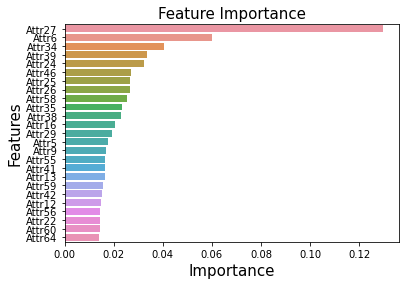

<Figure size 1440x1440 with 0 Axes>

In [ ]:
important_features = pd.DataFrame({'Features': X.columns, 
                                   'Importance': rf_best_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
imp_feat25 = important_features.sort_values('Importance', ascending = False).head(25)
top25_feat = list(imp_feat25['Features'])

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = imp_feat25)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.figure(figsize=(20,20))
# display the plot
plt.show()

In [ ]:
# A tuned Random Forest Model ---- SMOTE DONE. and TOP 25 FEATURES BASED ON Feature importance


MEAN_df_final=pd.concat([newMEAN_df1,newMEAN_df2,newMEAN_df3,newMEAN_df4,newMEAN_df5])
MEAN_df_final.drop(['Unnamed: 0', 'id'],axis=1,inplace=True)
MEAN_df_final.shape
X = MEAN_df_final.drop('class',axis=1)
y = MEAN_df_final['class']

imp_feat25 = important_features.sort_values('Importance', ascending = False).head(25)
top25_feat = list(imp_feat25['Features'])
X_25 = X[top25_feat]


sm = SMOTE()
X_sm, y_sm = sm.fit_resample(X_25,y)
meanxtrain_sm , meanxtest_sm, meanytrain_sm, meanytest_sm = train_test_split(X_sm,y_sm, test_size=0.3)

rf_sm_best = RandomForestClassifier(criterion='gini',n_estimators=61,bootstrap=True,max_features='auto')
rf_best_model = rf_sm_best.fit(meanxtrain_sm, meanytrain_sm)


ypredmean_train =rf_best_model.predict(meanxtrain_sm)
ypredmean_test = rf_best_model.predict(meanxtest_sm)
print("="*100)
#Train data
print(accuracy_score(meanytrain_sm, ypredmean_train))
print(confusion_matrix(meanytrain_sm, ypredmean_train))
print(classification_report(meanytrain_sm, ypredmean_train))

print("="*100)

#Test data
print(accuracy_score(meanytest_sm, ypredmean_test))
print(confusion_matrix(meanytest_sm, ypredmean_test))
print(classification_report(meanytest_sm, ypredmean_test))

print("="*100)



#The model is slightly overfit -


# A tuned Random Forest Model ---- SMOTE DONE. and TOP 25 FEATURES BASED ON Feature importance

0.9999827106277771
[[28916     1]
 [    0 28922]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     28917
         1.0       1.00      1.00      1.00     28922

    accuracy                           1.00     57839
   macro avg       1.00      1.00      1.00     57839
weighted avg       1.00      1.00      1.00     57839

0.9736980112146517
[[11938   459]
 [  193 12199]]
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97     12397
         1.0       0.96      0.98      0.97     12392

    accuracy                           0.97     24789
   macro avg       0.97      0.97      0.97     24789
weighted avg       0.97      0.97      0.97     24789



In [ ]:
# A tuned Random Forest Model ---- SMOTE DONE. and TOP 35 FEATURES BASED ON Feature importance


MEAN_df_final=pd.concat([newMEAN_df1,newMEAN_df2,newMEAN_df3,newMEAN_df4,newMEAN_df5])
MEAN_df_final.drop(['Unnamed: 0', 'id'],axis=1,inplace=True)
MEAN_df_final.shape
X = MEAN_df_final.drop('class',axis=1)
y = MEAN_df_final['class']

imp_feat35 = important_features.sort_values('Importance', ascending = False).head(35)
top35_feat = list(imp_feat25['Features'])
X_35 = X[top35_feat]


sm = SMOTE()
X_sm, y_sm = sm.fit_resample(X_35,y)
meanxtrain_sm , meanxtest_sm, meanytrain_sm, meanytest_sm = train_test_split(X_sm,y_sm, test_size=0.3)

rf_sm_best = RandomForestClassifier(criterion='gini',n_estimators=61,bootstrap=True,max_features='auto')
rf_best_model = rf_sm_best.fit(meanxtrain_sm, meanytrain_sm)


ypredmean_train =rf_best_model.predict(meanxtrain_sm)
ypredmean_test = rf_best_model.predict(meanxtest_sm)
print("="*100)
#Train data
print(accuracy_score(meanytrain_sm, ypredmean_train))
print(confusion_matrix(meanytrain_sm, ypredmean_train))
print(classification_report(meanytrain_sm, ypredmean_train))

print("="*100)

#Test data
print(accuracy_score(meanytest_sm, ypredmean_test))
print(confusion_matrix(meanytest_sm, ypredmean_test))
print(classification_report(meanytest_sm, ypredmean_test))

print("="*100)



#The model is slightly overfit -
#MOdel can be tunned Further.

# A tuned Random Forest Model ---- SMOTE DONE. and TOP 35 FEATURES BASED ON Feature importance

1.0
[[28920     0]
 [    0 28919]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     28920
         1.0       1.00      1.00      1.00     28919

    accuracy                           1.00     57839
   macro avg       1.00      1.00      1.00     57839
weighted avg       1.00      1.00      1.00     57839

0.9757553753681069
[[11951   443]
 [  158 12237]]
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98     12394
         1.0       0.97      0.99      0.98     12395

    accuracy                           0.98     24789
   macro avg       0.98      0.98      0.98     24789
weighted avg       0.98      0.98      0.98     24789



In [ ]:
# A Tuned XGBOOST MODEL -- SMOTE Done and TOP 25  FEATURES USED. ---- 100% SMOTE

MEAN_df_final=pd.concat([newMEAN_df1,newMEAN_df2,newMEAN_df3,newMEAN_df4,newMEAN_df5])
MEAN_df_final.drop(['Unnamed: 0', 'id'],axis=1,inplace=True)
MEAN_df_final.shape
X = MEAN_df_final.drop('class',axis=1)
y = MEAN_df_final['class']

imp_feat25 = important_features.sort_values('Importance', ascending = False).head(25)
top25_feat = list(imp_feat25['Features'])
X_25 = X[top25_feat]

sm_xg = SMOTE()
X_sm, y_sm_xb = sm_xg.fit_resample(X_25,y)


X_sm_xb = pd.DataFrame(X_sm, columns=X_25.columns)


meanxtrain_sm_xg, meanxtest_sm_xg, meanytrain_sm_xg , meanytest_sm_xg = train_test_split(X_sm_xb, y_sm_xb, test_size=0.3)

xg_sm_best = XGBClassifier(n_estimators=150, eval_metric='error',eta=0.21000000000000002, max_depth=9)
xg_best_model = xg_sm_best.fit(meanxtrain_sm_xg, meanytrain_sm_xg)


ypredmean_train =xg_best_model.predict(meanxtrain_sm_xg)
ypredmean_test = xg_best_model.predict(meanxtest_sm_xg)
print("="*100)
#Train data
print(accuracy_score(meanytrain_sm_xg, ypredmean_train))
print(confusion_matrix(meanytrain_sm_xg, ypredmean_train))
print(classification_report(meanytrain_sm_xg, ypredmean_train))

print("="*100)

#Test data
print(accuracy_score(meanytest_sm_xg, ypredmean_test))
print(confusion_matrix(meanytest_sm_xg, ypredmean_test))
print(classification_report(meanytest_sm_xg, ypredmean_test))

print("="*100)



# A Tuned XGBOOST MODEL -- SMOTE Done and TOP 25  FEATURES USED. ---- 100% SMOTE

0.9995504763222047
[[28925    14]
 [   12 28888]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     28939
         1.0       1.00      1.00      1.00     28900

    accuracy                           1.00     57839
   macro avg       1.00      1.00      1.00     57839
weighted avg       1.00      1.00      1.00     57839

0.9795473798862399
[[12031   344]
 [  163 12251]]
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     12375
         1.0       0.97      0.99      0.98     12414

    accuracy                           0.98     24789
   macro avg       0.98      0.98      0.98     24789
weighted avg       0.98      0.98      0.98     24789



In [ ]:
# A Tuned XGBOOST MODEL -- SMOTE Done and TOP 25  FEATURES USED. ---- 33% SMOTE

MEAN_df_final=pd.concat([newMEAN_df1,newMEAN_df2,newMEAN_df3,newMEAN_df4,newMEAN_df5])
MEAN_df_final.drop(['Unnamed: 0', 'id'],axis=1,inplace=True)
MEAN_df_final.shape
X = MEAN_df_final.drop('class',axis=1)
y = MEAN_df_final['class']

imp_feat25 = important_features.sort_values('Importance', ascending = False).head(25)
top25_feat = list(imp_feat25['Features'])
X_25 = X[top25_feat]

sm_xg = SMOTE(sampling_strategy=0.33)
X_sm, y_sm_xb = sm_xg.fit_resample(X_25,y)


X_sm_xb = pd.DataFrame(X_sm, columns=X_25.columns)


meanxtrain_sm_xg, meanxtest_sm_xg, meanytrain_sm_xg , meanytest_sm_xg = train_test_split(X_sm_xb, y_sm_xb, test_size=0.3)

xg_sm_best = XGBClassifier(n_estimators=150, eval_metric='error',eta=0.21000000000000002, max_depth=9)
xg_best_model = xg_sm_best.fit(meanxtrain_sm_xg, meanytrain_sm_xg)


ypredmean_train =xg_best_model.predict(meanxtrain_sm_xg)
ypredmean_test = xg_best_model.predict(meanxtest_sm_xg)
print("="*100)
#Train data
print(accuracy_score(meanytrain_sm_xg, ypredmean_train))
print(confusion_matrix(meanytrain_sm_xg, ypredmean_train))
print(classification_report(meanytrain_sm_xg, ypredmean_train))

print("="*100)

#Test data
print(accuracy_score(meanytest_sm_xg, ypredmean_test))
print(confusion_matrix(meanytest_sm_xg, ypredmean_test))
print(classification_report(meanytest_sm_xg, ypredmean_test))

print("="*100)


0.9991680099838802
[[28954     0]
 [   32  9476]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     28954
         1.0       1.00      1.00      1.00      9508

    accuracy                           1.00     38462
   macro avg       1.00      1.00      1.00     38462
weighted avg       1.00      1.00      1.00     38462

0.9726417955717319
[[12230   130]
 [  321  3804]]
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     12360
         1.0       0.97      0.92      0.94      4125

    accuracy                           0.97     16485
   macro avg       0.97      0.96      0.96     16485
weighted avg       0.97      0.97      0.97     16485



In [ ]:
# A Tuned XGBOOST MODEL -- SMOTE Done and  ALL  FEATURES USED. ---- 32% SMOTE

MEAN_df_final=pd.concat([newMEAN_df1,newMEAN_df2,newMEAN_df3,newMEAN_df4,newMEAN_df5])
MEAN_df_final.drop(['Unnamed: 0', 'id'],axis=1,inplace=True)
MEAN_df_final.shape
X = MEAN_df_final.drop('class',axis=1)
y = MEAN_df_final['class']

imp_feat25 = important_features.sort_values('Importance', ascending = False).head(25)
top25_feat = list(imp_feat25['Features'])


sm_xg = SMOTE(sampling_strategy=0.32)
X_sm, y_sm_xb = sm_xg.fit_resample(X,y)


X_sm_xb = pd.DataFrame(X_sm, columns=X.columns)


meanxtrain_sm_xg, meanxtest_sm_xg, meanytrain_sm_xg , meanytest_sm_xg = train_test_split(X_sm_xb, y_sm_xb, test_size=0.3)

xg_sm_best = XGBClassifier(n_estimators=150, eval_metric='error',eta=0.21000000000000002, max_depth=9)
xg_best_model = xg_sm_best.fit(meanxtrain_sm_xg, meanytrain_sm_xg)


ypredmean_train =xg_best_model.predict(meanxtrain_sm_xg)
ypredmean_test = xg_best_model.predict(meanxtest_sm_xg)
print("="*100)
#Train data
print(accuracy_score(meanytrain_sm_xg, ypredmean_train))
print(confusion_matrix(meanytrain_sm_xg, ypredmean_train))
print(classification_report(meanytrain_sm_xg, ypredmean_train))

print("="*100)

#Test data
print(accuracy_score(meanytest_sm_xg, ypredmean_test))
print(confusion_matrix(meanytest_sm_xg, ypredmean_test))
print(classification_report(meanytest_sm_xg, ypredmean_test))

print("="*100)




# A Tuned XGBOOST MODEL -- SMOTE Done and  ALL  FEATURES USED. ---- 32% SMOTE

0.9997118382102533
[[28976     0]
 [   11  9186]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     28976
         1.0       1.00      1.00      1.00      9197

    accuracy                           1.00     38173
   macro avg       1.00      1.00      1.00     38173
weighted avg       1.00      1.00      1.00     38173

0.9800745675692195
[[12275    63]
 [  263  3760]]
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     12338
         1.0       0.98      0.93      0.96      4023

    accuracy                           0.98     16361
   macro avg       0.98      0.96      0.97     16361
weighted avg       0.98      0.98      0.98     16361



--MODEL--BiasError--VarianceError
--RandomForest : 0.16221663181507784 -- 0.0039828460120194505 
--GradientBoost : 0.11496882571224609 -- 0.007257292395521322 
--XGBoost : 0.07843318812431528 -- 0.004453034022803722 


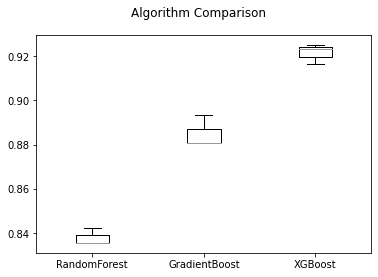

In [ ]:
#MODEL PERFORMANCE ---- XTRAIN Data . ALL FEATURES INCLUDED

#Add Model with parameters here


xg_sm_best = XGBClassifier(n_estimators=150, eval_metric='error',eta=0.21000000000000002, max_depth=9)
rf_sm_best = RandomForestClassifier(criterion='gini',n_estimators=61,bootstrap=True,max_features='auto')


gb_sm_best = GradientBoostingClassifier(n_estimators=75,max_depth=9) 

MEAN_df_final=pd.concat([newMEAN_df1,newMEAN_df2,newMEAN_df3,newMEAN_df4,newMEAN_df5])
MEAN_df_final.drop(['Unnamed: 0', 'id'],axis=1,inplace=True)
MEAN_df_final.shape
X = MEAN_df_final.drop('class',axis=1)
y = MEAN_df_final['class']

imp_feat25 = important_features.sort_values('Importance', ascending = False).head(25)
top25_feat = list(imp_feat25['Features'])

#SMOTE
sm_xg = SMOTE()
X_sm, y_sm_xb = sm_xg.fit_resample(X,y)
X_sm_xb = pd.DataFrame(X_sm, columns=X.columns)


meanxtrain_sm, meanxtest_sm, meanytrain_sm , meanytest_sm = train_test_split(X_sm_xb, y_sm_xb, test_size=0.3)

#Append the new model in the list and Execute cell
models = []
models.append(('RandomForest',rf_sm_best))
models.append(('GradientBoost',gb_sm_best))
models.append(('XGBoost',xg_sm_best))
names = []
bias_error = []
variance_error = []
scores = []
print("--MODEL--BiasError--VarianceError")
for name,model in models:
    kf =KFold(n_splits=3 , shuffle=True)
    score = cross_val_score(estimator=model, X= meanxtrain_sm, y=meanytrain_sm, scoring='recall', cv=kf) #scoring Can be changed
    
    names.append(name)
    scores.append(score)
    be = np.mean((1-score))
    ve = np.std(score,ddof=1)
    bias_error.append(be)
    variance_error.append(ve)
    
    print("--{} : {} -- {} ".format(name,be,ve))


fig = plt.figure()
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(names)
plt.show()
# BOXPLOT FOR RECALL of all models

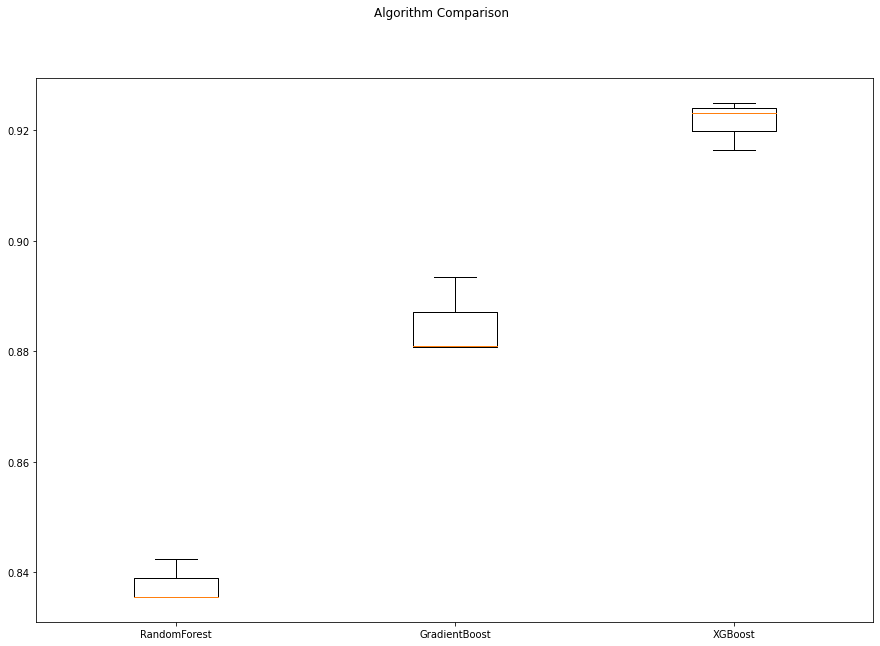

In [ ]:
fig = plt.figure(figsize=(15,10))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(names)
plt.show()

#XGBoost gives the best results with very less Variance. also the scoring USED WAS recall. so Rf=0.84. (Similarly Precision and f1 score checked)

In [ ]:
# SMOTETomek

In [ ]:
# A Tuned XGBOOST MODEL -- SMOTETomek Done and ALL FEATURES USED. ---- 100% SMOTETomek 

MEAN_df_final=pd.concat([newMEAN_df1,newMEAN_df2,newMEAN_df3,newMEAN_df4,newMEAN_df5])
MEAN_df_final.drop(['Unnamed: 0', 'id'],axis=1,inplace=True)
MEAN_df_final.shape
X = MEAN_df_final.drop('class',axis=1)
y = MEAN_df_final['class']

sm_xg = SMOTETomek()
X_sm, y_sm_xb = sm_xg.fit_resample(X,y)


X_sm_xb = pd.DataFrame(X_sm, columns=X.columns)


meanxtrain_sm_xg, meanxtest_sm_xg, meanytrain_sm_xg , meanytest_sm_xg = train_test_split(X_sm_xb, y_sm_xb, test_size=0.3)

xg_sm_best = XGBClassifier(n_estimators=150, eval_metric='error',eta=0.21000000000000002, max_depth=9)
xg_best_model = xg_sm_best.fit(meanxtrain_sm_xg, meanytrain_sm_xg)


ypredmean_train =xg_best_model.predict(meanxtrain_sm_xg)
ypredmean_test = xg_best_model.predict(meanxtest_sm_xg)
print("="*100)
#Train data
print(accuracy_score(meanytrain_sm_xg, ypredmean_train))
print(confusion_matrix(meanytrain_sm_xg, ypredmean_train))
print(classification_report(meanytrain_sm_xg, ypredmean_train))

print("="*100)

#Test data
print(accuracy_score(meanytest_sm_xg, ypredmean_test))
print(confusion_matrix(meanytest_sm_xg, ypredmean_test))
print(classification_report(meanytest_sm_xg, ypredmean_test))

print("="*100)


# A Tuned XGBOOST MODEL -- SMOTETomek Done and ALL FEATURES USED. ---- 100% SMOTETomek 

0.9999647744685348
[[28358     0]
 [    2 28417]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     28358
         1.0       1.00      1.00      1.00     28419

    accuracy                           1.00     56777
   macro avg       1.00      1.00      1.00     56777
weighted avg       1.00      1.00      1.00     56777

0.9919450951382895
[[12072   125]
 [   71 12065]]
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     12197
         1.0       0.99      0.99      0.99     12136

    accuracy                           0.99     24333
   macro avg       0.99      0.99      0.99     24333
weighted avg       0.99      0.99      0.99     24333



In [ ]:
# A Tuned XGBOOST MODEL -- SMOTETomek Done and ALL  FEATURES USED. ---- 33% SMOTETomek

MEAN_df_final=pd.concat([newMEAN_df1,newMEAN_df2,newMEAN_df3,newMEAN_df4,newMEAN_df5])
MEAN_df_final.drop(['Unnamed: 0', 'id'],axis=1,inplace=True)
MEAN_df_final.shape
X = MEAN_df_final.drop('class',axis=1)
y = MEAN_df_final['class']

sm_xg = SMOTETomek(sampling_strategy=0.33)
X_sm, y_sm_xb = sm_xg.fit_resample(X,y)


X_sm_xb = pd.DataFrame(X_sm, columns=X.columns)


meanxtrain_sm_xg, meanxtest_sm_xg, meanytrain_sm_xg , meanytest_sm_xg = train_test_split(X_sm_xb, y_sm_xb, test_size=0.3)

xg_sm_best = XGBClassifier(n_estimators=150, eval_metric='error',eta=0.21000000000000002, max_depth=9)
xg_best_model = xg_sm_best.fit(meanxtrain_sm_xg, meanytrain_sm_xg)


ypredmean_train =xg_best_model.predict(meanxtrain_sm_xg)
ypredmean_test = xg_best_model.predict(meanxtest_sm_xg)
print("="*100)
#Train data
print(accuracy_score(meanytrain_sm_xg, ypredmean_train))
print(confusion_matrix(meanytrain_sm_xg, ypredmean_train))
print(classification_report(meanytrain_sm_xg, ypredmean_train))

print("="*100)

#Test data
print(accuracy_score(meanytest_sm_xg, ypredmean_test))
print(confusion_matrix(meanytest_sm_xg, ypredmean_test))
print(classification_report(meanytest_sm_xg, ypredmean_test))

print("="*100)

# A Tuned XGBOOST MODEL -- SMOTETomek Done and ALL  FEATURES USED. ---- 33% SMOTETomek

0.9997857181121765
[[28305     0]
 [    8  9021]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     28305
         1.0       1.00      1.00      1.00      9029

    accuracy                           1.00     37334
   macro avg       1.00      1.00      1.00     37334
weighted avg       1.00      1.00      1.00     37334

0.9852509218173864
[[12162    41]
 [  195  3603]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     12203
         1.0       0.99      0.95      0.97      3798

    accuracy                           0.99     16001
   macro avg       0.99      0.97      0.98     16001
weighted avg       0.99      0.99      0.99     16001



In [ ]:
# A Tuned XGBOOST MODEL -- SMOTETomek Done and ALL  FEATURES USED. ---- 32% SMOTETomek

MEAN_df_final=pd.concat([newMEAN_df1,newMEAN_df2,newMEAN_df3,newMEAN_df4,newMEAN_df5])
MEAN_df_final.drop(['Unnamed: 0', 'id'],axis=1,inplace=True)
MEAN_df_final.shape
X = MEAN_df_final.drop('class',axis=1)
y = MEAN_df_final['class']

sm_xg = SMOTETomek(sampling_strategy=0.32)
X_sm, y_sm_xb = sm_xg.fit_resample(X,y)


X_sm_xb = pd.DataFrame(X_sm, columns=X.columns)


meanxtrain_sm_xg, meanxtest_sm_xg, meanytrain_sm_xg , meanytest_sm_xg = train_test_split(X_sm_xb, y_sm_xb, test_size=0.3,random_state=14)

xg_sm_best = XGBClassifier(n_estimators=150, eval_metric='error',eta=0.21000000000000002, max_depth=9)
xg_best_model = xg_sm_best.fit(meanxtrain_sm_xg, meanytrain_sm_xg)


ypredmean_train =xg_best_model.predict(meanxtrain_sm_xg)
ypredmean_test = xg_best_model.predict(meanxtest_sm_xg)
print("="*100)
#Train data
print(accuracy_score(meanytrain_sm_xg, ypredmean_train))
print(confusion_matrix(meanytrain_sm_xg, ypredmean_train))
print(classification_report(meanytrain_sm_xg, ypredmean_train))

print("="*100)

#Test data
print(accuracy_score(meanytest_sm_xg, ypredmean_test))
print(confusion_matrix(meanytest_sm_xg, ypredmean_test))
print(classification_report(meanytest_sm_xg, ypredmean_test))

print("="*100)



# A Tuned XGBOOST MODEL -- SMOTETomek Done and ALL  FEATURES USED. ---- 32% SMOTETomek

0.9998109130199891
[[28337     0]
 [    7  8676]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     28337
         1.0       1.00      1.00      1.00      8683

    accuracy                           1.00     37020
   macro avg       1.00      1.00      1.00     37020
weighted avg       1.00      1.00      1.00     37020

0.9858187318794908
[[12106    47]
 [  178  3535]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     12153
         1.0       0.99      0.95      0.97      3713

    accuracy                           0.99     15866
   macro avg       0.99      0.97      0.98     15866
weighted avg       0.99      0.99      0.99     15866



In [ ]:
# A Tuned XGBOOST MODEL -- SMOTETomek Done and All FEATURES USED. ---- 100% SMOTETomek

MEAN_df_final=pd.concat([newMEAN_df1,newMEAN_df2,newMEAN_df3,newMEAN_df4,newMEAN_df5])
MEAN_df_final.drop(['Unnamed: 0', 'id'],axis=1,inplace=True)
MEAN_df_final.shape
X = MEAN_df_final.drop('class',axis=1)
y = MEAN_df_final['class']

sm_xg = SMOTETomek()
X_sm, y_sm_xb = sm_xg.fit_resample(X,y)


X_sm_xb = pd.DataFrame(X_sm, columns=X.columns)


meanxtrain_sm_xg, meanxtest_sm_xg, meanytrain_sm_xg , meanytest_sm_xg = train_test_split(X_sm_xb, y_sm_xb, test_size=0.3,random_state=14)

xg_sm_best = XGBClassifier(n_estimators=150, eval_metric='error',eta=0.21000000000000002, max_depth=9)
xg_best_model = xg_sm_best.fit(meanxtrain_sm_xg, meanytrain_sm_xg)


ypredmean_train =xg_best_model.predict(meanxtrain_sm_xg)
ypredmean_test = xg_best_model.predict(meanxtest_sm_xg)
print("="*100)
#Train data
print(accuracy_score(meanytrain_sm_xg, ypredmean_train))
print(confusion_matrix(meanytrain_sm_xg, ypredmean_train))
print(classification_report(meanytrain_sm_xg, ypredmean_train))

print("="*100)

#Test data
print(accuracy_score(meanytest_sm_xg, ypredmean_test))
print(confusion_matrix(meanytest_sm_xg, ypredmean_test))
print(classification_report(meanytest_sm_xg, ypredmean_test))

print("="*100)


# A Tuned XGBOOST MODEL -- SMOTETomek Done and All FEATURES USED. ---- 100% SMOTETomek

0.9998415269756303
[[28448     2]
 [    7 28335]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     28450
         1.0       1.00      1.00      1.00     28342

    accuracy                           1.00     56792
   macro avg       1.00      1.00      1.00     56792
weighted avg       1.00      1.00      1.00     56792

0.9912078882497946
[[11991   125]
 [   89 12135]]
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     12116
         1.0       0.99      0.99      0.99     12224

    accuracy                           0.99     24340
   macro avg       0.99      0.99      0.99     24340
weighted avg       0.99      0.99      0.99     24340



In [ ]:
# A tuned Random Forest Model ---- SMOTETomek Done.All Features


MEAN_df_final=pd.concat([newMEAN_df1,newMEAN_df2,newMEAN_df3,newMEAN_df4,newMEAN_df5])
MEAN_df_final.drop(['Unnamed: 0', 'id'],axis=1,inplace=True)
MEAN_df_final.shape
X = MEAN_df_final.drop('class',axis=1)
y = MEAN_df_final['class']




sm = SMOTETomek()
X_sm, y_sm = sm.fit_resample(X,y)
meanxtrain_sm , meanxtest_sm, meanytrain_sm, meanytest_sm = train_test_split(X_sm,y_sm, test_size=0.3)

rf_sm_best = RandomForestClassifier(criterion='gini',n_estimators=61,bootstrap=True,max_features='auto')
rf_best_model = rf_sm_best.fit(meanxtrain_sm, meanytrain_sm)


ypredmean_train =rf_best_model.predict(meanxtrain_sm)
ypredmean_test = rf_best_model.predict(meanxtest_sm)
print("="*100)
#Train data
print(accuracy_score(meanytrain_sm, ypredmean_train))
print(confusion_matrix(meanytrain_sm, ypredmean_train))
print(classification_report(meanytrain_sm, ypredmean_train))

print("="*100)

#Test data
print(accuracy_score(meanytest_sm, ypredmean_test))
print(confusion_matrix(meanytest_sm, ypredmean_test))
print(classification_report(meanytest_sm, ypredmean_test))

print("="*100)


# A tuned Random Forest Model ---- SMOTETomek Done.All Features

1.0
[[28366     0]
 [    0 28432]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     28366
         1.0       1.00      1.00      1.00     28432

    accuracy                           1.00     56798
   macro avg       1.00      1.00      1.00     56798
weighted avg       1.00      1.00      1.00     56798

0.97880207049544
[[11850   354]
 [  162 11976]]
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     12204
         1.0       0.97      0.99      0.98     12138

    accuracy                           0.98     24342
   macro avg       0.98      0.98      0.98     24342
weighted avg       0.98      0.98      0.98     24342



In [ ]:
# A tuned Random Forest Model -- SMOTETomek DONE. and TOP 32 FEATURES from correlation method

top32 = ['Attr35', 'Attr40', 'Attr15', 'Attr39', 'Attr23', 'Attr17', 'Attr18',
       'Attr60', 'Attr6', 'Attr5', 'Attr55', 'Attr57', 'Attr32', 'Attr33',
       'Attr13', 'Attr27', 'Attr41', 'Attr54', 'Attr46', 'Attr42', 'Attr24',
       'Attr28', 'Attr30', 'Attr59', 'Attr1', 'Attr38', 'Attr29', 'Attr2',
       'Attr45', 'Attr61', 'Attr26']


MEAN_df_final=pd.concat([newMEAN_df1,newMEAN_df2,newMEAN_df3,newMEAN_df4,newMEAN_df5])
MEAN_df_final.drop(['Unnamed: 0', 'id'],axis=1,inplace=True)
MEAN_df_final.shape
X = MEAN_df_final.drop('class',axis=1)
y = MEAN_df_final['class']

X32 = X[top32]


sm = SMOTETomek()
X_sm, y_sm = sm.fit_resample(X32,y)
meanxtrain_sm , meanxtest_sm, meanytrain_sm, meanytest_sm = train_test_split(X_sm,y_sm, test_size=0.3)

rf_sm_best = RandomForestClassifier(criterion='gini',n_estimators=61,bootstrap=True,max_features='auto')
rf_best_model = rf_sm_best.fit(meanxtrain_sm, meanytrain_sm)


ypredmean_train =rf_best_model.predict(meanxtrain_sm)
ypredmean_test = rf_best_model.predict(meanxtest_sm)
print("="*100)
#Train data
print(accuracy_score(meanytrain_sm, ypredmean_train))
print(confusion_matrix(meanytrain_sm, ypredmean_train))
print(classification_report(meanytrain_sm, ypredmean_train))

print("="*100)

#Test data
print(accuracy_score(meanytest_sm, ypredmean_test))
print(confusion_matrix(meanytest_sm, ypredmean_test))
print(classification_report(meanytest_sm, ypredmean_test))

print("="*100)


#The model is slightly overfit -


# A tuned Random Forest Model -- SMOTETomek DONE. and TOP 32 FEATURES from correlation method

0.9999822870908318
[[28247     1]
 [    0 28208]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     28248
         1.0       1.00      1.00      1.00     28208

    accuracy                           1.00     56456
   macro avg       1.00      1.00      1.00     56456
weighted avg       1.00      1.00      1.00     56456

0.974582575632336
[[11633   445]
 [  170 11948]]
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97     12078
         1.0       0.96      0.99      0.97     12118

    accuracy                           0.97     24196
   macro avg       0.97      0.97      0.97     24196
weighted avg       0.97      0.97      0.97     24196



In [ ]:
# A Tuned XGBOOST MODEL -- 100% SMOTETomek Done and TOP 32 FEATURES from correlation method

MEAN_df_final=pd.concat([newMEAN_df1,newMEAN_df2,newMEAN_df3,newMEAN_df4,newMEAN_df5])
MEAN_df_final.drop(['Unnamed: 0', 'id'],axis=1,inplace=True)
MEAN_df_final.shape
X = MEAN_df_final.drop('class',axis=1)
y = MEAN_df_final['class']

top32 = ['Attr35', 'Attr40', 'Attr15', 'Attr39', 'Attr23', 'Attr17', 'Attr18',
       'Attr60', 'Attr6', 'Attr5', 'Attr55', 'Attr57', 'Attr32', 'Attr33',
       'Attr13', 'Attr27', 'Attr41', 'Attr54', 'Attr46', 'Attr42', 'Attr24',
       'Attr28', 'Attr30', 'Attr59', 'Attr1', 'Attr38', 'Attr29', 'Attr2',
       'Attr45', 'Attr61', 'Attr26']
X32 = X[top32]
sm_xg = SMOTETomek()
X_sm, y_sm_xb = sm_xg.fit_resample(X32,y)


X_sm_xb = pd.DataFrame(X_sm, columns=X32.columns)


meanxtrain_sm_xg, meanxtest_sm_xg, meanytrain_sm_xg , meanytest_sm_xg = train_test_split(X_sm_xb, y_sm_xb, test_size=0.3)

xg_sm_best = XGBClassifier(n_estimators=150, eval_metric='error',eta=0.21000000000000002, max_depth=9)
xg_best_model = xg_sm_best.fit(meanxtrain_sm_xg, meanytrain_sm_xg)


ypredmean_train =xg_best_model.predict(meanxtrain_sm_xg)
ypredmean_test = xg_best_model.predict(meanxtest_sm_xg)
print("="*100)
print(" Train data" )
print(accuracy_score(meanytrain_sm_xg, ypredmean_train))
print(confusion_matrix(meanytrain_sm_xg, ypredmean_train))
print(classification_report(meanytrain_sm_xg, ypredmean_train))

print("="*100)

print("Test data")
print(accuracy_score(meanytest_sm_xg, ypredmean_test))
print(confusion_matrix(meanytest_sm_xg, ypredmean_test))
print(classification_report(meanytest_sm_xg, ypredmean_test))

print("="*100)



# A Tuned XGBOOST MODEL -- 100% SMOTETomek Done and TOP 32 FEATURES from correlation method

 Train data
0.9997343534162151
[[28346     8]
 [    7 28105]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     28354
         1.0       1.00      1.00      1.00     28112

    accuracy                           1.00     56466
   macro avg       1.00      1.00      1.00     56466
weighted avg       1.00      1.00      1.00     56466

Test data
0.9871900826446282
[[11777   202]
 [  108 12113]]
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99     11979
         1.0       0.98      0.99      0.99     12221

    accuracy                           0.99     24200
   macro avg       0.99      0.99      0.99     24200
weighted avg       0.99      0.99      0.99     24200



In [ ]:
# A Tuned XGBOOST MODEL -- SMOTE Done . and TOP 32 FEATURES from correlation method

MEAN_df_final=pd.concat([newMEAN_df1,newMEAN_df2,newMEAN_df3,newMEAN_df4,newMEAN_df5])
MEAN_df_final.drop(['Unnamed: 0', 'id'],axis=1,inplace=True)
MEAN_df_final.shape
X = MEAN_df_final.drop('class',axis=1)
y = MEAN_df_final['class']

top32 = ['Attr35', 'Attr40', 'Attr15', 'Attr39', 'Attr23', 'Attr17', 'Attr18',
       'Attr60', 'Attr6', 'Attr5', 'Attr55', 'Attr57', 'Attr32', 'Attr33',
       'Attr13', 'Attr27', 'Attr41', 'Attr54', 'Attr46', 'Attr42', 'Attr24',
       'Attr28', 'Attr30', 'Attr59', 'Attr1', 'Attr38', 'Attr29', 'Attr2',
       'Attr45', 'Attr61', 'Attr26']
X32 = X[top32]
sm_xg = SMOTE()
X_sm, y_sm_xb = sm_xg.fit_resample(X32,y)


X_sm_xb = pd.DataFrame(X_sm, columns=X32.columns)


meanxtrain_sm_xg, meanxtest_sm_xg, meanytrain_sm_xg , meanytest_sm_xg = train_test_split(X_sm_xb, y_sm_xb, test_size=0.3,random_state=14)

xg_sm_best = XGBClassifier(n_estimators=150, eval_metric='error',eta=0.21000000000000002, max_depth=9)
xg_best_model = xg_sm_best.fit(meanxtrain_sm_xg, meanytrain_sm_xg)


ypredmean_train =xg_best_model.predict(meanxtrain_sm_xg)
ypredmean_test = xg_best_model.predict(meanxtest_sm_xg)
print("="*100)
#Train data
print(accuracy_score(meanytrain_sm_xg, ypredmean_train))
print(confusion_matrix(meanytrain_sm_xg, ypredmean_train))
print(classification_report(meanytrain_sm_xg, ypredmean_train))

print("="*100)

#Test data
print(accuracy_score(meanytest_sm_xg, ypredmean_test))
print(confusion_matrix(meanytest_sm_xg, ypredmean_test))
print(classification_report(meanytest_sm_xg, ypredmean_test))

print("="*100)

# A Tuned XGBOOST MODEL -- SMOTE Done . and TOP 32 FEATURES from correlation method

0.9995850550666505
[[28926    12]
 [   12 28889]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     28938
         1.0       1.00      1.00      1.00     28901

    accuracy                           1.00     57839
   macro avg       1.00      1.00      1.00     57839
weighted avg       1.00      1.00      1.00     57839

0.9843882367178991
[[12125   251]
 [  136 12277]]
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98     12376
         1.0       0.98      0.99      0.98     12413

    accuracy                           0.98     24789
   macro avg       0.98      0.98      0.98     24789
weighted avg       0.98      0.98      0.98     24789



# BEST MODELS

In [ ]:
# A Tuned XGBOOST MODEL -- SMOTETomek Done and ALL FEATURES USED. ---- 100% SMOTETomek 

MEAN_df_final=pd.concat([newMEAN_df1,newMEAN_df2,newMEAN_df3,newMEAN_df4,newMEAN_df5])
MEAN_df_final.drop(['Unnamed: 0', 'id'],axis=1,inplace=True)
MEAN_df_final.shape
X = MEAN_df_final.drop('class',axis=1)
y = MEAN_df_final['class']

sm_xg = SMOTETomek()
X_sm, y_sm_xb = sm_xg.fit_resample(X,y)


X_sm_xb = pd.DataFrame(X_sm, columns=X.columns)


meanxtrain_sm_xg, meanxtest_sm_xg, meanytrain_sm_xg , meanytest_sm_xg = train_test_split(X_sm_xb, y_sm_xb, test_size=0.3,random_state=5)

xg_sm_best = XGBClassifier(n_estimators=150, eval_metric='error',eta=0.21000000000000002, max_depth=9)
xg_best_model = xg_sm_best.fit(meanxtrain_sm_xg, meanytrain_sm_xg)


ypredmean_train =xg_best_model.predict(meanxtrain_sm_xg)
ypredmean_test = xg_best_model.predict(meanxtest_sm_xg)
print("="*100)
#Train data
print(accuracy_score(meanytrain_sm_xg, ypredmean_train))
print(confusion_matrix(meanytrain_sm_xg, ypredmean_train))
print(classification_report(meanytrain_sm_xg, ypredmean_train))

print("="*100)

#Test data
print(accuracy_score(meanytest_sm_xg, ypredmean_test))
print(confusion_matrix(meanytest_sm_xg, ypredmean_test))
print(classification_report(meanytest_sm_xg, ypredmean_test))

print("="*100)

#Entire DATA
ypred_xg = xg_best_model.predict(X)
print(accuracy_score(y, ypred_xg))
print(confusion_matrix(y, ypred_xg))
print(classification_report(y, ypred_xg))

# A Tuned XGBOOST MODEL -- SMOTETomek Done and ALL FEATURES USED. ---- 100% SMOTETomek 

0.9999647750889429
[[28315     0]
 [    2 28461]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     28315
         1.0       1.00      1.00      1.00     28463

    accuracy                           1.00     56778
   macro avg       1.00      1.00      1.00     56778
weighted avg       1.00      1.00      1.00     56778

0.9903016355716282
[[12103   138]
 [   98 11995]]
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     12241
         1.0       0.99      0.99      0.99     12093

    accuracy                           0.99     24334
   macro avg       0.99      0.99      0.99     24334
weighted avg       0.99      0.99      0.99     24334

0.9938486349498906
[[41120   194]
 [   73  2018]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     41314
         1.0       0.91      0.97      0.94      2091

    accuracy                    

In [ ]:
# A Tuned XGBOOST MODEL -- 100% SMOTETomek Done and TOP 32 FEATURES from correlation method

MEAN_df_final=pd.concat([newMEAN_df1,newMEAN_df2,newMEAN_df3,newMEAN_df4,newMEAN_df5])
MEAN_df_final.drop(['Unnamed: 0', 'id'],axis=1,inplace=True)
MEAN_df_final.shape
X = MEAN_df_final.drop('class',axis=1)
y = MEAN_df_final['class']

top32 = ['Attr35', 'Attr40', 'Attr15', 'Attr39', 'Attr23', 'Attr17', 'Attr18',
       'Attr60', 'Attr6', 'Attr5', 'Attr55', 'Attr57', 'Attr32', 'Attr33',
       'Attr13', 'Attr27', 'Attr41', 'Attr54', 'Attr46', 'Attr42', 'Attr24',
       'Attr28', 'Attr30', 'Attr59', 'Attr1', 'Attr38', 'Attr29', 'Attr2',
       'Attr45', 'Attr61', 'Attr26']
X32 = X[top32]
sm_xg = SMOTETomek()
X_sm, y_sm_xb = sm_xg.fit_resample(X32,y)


X_sm_xb = pd.DataFrame(X_sm, columns=X32.columns)


meanxtrain_sm_xg, meanxtest_sm_xg, meanytrain_sm_xg , meanytest_sm_xg = train_test_split(X_sm_xb, y_sm_xb, test_size=0.3,random_state=5)

xg_sm_best_32 = XGBClassifier(n_estimators=150, eval_metric='error',eta=0.21000000000000002, max_depth=9)
xg_best_model_32 = xg_sm_best_32.fit(meanxtrain_sm_xg, meanytrain_sm_xg)


ypredmean_train =xg_best_model_32.predict(meanxtrain_sm_xg)
ypredmean_test = xg_best_model_32.predict(meanxtest_sm_xg)
print("="*100)
print(" Train data" )
print(accuracy_score(meanytrain_sm_xg, ypredmean_train))
print(confusion_matrix(meanytrain_sm_xg, ypredmean_train))
print(classification_report(meanytrain_sm_xg, ypredmean_train))

print("="*100)

print("Test data")
print(accuracy_score(meanytest_sm_xg, ypredmean_test))
print(confusion_matrix(meanytest_sm_xg, ypredmean_test))
print(classification_report(meanytest_sm_xg, ypredmean_test))

print("="*100)
#Entire DATA
ypred_xg = xg_best_model_32.predict(X32)
print(accuracy_score(y, ypred_xg))
print(confusion_matrix(y, ypred_xg))
print(classification_report(y, ypred_xg))


# A Tuned XGBOOST MODEL -- 100% SMOTETomek Done and TOP 32 FEATURES from correlation method

 Train data
0.9998052925037614
[[28168     5]
 [    6 28316]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     28173
         1.0       1.00      1.00      1.00     28322

    accuracy                           1.00     56495
   macro avg       1.00      1.00      1.00     56495
weighted avg       1.00      1.00      1.00     56495

Test data
0.9871969603105769
[[11952   229]
 [   81 11951]]
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99     12181
         1.0       0.98      0.99      0.99     12032

    accuracy                           0.99     24213
   macro avg       0.99      0.99      0.99     24213
weighted avg       0.99      0.99      0.99     24213

0.9908535882962792
[[40991   323]
 [   74  2017]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     41314
         1.0       0.86      0.96      0.91      2091

    accura

## key risks

In [ ]:
#clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
X = full_newMEAN_df.drop(['id','class'],axis=1)
y = full_newMEAN_df['class']
meanxtrain, meanxtest, meanytrain, meanytest = train_test_split(X,y ,test_size=0.2, random_state=10)
print(meanxtrain.shape, meanytrain.shape, meanxtest.shape, meanytest.shape)

(34724, 61) (34724,) (8681, 61) (8681,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
X_sc=pd.DataFrame(sc.fit_transform(X),columns=X.columns)

In [ ]:
num=range(1,15)
cluster_inertia=[]

for i in num:
    cluster=KMeans(n_clusters=i,n_init=10,random_state=10)
    cluster.fit(df_scaled)
    labels=cluster.labels_
    centroids=cluster.cluster_centers_
    cluster_inertia.append(cluster.inertia_)
    
cluster_info=pd.DataFrame({'no of clusters':num,'cluster_inertia':cluster_inertia})

In [ ]:
c=[2,3,4,5,6,7,8]
for i in c:
    cluster = KMeans(n_clusters=i)

    # Fitting the input data
    # Getting the cluster labels

    l = cluster.fit_predict(X_sc)

    score=silhouette_score(X_sc,l,random_state=10)
    print('the silhouette score for ',i,'is:',score)

the silhouette score for  2 is: 0.9965098934479747
the silhouette score for  3 is: 0.9958760110056343
the silhouette score for  4 is: 0.9880211393905831
the silhouette score for  5 is: 0.9877708340035457
the silhouette score for  6 is: 0.9878878944836631
the silhouette score for  7 is: 0.9879668364745929
the silhouette score for  8 is: 0.9841864345912715


In [ ]:
num=range(1,8)
cluster_inertia=[]

for i in num:
    cluster=KMeans(n_clusters=i,n_init=10,random_state=10)
    cluster.fit(X_sc)
    labels=cluster.labels_
    centroids=cluster.cluster_centers_
    cluster_inertia.append(cluster.inertia_)
    
cluster_info=pd.DataFrame({'no of clusters':num,'cluster_inertia':cluster_inertia})

In [ ]:
cluster_info

,no of clusters,cluster_inertia
0,1,2.647705e+06
1,2,2.274428e+06
2,3,2.009255e+06
3,4,1.858649e+06
4,5,1.682592e+06
5,6,1.552172e+06
6,7,1.456309e+06


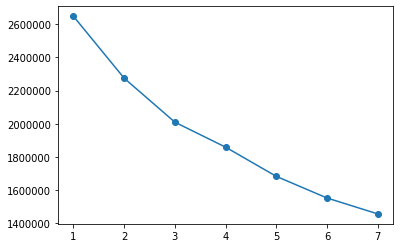

In [ ]:
plt.plot(cluster_info['no of clusters'],cluster_info.cluster_inertia,marker='o')

From the clustering using KMeans we find that without scaled data we get a logarithmic elbow plot. Thus, signifying that these corporate entities come from a very different background. These may be small entities, medium entities or large entities. Even the area of operation may be different.

Also, we came across many outliers and according to domain these outliers are bound to be there because some companies are comparatively very large while some are very small. And existence of both these entities is must for a proper model building. We see that without Outlier handling we are getting good accuracy scores.